In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # FOR REGEX
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack                                                       # FOR HORIZONTALY STACKING THE MATRIX 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
import string
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pkg_resources                                                                  # FOR READING THE DICTIONARY OF WORDS
from symspellpy import SymSpell                                                       # FOR SPELLING CORRECTION

In [144]:
lemmatizer = WordNetLemmatizer() 
list_of_stopwords = list(stopwords.words('english')) + list(string.punctuation)

In [145]:
stopWords = set(stopwords.words('english') + list(string.punctuation) + list("__"))
# stopWords.add('__')
# stopWords.add('0084b4')
# stopWords.add('c0deed')
# stopWords.add('ffffff')
# stopWords.add('xxx')
stopWords.add('love')
stopWords.add('like')
# stopWords.add('one')
# stopWords.add('get')
stopWords.add('life')
# stopWords.add('day')
# stopWords.add('people')
# stopWords.add('go')
# stopWords.add('time')
# stopWords.add('know')
# stopWords.add('new')
# stopWords.add('im')
# stopWords.add('want')
# stopWords.add('good')
# stopWords.add('make')
# stopWords.add('eeeeee')
# stopWords.add('got')
# stopWords.add('amp')
# stopWords.add('need')
# stopWords.add('best')
# stopWords.add('fan')  
# stopWords.add('music')
# stopWords.add('sport')
# stopWords.add('writer')
# stopWords.add('tweet')
# stopWords.add('com')
# stopWords.add('man')
# stopWords.add('ig')
# stopWords.add('business')
# stopWords.add('god')
# stopWords.add('back')
# stopWords.add('see')
# stopWords.add('still')
# stopWords.add('thing')
# stopWords.add('think')
# stopWords.add('year')
# stopWords.add('na')
# stopWords.add('say')
# stopWords.add('look')

In [146]:
# list_of_stopwords = stopWords

In [147]:
# RAEDING THE DICTIONARY OF WORDS WHICH COMES WITH SYMSPELLPY.
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)


True

In [148]:
df = pd.read_csv("Dataset.csv",encoding='latin-1') # READING CSV FILE, ENCODING IS LATIN-1 

In [149]:
# DEPENDENT VARIABLE IS GENDER AND INDEPENDENT VARIABLES ARE DESCRIPTION,TEXT,NAME.

In [150]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


DATA PREPROCESSING

In [151]:
# FEATURE SELECTION

In [152]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [153]:
# SELECTING IMPORTANT FEATURES 
# INDEPENDENT: GENDER CONFIDENCE,DESCRIPTION,NAME,TEXT DEPENDENT:GENDER  

In [154]:
important_features = ["gender","gender:confidence","description","name","text"] # GETTING ONLY IMPORTANT FEATURE

In [155]:
df2 = df[important_features]

In [156]:
# REMOVING NULL VALUES

In [157]:
df2 = df2.dropna(how ='any',axis = 0) # DROPING NULL VALUES

In [158]:
# NOW WE HAVE ZERO NULL VALUES.
df2.isnull().sum()

gender               0
gender:confidence    0
description          0
name                 0
text                 0
dtype: int64

In [159]:
# AS THE GENDER "UNKNOWN" IS NOT USEFULL WE WILL REMOVE IT 
# AND ALSO KEEPING OLY THOSE ROWS WHICH HAVE GENDER CONFIDENCE AS 1 FOR BETTER ACCURACY.

In [160]:
df2 = df2[df2['gender:confidence'] == 1]
df2 = df2[df2['gender'] != 'unknown']
df2 = df2[df2['gender'] != 'brand']

In [161]:
df2.gender.value_counts() # COUNT OF DIFFERENT CLASSES IN GENDER COLUMN

female    4616
male      4150
Name: gender, dtype: int64

In [162]:
df2.head()

,gender,gender:confidence,description,name,text
0,male,1.0,i sing my own rhythm.,sheezy0,Robbie E Responds To Critics After Win Against...
1,male,1.0,I'm the author of novels filled with family dr...,DavdBurnett,ÛÏIt felt like they were my friends and I was...
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",douggarland,Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,WilfordGemma,Watching Neighbours on Sky+ catching up with t...
5,female,1.0,you don't know me.,monroevicious,"Ive seen people on the train with lamps, chair..."


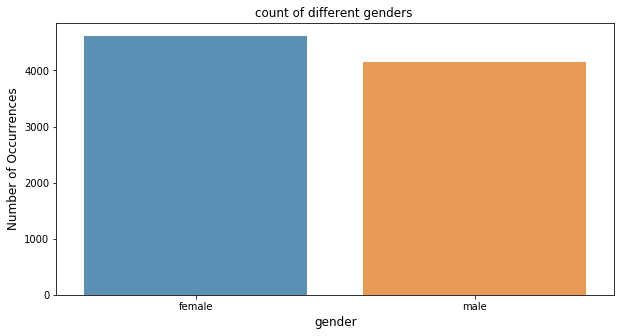

In [163]:
# PLOTING THE GRAPH OF GENDER COLUMN
gender_count  = df2['gender'].value_counts() 
gender_count = gender_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(gender_count.index, gender_count.values, alpha=0.8)
plt.title('count of different genders ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender', fontsize=12)
plt.show()
# DATA IS BALANCED

In [164]:
# CLEANING USER-NAMES TO GET THE NAME AS NAMES PLAYS IMPORTANT ROLE IN PREDICTING GENDER
# TO GET USEFULL INFORMATION FROM USER NAME I AM REMOVING NUMBERS AND SPECIAL CHARACTERS FROM THE USER-NAME AND 
# SPLITING IT INTO NAME AND SURNAME 

In [165]:
# MUST BE CONVERTED TO UTF-8 AS IT WAS IN LATIN-1 TO GET MORE CLARITY OF LETTERS AND WORDS

In [166]:
df2['name'] = df2['name'].str.encode("ascii","ignore")#ENCODING TO ASCII
df2['name']  = df2['name'].apply(lambda x: x.decode("utf-8"))#DECODING TO UTF-8

In [167]:
#STORING NAME AS STRING IN LIST

In [168]:
# GETTING USEFULL WORDS FROM THE NAME COLUMN
# REMOVING SPECIAL CHARACTERS
ans = []
def camelCases(string):
    splitted = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', string)).split()
    print(splitted)
    string = ' '.join([str(elem) for elem in splitted])
    listToStr = string.translate ({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+0123456789"})
    ans.append(str(listToStr).lower())

In [169]:
#ITERATING IN NAMES COLUMNS AND PROCESSING
for i in range(df2.shape[0]):
    camelCases(df2['name'].iloc[i])

['sheezy0']
['Davd', 'Burnett']
['douggarland']
['Wilford', 'Gemma']
['monroevicious']
['Robin', 'Meske']
['pigzilla_']
['Gabriele', 'Neher']
['Toucaan_', 'Samm']
['S', 'Smyth2010']
['jlpeter37']
['Sarah', 'Maddry']
['bethleia']
['Strictly', 'Ari']
['J', 'Hurkett']
['karenhbullard']
['Dear', 'Moonshine__']
['Hal', 'Rappaport']
['sarahamiels']
['TB12', 'For', 'Prez']
['300', 'Stain']
['__amira_']
['brandonpattrson']
['danydifazio']
['KABULALA']
['DJKRO']
['alexandraalice']
['Ollie', 'C9897']
['ll', 'IUMINA', 'Tl', 'RES', 'Ml']
['sh6ne']
['Scott_', 'Ryan_']
['manikarthik']
['cheer_diva97']
['BURN', 'Sl', 'VAN']
['Mr', 'AB', 'Photog']
['Moonfell44']
['alanhudson1']
['Miss_', 'Masaya']
['RAEHEREEEE']
['butkick2000']
['Angie', 'Mozart']
['Buzzell', 'Natalie']
['cyrusodessa']
['Wiseman', 'Kayo']
['Yemi', 'Sure', 'Girl']
['angie48534918']
['Jake', 'Elman']
['Madelineh28']
['Adrien_', 'RG']
['Shady1277']
['ilovegiraffes_']
['oddbennett']
['Lmarie', 'Asad']
['Alicia', 'V', 'Ruiz']
['King', 'Cla

['robertrotifer']
['SIX1', 'DS']
['FVLLWEATHER']
['dens1984']
['madisoncallas']
['Karchswag']
['Rachelinezlane']
['mozak74']
['Not', 'Just', 'A', 'Thief']
['purrposex']
['Dump', 'Street_', 'Juju']
['dudenamedharry']
['haliehewitt']
['Gary_', 'R_', 'Walker']
['alana_rose1226']
['Mark', 'AH', 'Fearnall']
['_zammyy']
['cloudniah']
['n_c_kan']
['ISOTONIX187']
['Adam', 'Dechanel']
['Phillip_', 'D_', 'Jones']
['ricecracker']
['twin_ec_']
['aarojames']
['hyukr']
['Her_', 'Diamond']
['Chelsea8', 'Riley']
['rickeybot']
['chloedonald_']
['sisa_coach']
['Alexandra', 'Teenx']
['Is', 'That', 'Number5_']
['carlyy_taylorr']
['Maria', 'Garavuso']
['trillllnye']
['mrchristr']
['Hunter', 'Might', 'Fly']
['Ahoy', 'Im', 'Harker']
['jaygetsweird']
['Annnanielsen']
['White23', 'Mike']
['rubakaay']
['Kayak', 'Kenneth']
['1anndonnly', 'Cp']
['atmosudirdjo']
['Deborah', 'Alsina']
['brittybap']
['c1a3m1']
['Frank', 'Dio']
['johnmknox']
['Jonathan', 'Cohn']
['_jesssirwin']
['_', 'David', 'Joel']
['Southern', 'Ma

['Doper', 'By', 'Design']
['rhea__george']
['Mike', 'Riggs']
['evankirstel']
['Audrey', 'S23511436']
['flozimoet']
['xvbrenda']
['Fanta4', 'Banta']
['Tness', 'Prince']
['iam_almiskin']
['Andrea_', 'Michele']
['mz_', 'ASB']
['_iamextra']
['Ms_', 'Hilz']
['Elmer', 'Raymnchamp']
['Lyrical', 'Poet87']
['Google_', 'My_', 'Boobx']
['BEROKKOXXX']
['King_', 'The_', 'Ruler']
['Erin_', 'Taylor98']
['queenkara3']
['israxm']
['Rejects', 'Daughter']
['Mr', 'Menzi', 'N']
['Jessica', 'Davis136']
['hartsyouu']
['A', 'Boyce_02']
['kaaliajay']
['Finished', 'Zine']
['josewhales']
['happilygemgem']
['Woundylan']
['Dr', 'Jimbo', 'NHS']
['Jake', 'Too', 'FADED']
['guesswhomatthew']
['gailyn_enos']
['sashaapieterse', 'P']
['The_', 'Big_', 'Fella']
['Callum', 'Heinrich']
['cyndihardyphoto']
['giuseppeazzaro']
['notcunterino']
['Tara', 'Becker_', 'QCT']
['danielbfreed']
['Tallguyalec']
['BLACK_', 'HAYCE']
['youngsinick']
['melodisthes']
['wallybock']
['patrick_kidd']
['Richard', 'Bynoe_']
['Mary', 'Arredia']
['

['Keaton', 'Patti']
['hessmirk']
['nicdonoghue15']
['iitsdbook']
['mimc03']
['Pat_vann']
['Flatbush', 'AVE']
['Fox', 'Hound', 'Knight']
['gchild8701']
['nadiaabdvl']
['Bryan', 'Reid', 'Sr']
['heidifnt']
['faaaaaith']
['Kristofer', 'M', 'Jones']
['jennpavek']
['sumanthaaax']
['The_', 'Sunset_', 'Kid']
['Gab_santoriello']
['yadigak47']
['jakebrown_1994']
['maxxkrakoa']
['Lozzv']
['sweet_liciaaj']
['m2012nol']
['aimhbread']
['Amira5', 'SOS_']
['Andreaaa1_81']
['_nkemelo_23']
['goodsides']
['Pablo', 'THE', 'Gawd']
['Lil', 'Record', 'Girl']
['lilliandarchie']
['lagunababie']
['Itz_', 'Megelyn', 'Barb']
['Taliee__']
['Yung_', 'Poncho']
['Greg', 'Camp', 'NC']
['Merrick', 'George']
['Feelja', 'Breeze21']
['chellydonuts']
['Jhaz', 'Valderrama']
['Princesa_', 'Ana', 'Xo']
['Perversi', 'Serena']
['abbigayllrosie']
['Good', 'Mornin', 'Captn']
['Karceno']
['david_segars']
['Kc', 'Greuter']
['vossbrink']
['Trav', 'Haney', 'ESPN']
['Game', 'Squire']
['lmoagaa']
['MISTERPDW']
['itbejessalyn']
['Just_'

['DBREEZY38']
['Hi', 'There', 'Smiley']
['thebigzookeeper']
['joannethomsen']
['AP', 'Tminer']
['dewesh_tiwary']
['Wad', 'The', 'Gawd']
['Matty', 'Krop17']
['haleyjamesx']
['joepanettieri']
['_demigomezzz_']
['_', 'Mary', 'Spencer_']
['Rev97', 'Bronnie']
['tony_drunk']
['Monica_', 'Story18']
['jrycraft01']
['trevormccabe17']
['andyreiff']
['jaylennn_3']
['kaybruegs']
['bubblegumdesign']
['Mike', 'Enders3']
['Merna', 'Medhat1']
['Brady', 'Mclean1313']
['lolacuppy']
['Rachel_g18']
['lyricmorales_']
['lordeszarry']
['Adevarias']
['emma_lr17']
['F', 'Fer_becerra']
['emmywilde2']
['drmartinwrites']
['Ewendt', 'K']
['Bob', 'Rblock84']
['sailings0uls__']
['Fat', 'Body', 'Politics']
['ewertoncolombo']
['Conor', 'Darren', 'D']
['trajcevskid7']
['Cahair', 'O', 'Kane1']
['sandrabeckfit']
['aidyduffresne']
['Andrea', 'Murphy82']
['naaaaat25']
['LF', 'Cibe']
['azzafed']
['uncletypewriter']
['crzluna']
['georgesonalfred']
['teekaydabae']
['caitlyn_martin']
['paul_s_kemp']
['nickimjfam']
['Kitty_', '

['Jasmina_', 'Adriana']
['baileyhdoe']
['Millie_', 'Doyle']
['taylorkaps']
['Bonniejean401']
['lukebinnington']
['thom_walters']
['yamumsfav']
['doseofcyrus']
['The', 'Big', 'Dog', 'Reigns']
['My', 'Nameis', 'Razzle2']
['kaili_aloha']
['Raizzahoney']
['coolpotatoes90']
['Trafford', 'Anthony']
['Vonster']
['imbassick']
['sinead_megan']
['trulybreanna']
['Irene', 'Mosby']
['Darkhemmingsx']
['history_boner']
['ladmigvaere']
['volcvnic']
['esegueyjaime']
['owentreble7']
['fucklilyrae']
['Words_', 'PR']
['whaleloverrrrr']
['Lady', 'Lydia', 'D']
['Itts', 'Nava_11']
['I', 'Am', 'Brunhofer']
['imc00lest']
['arianalocks_xox']
['Flyestoncampus']
['Jen', 'Humphreys182']
['bake_down']
['Schae', 'Avery']
['kevinansbro']
['Mella', 'Dee_']
['Laura', 'Cortez_', 'RP']
['_', 'Dope', 'MF']
['_louharrington']
['bobfuncan']
['rayleneolivares']
['Mallory', 'A', 'Hayes']
['trulykatieex']
['Astons', 'Princessx']
['moonshinepione1']
['emmyhibb_']
['chiddy', 'E']
['A', 'Tfiles']
['durbannawtyboy']
['Ranak', 'Ch

['lordeszarry']
['Dr', 'Shamie', 'Das']
['___', 'LYLA1825']
['dreamingdeyess']
['bigronni3']
['bookmarklit']
['helenarochex']
['_izabela__']
['The', 'Real', 'Twanno']
['Raniolo4', 'Justice']
['tobylindsay']
['petefrasermusic']
['Grape', 'Ice', 'Creame']
['lxurenydg']
['benscaife']
['Tenth', 'DR', 'Who']
['Bandsalone98']
['Neck', 'Lauren']
['pnutbutterjones']
['Deanna', 'Purcell']
['HNN', 'Africa']
['George', 'Stav']
['mpoo5oomy']
['igieweosazee']
['crazyindapeg']
['Sfdi1947']
['valida_bea25']
['princenamgi']
['emmzzznicole']
['Bethanine28']
['zerowalls']
['Chris', 'Taylor8859']
['Natural_', 'One', 'Durr']
['Lebreton', 'Abby']
['2', 'Saintsss']
['newspaperx3taxi']
['joslynmariyah']
['koyaanisqathopi']
['michucupcake']
['corinne', 'Emurray']
['Crnbry', 'PIN', 'Kvodka']
['Wheres', 'Roch']
['RIDINGSOLO_']
['The2', 'Sixteen']
['ellalouisexo_']
['_', 'Pretty', 'Much', 'Me']
['Jasmin', 'Bailey24']
['sorayasaikal']
['fernando28149']
['OMISOREKOLAJO']
['Ottawa', 'Condo', 'Law']
['literallybm']


['shake40ave']
['Cuteguy_930']
['westondem']
['Gail', 'Quiros']
['Amit', 'Relester']
['morganlbbh']
['5', 'Seconds', 'Of', 'Suggx']
['_', 'Brittany', 'Moniqe']
['Herbert', 'Patti']
['dreinoceros']
['Joannavander', 'H']
['Miss_', 'Asabe']
['Mr', 'Law3131']
['steentrain']
['lizzmccann']
['_gummsz']
['lizasobera', 'WOW']
['norbert_m']
['chelesalva']
['Dub', 'The', 'Producer']
['paidamoyogt']
['angieb_88']
['allisonlanza']
['pancakejolly']
['shaunamckenna_']
['Aurora2573']
['bobdestefano']
['GK', 'Todd', 'Henny']
['skimartinbell']
['_danjaaaa']
['lindseydodd2']
['cuppy']
['jassyj__']
['Chris', 'A', 'Biersack']
['natnedelkovska']
['Hypno_', 'Marc']
['Erlene383']
['ebest45']
['themarkcarroll']
['taterrose']
['Real', 'Talk_365_']
['ednamohamed_']
['Jessica', 'Harborne']
['hey_gordis']
['Gabe', 'Fontaine']
['sarcasticregina']
['Mikeof', 'New', 'YORK']
['carlitosdgaf_']
['J_0ney']
['Ash_', 'Kaye0']
['p_', 'SCN']
['namastelyss']
['Kayleigh', 'Queue']
['theresaa426']
['nichix3']
['Princess', 'Ash

In [170]:
# CREATING NEW COLUMN WITH PROCESSED USERNAME 
df2['names'] = ans 

In [171]:
# DROPING THE NAME COLUMN
df2 = df2.drop('name' , axis = 1)

In [172]:
# TOKENZING NAMES 
#REMOVING SINGLE LETTER WORDS AND STOP WORDS PRESNT AFTER SPLITTING
clean_names = []
for i in range(df2.shape[0]):
    text_message = df2['names'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word)>1:
            print(word)
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_names.append(clean_text)
    
len(clean_names)

sheezy
davd
burnett
douggarland
wilford
gemma
monroevicious
robin
meske
pigzilla
gabriele
neher
toucaan
samm
smyth
jlpeter
sarah
maddry
bethleia
strictly
ari
hurkett
karenhbullard
dear
moonshine
hal
rappaport
sarahamiels
tb
prez
stain
amira
brandonpattrson
danydifazio
kabulala
djkro
alexandraalice
ollie
iumina
tl
res
ml
sh
ne
scott
ryan
manikarthik
cheer
diva
burn
sl
van
mr
ab
photog
moonfell
alanhudson
miss
masaya
raehereeee
butkick
angie
mozart
buzzell
natalie
cyrusodessa
wiseman
kayo
yemi
sure
girl
angie
jake
elman
madelineh
adrien
rg
shady
ilovegiraffes
oddbennett
lmarie
asad
alicia
ruiz
king
clay
thepanda
karina
sh
nnonmiller
dr
rockt
pus
buomar
mill
isit
mydickboyyy
ardith
bordonaro
fuckgivenchy
mickbk
diana
tsang
speak
ja
downeysmile
kilpatrickeolue
powerpuffbrooke
kayadfi
lesatorr
south
african
eq
aethylred
constanshow
coloredcharms
ponder
msrainerain
louanne
gaffe
jenkoons
colltreese
tom
orr
thatkid
zach
retired
teacher
kingabdul
dam
un
beso
jlj
ellpennerz
brxwnlouise
tmt
fren

gamertag
afarran
trentoncole
abimwachi
darren
langley
berryliciousguy
slabber
cart
mccxck
vandeir
gontijo
adam
mar
carlyboy
lukepickard
heatherxwatson
gabriel
ram
jaydotlias
bearlampp
hiphip
hara
chris
adam
tweets
prentonia
psv
brookesberrys
ayushkigf
owen
whu
heatherxwatson
fernandlopez
catawba
worm
discoveringme
faria
krsafc
lilyyyyyc
katie
loscher
sabrinaporter
meowl
johnmcilvanney
sasha
leahy
kp
india
zazzi
jarianadeluxed
tiink
billinghurt
jonaskills
ryanrod
djkatunez
omega
zay
chitoo
jennamedinaxo
themikkimystic
nanda
austenisabelle
tristanbaileyyy
zappa
juanita
sheonmy
johnson
saracuevas
crystal
hilton
lsoffer
martghogan
tayayayaylor
claudiataggart
mr
lethario
someone
good
fav
flower
la
petit
hayley
kayyfiree
nicole
jessie
heyimnayah
kassie
garwood
supreme
cae
totalfinchelfan
sabrinaporter
tristanbaileyyy
helloiammarine
chanyeorrr
siempre
amor
awilson
jennie
cruz
nishaisfake
mean
dadx
doufous
emmaprew
sam
lilywhite
redneck
hq
bbyadult
whip
hand
blow
cash
daily
kevin
quinn
jstoner

engeljen
one
directiona
receex
frank
horowitz
kamens
brenda
brooke
supr
lord
count
vacula
coral
reef
fish
ohhhdats
zutta
mj
iannelli
cheeeeeks
ms
nae
cate
adair
ellwood
ukulelerapgirl
henwinters
alharstone
manufacturing
od
kachi
gele
extatic
emily
martyn
designs
ms
gamer
se
justonetae
chrgra
ryan
padgham
nancy
martira
amarrateuponei
gdotlee
volkamar
youngtre
ygk
hot
tusker
lyndsey
lou
br
karlita
megan
sheeran
mikewilsonia
afrikas
poet
jag
rjay
henrietta
xprettyy
bri
nicole
placedenergy
mohalemamarara
hannah
divine
chadfishburne
swords
cpfc
butter
real
ross
bailey
padmore
alliemelissinos
louthdog
banwell
peugeot
incdraw
hard
ro
clife
jon
stegall
caz
lawrence
pinkandtweed
hmwills
afremov
artist
piercedmgcx
isimplytessa
naijama
naijama
naijama
naijama
lainey
gillon
naijama
naijama
naijama
naijama
naijama
naijama
devon
mc
quillan
naijama
naijama
naijama
lisamoser
dhealthstore
rooneygyamfi
naijama
naijama
rajahn
itsgood
beking
naijama
naijama
naijama
melikeu
musk
knox
sports
guy
wocmelanie


nellydrakesmith
fai
rx
forbes
entrepre
jade
jameela
sergey
irl
taeyeonso
io
saudalhussaini
steven
univers
mopmoppy
bronia
richards
aerosmith
genius
forte
lauro
erica
bilby
baggins
yad
hamawe
layla
natalie
mariamdena
dorkyshane
diddley
squat
stoney
ata
jim
nm
sina
vost
rl
kov
gog
na
chrxs
yungpayne
elysialauraa
dominic
oliver
zoralys
montes
andrew
clemens
mr
brightside
hwe
amanda
prizmaticglass
hawkfeather
geena
init
vajingles
mlmnewsusa
icewrist
maddiethomas
carrie
jae
baeee
dhaase
grace
ana
taehgyo
thato
twigglez
mikemadura
tim
msocial
erlking
preston
ehrler
raymond
alexis
toler
jac
naylor
eeericca
millerita
briaan
annadavey
adablinkz
austin
cyr
dana
unleashed
oida
protested
jeannine
stylescareful
fpresources
lindabelgrove
gracieopulanza
andy
cejarvis
dnttouch
hat
stuspanks
cocogawdess
bunny
cat
lady
davyc
emsuckle
essencialll
nyasiamarie
laurrennn
xo
clarissa
clemens
calebthompson
yeaitstitus
masta
bruce
yazbeck
maria
spareshirt
kd
thee
virgo
vibe
hi
benjhunt
pyrex
chank
meldouglass


side
nigga
leek
darkskn
struggle
melodisthes
thetk
one
banx
gaz
boyle
schneid
bastard
tomduff
rachella
lb
creative
inc
ceiona
taetsunami
havivrettiggur
simmz
dr
liam
fishysandtittys
marythecancer
indo
pilot
burns
sarahisabel
annamana
yowan
kateevasell
lil
flower
kitten
wayneprice
manish
shukla
roky
king
ahdrese
ali
vdcruz
shadowcadettt
jensendgaf
louminiall
itsbrennaemily
alyssadonato
lady
melanin
beauty
benjinho
hd
matt
hawkins
feline
moon
iightania
john
jwso
killakestrel
sssparling
survivorshipuk
mileski
kfan
adelzify
beau
tif
fulcurls
kynton
nutcrackerpeyet
drizzyjay
moneymanjones
kg
maj
rip
kendre
nautica
iarrie
areebavevo
breezy
tha
balla
connor
brennan
official
crosby
johannaaaa
becca
muge
dessstoni
kimchapman
princesskenzzzz
londonishstyle
corbit
thfc
mehrab
walid
jonajon
rod
rooner
kaaits
xo
kaelynf
makayla
culp
sneaker
pimp
david
bibiloni
edward
buckbee
helontak
kkine
aanir
rep
bill
foster
grafosecondo
ryan
ekko
sykes
alexalltiemlow
charles
jackson
bec
brewin
shariah
isabella


nogoodmariana
logan
boyce
grvcyn
juliaaeb
huber
aglicksman
lfdnano
jimster
san
kennedy
thetatuist
jmrenero
estereee
williams
latifkhan
agasheaka
comradejotaro
lucyalex
emil
jung
tantalaliscious
prestonsimm
ctsotsoros
cyber
manin
kenideeee
jeffreality
kennarainey
behin
dpleasure
arthur
affect
ncouzz
david
smith
bilalipaup
hoodslayberry
juiced
rell
mr
parking
paul
icmyas
stephentyrone
kurt
kjellstrom
james
avis
biebusxchrist
aliarvay
kr
bwrites
carllyy
hurricane
chrxs
lolo
fox
geek
info
radio
kayla
imnotyou
cynical
huntress
sac
yia
mr
mercuryy
chrisy
bethanyangel
chey
nichole
patt
nazrul
fented
njd
taylorchilds
jack
clifton
katemuker
ospreys
emak
navy
talk
radio
dbreezy
hi
smiley
thebigzookeeper
joannethomsen
ap
tminer
dewesh
tiwary
wad
gawd
matty
krop
haleyjamesx
joepanettieri
demigomezzz
mary
spencer
rev
bronnie
tony
drunk
monica
story
jrycraft
trevormccabe
andyreiff
jaylennn
kaybruegs
bubblegumdesign
mike
enders
merna
medhat
brady
mclean
lolacuppy
rachel
lyricmorales
lordeszarry
adeva

bonniejean
lukebinnington
thom
walters
yamumsfav
doseofcyrus
big
dog
reigns
nameis
razzle
kaili
aloha
raizzahoney
coolpotatoes
trafford
anthony
vonster
imbassick
sinead
megan
trulybreanna
irene
mosby
darkhemmingsx
history
boner
ladmigvaere
volcvnic
esegueyjaime
owentreble
fucklilyrae
words
pr
whaleloverrrrr
lady
lydia
itts
nava
brunhofer
imc
lest
arianalocks
xox
flyestoncampus
jen
humphreys
bake
schae
avery
kevinansbro
mella
dee
laura
cortez
rp
dope
mf
louharrington
bobfuncan
rayleneolivares
mallory
hayes
trulykatieex
astons
princessx
moonshinepione
emmyhibb
chiddy
tfiles
durbannawtyboy
ranak
chaudhuri
omi
wan
kentucky
liviac
mr
bailey
call
keem
mark
boogieman
isabel
ga
christa
bass
kudzy
malhaack
lady
seifenblase
thiagoknowsbest
tashitathegreat
evridikipapa
llamo
mijo
distaniall
oliviaasotoo
kwashie
ambrosia
zaplyn
hash
tag
ivo
asa
tj
bumstead
jaried
gentry
chytan
maddie
bowenn
chylerslexie
jusbekoz
visceral
hubris
simone
vala
iftiswelt
naadira
kathrad
imalexd
jessamyn
prince
carsyngu

dope
sebaeks
mark
seddon
al
mischen
fuckkyourface
swooce
right
lovely
maayraa
im
turning
heads
caathcamp
howie
jr
lorimeetsworld
natalia
norris
like
way
karl
phillips
official
izeke
kurt
wirth
veed
joshbrundage
tabasco
sprinkle
nikolerobbins
alexxxandro
lia
smith
hannaishaa
prithvirajchug
srickenberg
news
traffic
sarahhbritton
lovel
ross
shirleyideas
team
cj
austin
wildeboer
zaniemaree
got
deported
yolo
stacey
mw
wl
desifemme
eloghosa
vontae
hall
jillianfournier
pitty
da
fool
squidhendrix
topinsan
fthe
wolf
pxmpl
soullpxnk
sierrah
barton
johno
blowndes
vajazzna
serrvno
emma
dark
swan
lewis
mickey
alexablackchan
mr
jonathanr
ileventeen
mcfly
ninj
afish
jay
ellston
dags
nzie
bacon
joceverright
stefgermgaga
amberlee
shadow
dj
biinaaa
fierycamally
sean
kyle
bordner
headliner
ramona
mulcahy
langfordphoto
cecilenmstrass
cgoehring
tliou
aoife
loves
owls
nicolec
soniasuponia
cara
martinez
kottaa
lynn
go
quack
ayoo
rissabaybe
le
hart
frankiebaratta
simamaexo
joeyjones
danielle
dena
miksiie
step

8766

In [173]:
# NEW COLUMN WILL STORED THE PROCESSED NAMES.
df2['clean_names'] = clean_names

In [174]:
# MOST COMMON NAMES USED IN USERNAMES 
df2.clean_names.str.split(expand=True).stack().value_counts()[:10]

mr       35
mc       33
love     25
king     23
david    23
m        21
real     20
miss     20
paul     20
mike     19
dtype: int64

In [175]:
# SELECTING ONLY BRANDS 
# df_brand_names = df2[df2['gender']=="brand"]

In [176]:
# MOST COMMON WORDS FOR BRANDS USED IN THERE USERNAMES 
# df_brand_names.clean_names.str.split(expand=True).stack().value_counts()[:10]

In [177]:
# AS THE ENCODING WAS LATIN-1 SO TO GET ONLY ENGLISH LETTERS AND WORDS ENCODING IT TO UTF-8 
# SO ENCODING IT TO UTF-8 FOR MORE CLARITY

In [178]:
df2['description'] = df2['description'].str.encode("ascii","ignore")
df2['description']  = df2['description'].apply(lambda x: x.decode("utf-8"))

In [179]:
df2['text'] = df2['text'].str.encode("ascii","ignore")
df2['text']  = df2['text'].apply(lambda x: x.decode("utf-8"))

In [180]:
df2['context'] = df2['text'] + " " + df2['description'] #+ " " + df2['clean_names']

In [181]:
df2.head()

,gender,gender:confidence,description,text,names,clean_names,context
0,male,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...,sheezy,sheezy,Robbie E Responds To Critics After Win Against...
1,male,1.0,I'm the author of novels filled with family dr...,It felt like they were my friends and I was li...,davd burnett,davd burnett,It felt like they were my friends and I was li...
3,male,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...,douggarland,douggarland,Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...,wilford gemma,wilford gemma,Watching Neighbours on Sky+ catching up with t...
5,female,1.0,you don't know me.,"Ive seen people on the train with lamps, chair...",monroevicious,monroevicious,"Ive seen people on the train with lamps, chair..."


In [182]:
#FUNCTION FOR CLEANING TEXT AND DESCRIPTION COLUMNS
# REMOVING LINKS AND SPECIAL CHARACTERS
def clean(x):
    x = x.lower()
    x = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x, flags=re.MULTILINE)
#     print(x)
    x = re.sub(r'[^a-zA-Z]', ' ', x, flags=re.MULTILINE)    
#     print(x)
    return x
    

In [183]:
df3 = df2

In [184]:
df3['clean_context'] = df3['context'].apply(lambda x: clean(x))

In [185]:
# APPLYING CLEANING ON DESCRIPTION AND TEXT COLUMNS
df3['description'] = df3['description'].apply(lambda x: clean(x))

In [186]:
#REMOVING STOPWORDS AND SINGLE LETTER WORDS 
clean_description = []
for i in range(df3.shape[0]):
    text_message = df3['description'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word)>1:
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_description.append(clean_text)
    
len(clean_description)

8766

In [187]:
# CREATING NEW COLUMN FOR CLEAN DESCRIPTION
df3['clean_description'] = clean_description

In [188]:
#REMOVING STOPWORDS AND SINGLE LETTER WORDS 
clean_context = []
for i in range(df3.shape[0]):
    text_message = df3['clean_context'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word)>1:
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_context.append(clean_text)
    
len(clean_context)

8766

In [189]:
df3['clean_context'] = clean_context
df3.head()

,gender,gender:confidence,description,text,names,clean_names,context,clean_context,clean_description
0,male,1.0,i sing my own rhythm,Robbie E Responds To Critics After Win Against...,sheezy,sheezy,Robbie E Responds To Critics After Win Against...,robbie responds critic win eddie edward worldt...,sing rhythm
1,male,1.0,i m the author of novels filled with family dr...,It felt like they were my friends and I was li...,davd burnett,davd burnett,It felt like they were my friends and I was li...,felt like friend living story retired ian auth...,author novel filled family drama romance
3,male,1.0,mobile guy ers shazam google kleiner pe...,Hi @JordanSpieth - Looking at the url - do you...,douggarland,douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt typicall...,mobile guy er shazam google kleiner perkins ya...
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,Watching Neighbours on Sky+ catching up with t...,wilford gemma,wilford gemma,Watching Neighbours on Sky+ catching up with t...,watching neighbour sky catching neighbs xxx xx...,ricky wilson best frontman kaiser chief best b...
5,female,1.0,you don t know me,"Ive seen people on the train with lamps, chair...",monroevicious,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamp chair tv etc know,know


In [190]:
df3['text'] = df3['text'].apply(lambda x : clean(x))

In [191]:
#REMOVING STOPWORDS AND SINGLE LETTER WORDS
clean_text_ = []
for i in range(df3.shape[0]):
    text_message = df3['text'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word)>1:
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_text_.append(clean_text)
    
len(clean_text_)


8766

In [192]:
# CREATING NEW COLUMN FOR CLEAN TEXT
df3['clean_text'] = clean_text_

In [193]:
df3.head()

,gender,gender:confidence,description,text,names,clean_names,context,clean_context,clean_description,clean_text
0,male,1.0,i sing my own rhythm,robbie e responds to critics after win against...,sheezy,sheezy,Robbie E Responds To Critics After Win Against...,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...
1,male,1.0,i m the author of novels filled with family dr...,it felt like they were my friends and i was li...,davd burnett,davd burnett,It felt like they were my friends and I was li...,felt like friend living story retired ian auth...,author novel filled family drama romance,felt like friend living story retired ian
3,male,1.0,mobile guy ers shazam google kleiner pe...,hi jordanspieth looking at the url do you...,douggarland,douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt typicall...,mobile guy er shazam google kleiner perkins ya...,hi jordanspieth looking url use ifttt typicall...
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,Watching Neighbours on Sky+ catching up with t...,watching neighbour sky catching neighbs xxx xx...,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx
5,female,1.0,you don t know me,ive seen people on the train with lamps chair...,monroevicious,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamp chair tv etc know,know,ive seen people train lamp chair tv etc


In [194]:
# USING MALE GENDER FOR CALULATING GENDER SPECIFIC QUESTION
df_men = df3[df3['gender'] == "male"]

In [195]:
# COUNTING TYPOS FOR MEN IN THEIR DESCRIPTION
# USING SYMPSPELL PACKAGE OF PYHTON
count_typos_men_desc = 0
for sentence in df_men['clean_description']: #GETTING THE TEXT
    string = "" # EMPTY STRING FOR STORING NEW WORDS
    for word in sentence.split(' '):# SPLITTING IN TO WORDS 
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)# GETTING FOR POSSIBLE CORRECT WORDS
        for suggestion in suggestions: # LOOKING IN SUGGESTIONS 
            if(word != str(suggestion).split(',')[0]):# IF WORD != SUGGESTION THEN IT MEANS ITS POSSIBLY A TYPING MISTAKE
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]# ADDING THE CORRECT WORD IN THE NEW STRING
                count_typos_men_desc+=1 # INCREASING THE TYPO COUNT BY 1
            else :
                string += " " + word# ELSE ITS NOT A TYPING MISTAKE
    

er : or
shazam : sham
kleiner : cleaner
airtouch : air touch
gsb : gab
uva : una
aspergian : asper ian
bsc : csc
coys : toys
asmsg : ass
smooty : smooth
alot : a lot
patsnation : pats nation
suprememeninist : supreme leninist
alwaysturnt : always turn
ebk : elk
otr : or
kno : no
wea : we a
tv : to
ent : end
militante : militant
obrero : oberon
sueos : sues
revolucionarios : revolutionaries
desde : de de
toda : to a
chavista : cha vista
coraz : coral
comandante : com andante
vives : gives
pre : are
abulala : bulla
ni : in
mwalimu : malibu
anayeienzi : any rienzi
kazi : nazi
yake : make
mwalimu : malibu
wa : a
kiswahili : swahili
krothedj : frothed
gmail : email
instagram : inst gram
djkro : duro
warholian : warhol an
obsessor : obsess or
allsceneeye : all enemy
larecord : la record
instagram : inst gram
scottryan : scott ryan
dm : do
abphotography : a photography
gmail : email
insta : inst
teamchrist : team christ
globalintegrity : global integrity
opengovhub : open hub
hoodlyfe : hood 

engadget : engaged
gingercaster : ginger caster
gingercast : ginger cast
alphacrew : alpha crew
bioinformatics : bio informatics
felid : felix
pdx : pix
deltek : delete
boatingan : boating an
enetepreneur : entrepreneur
adventerous : adventurous
otrapink : or pink
caca : casa
dtid : did
donnelly : donnell
fisted : listed
sox : so
terps : terms
liltunechi : listen echo
malekrose : male rose
izzoland : zzz land
aubreerose : aubrey rose
maxb : max
gunzworld : gun world
lebron : hebron
rt : it
favorite : favourite
cpa : spa
huffpo : huff
familia : familiar
dopejustin : dope justin
gmail : email
tweeting : sweeting
lol : low
pastlives : past lives
ufo : ufos
tv : to
ginx : gina
itn : in
instagram : inst gram
instagram : inst gram
px : pm
jimirsay : jim say
mikesilver : mike silver
darrenrovell : darren lovell
barthubbach : barth beach
rdleggreg : role greg
thelantern : the lantern
pre : are
actualhowell : actual howell
ur : or
friendshipgoals : friendship goals
anarcho : anarchy
j : a
nodec

businessopportunities : business opportunities
workin : work in
unc : inc
tarheel : tar heel
tarheelnation : three nation
ceo : co
donz : done
dj : do
yoshikage : you image
kira : ira
globalnewsto : global to
carcasole : carbazole
globalnews : global news
ca : a
eh : he
ello : hello
tah : tax
ooo : too
clubbin : club in
usa : us a
cardinalnation : cardinal nation
longhornnation : longhorn nation
ftbol : tool
el : al
didnt : didst
mufc : muff
mcmlxxxvi : mem xxxvi
kjfm : jim
mt : it
chargernation : charge nation
foreverroyal : forever royal
edm : dem
mustfollow : must follow
smarta : smart
investigador : investigator
comunicador : communicator
docente : docent
en : in
tecnolog : technology
educativas : educations
gesti : gest
conocimiento : con pimiento
warmachine : war machine
revarien : reverie
pocobueno : poco bueno
supernerd : super nerd
gon : on
na : a
traveling : travelling
unilag : uni lag
funaab : punjab
igist : gist
iam : i am
iam : i am
gavinotts : gavin its
andhope : and hope

rabbletv : rabble
youcalledit : coucal edit
mma : emma
dodi : do i
cfc : csc
insta : inst
notjustbailey : notus bailey
snapchat : snap chat
thebailey : the bailey
tgbtg : to get
dy : by
ba : a
plastipak : plastic a
hardline : hard line
embiid : embed
cfc : csc
eaglea : eagle
dstt : date
fambuilders : fam builders
trusttheprocess : trust reprocess
cazesports : can sports
fc : pc
eren : even
cazuall : can all
uk : us
tweeting : sweeting
bbbrandsukphil : brands phil
bbbrandsuk : by brands
afremov : a remove
hi : i
tabbie : cabbie
ahida : aida
ily : fly
jurisperitus : juniper its
ghostwritter : ghostwriter
dorito : doritos
partime : wartime
eveything : everything
fulltime : full time
asshole : ass hole
knoxsports : knox sports
aiitjmetrash : anita trash
wocmelanie : to melanie
curmudgeonous : curmudgeon us
neonsart : neon art
igg : egg
definetley : definitely
sacconejolys : vaccine joys
celic : celtic
oh : of
medalist : medallist
dm : do
mouthbreather : mouth breather
nonbinary : no binary

traveler : traveller
tv : to
safc : safe
esders : elders
lidstrom : list rom
deadpool : dead pool
kanan : kazan
padawan : palawan
motherjones : mother jones
sm : so
ilc : inc
teamgpaulbookings : tampa bookings
gmail : email
mahape : manage
wala : wall
au : a
glo : go
ucf : uhf
ig : in
snapchat : snap chat
carsten : cars ten
chargeon : charge on
bootygang : boot gang
ig : in
brizzy : frizzy
coronarexband : coronary band
jaguarpf : jaguar
instagram : inst gram
kig : big
instagram : inst gram
spicefromearly : spice formerly
kig : big
uk : us
covtweetleague : cove league
pusb : pub
cnn : can
favorite : favourite
mma : emma
wwe : we
ccc : acc
djmilok : a milk
coenatolin : code natalie
gomaynooth : domain both
presheadford : pres headword
yr : or
btinternet : a internet
cbsdenver : cd denver
juuuuuuice : juju juice
janeiro : jane to
elie : else
instagram : inst gram
tonysaliba : tony saliva
gloryhoggers : glory loggers
gmail : email
mixtape : mix tape
ncaa : can
luice : juice
rd : re
youngin

nsukeffi : nuke i
stayblessed : stay blessed
staystrong : stay strong
ig : in
hyfr : her
tz : to
e : a
dj : do
dm : do
djromil : duro mil
gmail : email
dont : done
nfl : nil
aint : int
im : in
dbe : be
aastatechamp : state champ
nighthawknation : nighthawk nation
ccu : ecu
potentpeople : potent people
basi : basic
illinination : illumination
sgfg : song
fashionisto : fashionista
onika : on a
instagram : inst gram
bensebrex : sense rex
clairasbridge : claire bridge
instagram : inst gram
marschampion : mar champion
uk : us
libertyprintuk : liberty into
tv : to
oh : of
oti : otis
cendemtech : cede tech
franken : frankel
retweets : retreats
retweets : retreats
xlcrd : lord
dev : de
wordpress : word press
laravel : caravel
catlord : cat lord
nc : no
obamasucks : obama sucks
godhelpamerica : godel america
sergey : serge
starplay : star play
dunxon : dun on
babie : babe
johnsonpeter : johnson peter
gmail : email
couldnt : couldn't
filmbuff : film buff
techgeek : tech geek
manutd : manual
whov

uniofbrighton : unit brighton
socialmedia : social media
raddest : saddest
traveler : traveller
biolau : biol
whatsapp : what app
hadownightlp : had nightly
intersted : interested
vfl : vol
effsc : effect
snapchat : snap chat
naslala : nasal
mufc : muff
uclan : clan
hi : i
teampisces : team pisces
teammanu : team anu
macrocapital : macro capital
fundamentos : fundaments
honkoech : honk tech
instag : in tag
yourz : your
wchs : chs
wresling : wrestling
ca : a
az : a
snapchat : snap chat
lpwavicrocket : law crocket
gmail : email
insta : inst
plj : ply
profm : prof
iam : i am
bht : but
fm : pm
tv : to
syracuseu : syracuse
wny : any
strippedchewed : stripped chewed
deepturnt : deep turn
studiocasual : studio casual
dnt : int
gon : on
na : a
tweeting : sweeting
oncedoubted : once doubted
iamdejikamson : camden samson
qpr : apr
fatbastard : fat bastard
donce : once
ppc : pc
seo : see
analytics : analytic
aholic : catholic
yr : or
insta : inst
jvjr : over
tweeting : sweeting
francoisgoube : fr

slaughterella : slaughter ella
inapod : ina pod
p : a
socom : sodom
im : in
jst : just
pioneerloghomes : pioneer homes
hgtvcanada : hgt canada
timberkings : timber kings
sev : see
instagram : inst gram
snapchat : snap chat
vp : up
unsilo : until
lridessa : rides a
ibeatmywife : beat wife
darthairy : dart hairy
uchihablood : china blood
opm : pm
demi : demo
damimugg : dam image
shumpman : shipman
shumpman : shipman
hightop : high top
jumpman : jump an
snapchat : snap chat
tgod : god
jetlife : jet life
taylorgangordie : taylor nordic
neverdiecoperation : never operation
uncg : once
pr : or
vp : up
lesuire : require
hhs : has
hartsville : huntsville
sc : so
fds : ads
em : pm
espn : esp
hashtagblessed : hash blessed
followback : follow back
stargate : stargaze
sg : so
im : in
lutontown : luton own
northantsccc : northeast such
isnt : int
bsc : csc
mufc : muff
ifollowback : follow back
dont : done
bandz : band
jrmbookings : or bookings
snapchat : snap chat
joshrosimusic : josh music
instaga

canonista : canon sta
entrpreneur : entrepreneur
trn : try
esports : sports
sn : in
fusionpc : fusion pc
odonnel : donne
koi : kos
irsa : ira
maa : may
mirrorpolitics : mirror politics
mikey : mike
uk : us
nc : no
b : a
g : a
mx : my
m : a
chazhayes : cha hayes
gmail : email
psycholinguist : psycho linguist
analytics : analytic
amyhowardryan : anyhow ryan
gmail : email
hkiac : hic
klrca : korea
un : in
imf : if
io : to
ramsnation : rams nation
heatnation : heat nation
afroamerican : afro american
cardinalsnation : cardinals nation
imma : emma
esports : sports
c : a
alot : a lot
lan : an
dreamhack : dream hack
esl : est
iem : item
niczym : in com
ni : in
ce : be
zwycza : of yoga
jach : each
jzy : jay
ku : kun
jeli : deli
ta : to
kie : kit
sa : a
ce : be
le : be
otwiera : tow era
przed : pred
serca : serra
wnt : want
ff : of
nd : and
ff : of
bck : back
ff : of
ig : in
songz : song
ig : in
dc : do
snapchat : snap chat
isthatdc : isth tic
lhsg : list
keeppushing : keep pushing
pushforever 

bitcoin : bit coin
nccu : nice
ig : in
uncommonme : uncommon me
alite : alive
teamprymetyme : team primetime
datpiff : ratliff
hotnewhiphop : horne hiphop
reverbnation : reverb nation
soundcloud : sound cloud
nerofox : nero fox
troybakerva : troy baker
blumspew : blu spew
kariwahlgren : kari walgreen
willingblam : willing lam
nasce : nance
il : in
si : is
lingue : lingua
nel : new
si : is
occupa : occupy
di : i
programmazione : programme one
dal : day
sposa : sosa
lazzaro : lazaro
il : in
dallascowboys : dallas cowboys
dukebasketball : duke basketball
manutd : manual
redsox : reason
twitt : twist
im : in
ffcbaytown : of clayton
milhouse : mulhouse
tv : to
eibar : ebay
fpl : fps
nyknicks : nyx nicks
yadda : had a
yadda : had a
peyton : person
peyton : person
andreaholderman : andrea alderman
rts : its
runescape : run escape
rsn : run
kilot : pilot
runefests : run fests
libtards : lizards
islamofacists : islam fascists
nra : era
rednationrising : reduction rising
nsfw : new
tv : to
podca

starwarsrp : star wars
chewie : cherie
socialmedia : social media
jcmo : co
hootamb : hoot my
sc : so
smackbird : smack bird
teamhoosiers : team hoosiers
talkin : talk in
ceo : co
theaudmanmedia : headman media
classichiphop : classic hiphop
nblcanada : no canada
getdwtk : get wok
maximumfmhiphop : maximum hiphop
iko : ito
propietario : prophet rio
aldea : alder
ecorural : eco rural
esta : est
formada : form ada
por : for
casas : cases
rurales : rules
gicas : girls
maestrat : maestro
destinadas : destiny as
turismo : tourism
gico : rico
en : in
castellon : castellan
geeking : seeking
hr : or
csnchicago : is chicago
pixar : par
laphil : la phil
bravemen : brave men
teamscholarship : team scholarship
teamthegreat : team thereat
teamdym : team my
teamsuccess : team success
limitlessmafia : limitless mafia
ynwa : in a
sc : so
aidil : april
ig : in
iampalatthebeast : impala thebes
seo : see
makemoneyonline : pokemon online
followback : follow back
rt : it
pls : plus
math : match
asada : mas

stn : san
valcrcel : val reel
vallez : valley
m : a
importantes : import antes
tu : to
el : al
naciste : racist
el : al
descubriste : desc bristle
qu : que
u : a
fc : pc
gatornation : gator nation
retweet : re tweet
holmstrom : holm storm
gon : on
fsu : flu
bloguin : blog in
mikewferguson : mike ferguson
clinteiland : clint land
mrwarchant : or merchant
noles : notes
gonoles : consoles
nolenation : nomination
instagram : inst gram
awwshie : awls hie
yall : all
dawg : dawn
hottytoddy : hot toddy
gowycdb : now cd
mlitb : lib
holladay : holiday
malfoy : alloy
pureblood : pure blood
rp : up
u : a
tiocfaidh : to faith
dont : done
gvo : go
maktub : a tub
ya : a
ah : a
bos : box
marksepticeyed : market eyed
rp : up
utd : ltd
twift : twist
hr : or
emergingpng : emerging no
elidourado : eli dorado
saucin : say in
mufc : muff
mma : emma
emoji : emo i
tweeting : sweeting
tv : to
okaytoast : okay toast
lmfmradio : emf radio
dj : do
flannerysdublin : planner dublin
clubnassau : club nassau
shamrock

nenshi : news i
pnpcbc : in pc
cdnpoli : cannoli
tfwp : twp
ridemewilfred : ride wilfred
dd : do
whatsapp : what app
bruh : brush
blackelitism : black elitism
awkwordnwords : awkward words
pizzagawd : pizza gawd
snapchat : snap chat
neild : neil
juniorucjunior : junior junior
gmail : email
pra : pro
caralho : carlo
da : a
dc : do
blessington : blessing on
mcdonalds : mcdonald
theyre : they re
pnw : pow
instagram : inst gram
chamlett : cha lett
swagg : swag
ovo : ono
instagram : inst gram
kicksndcurls : kicks curls
chowan : chow an
acbj : act
concordia : concord a
phd : pad
khunion : a union
ig : in
onerichnigga : one nigga
flowin : flow in
ig : in
jm : pm
sf : of
gifs : gift
fotieshops : loti shops
calum : calm
devmusicsj : de musics
gmail : email
er : or
aint : int
ur : or
treet : street
runnas : run as
fightlife : nightlife
msu : mus
entrepeneur : entrepreneur
hi : i
em : pm
br : by
uk : us
umaxitfootball : maxi football
mc : my
harryboyymale : harry male
lolz : lola
ent : end
singer

epnera : opera
luchaunderground : such underground
vocnation : vocation
storagewars : storage wars
soafx : staff
tbx : tax
luchakliq : lucia liq
cradio : radio
cr : or
videographer : video rather
rpwithnoagency : with agency
exensor : extensor
exodormrps : exodus maps
olemiss : ole miss
uga : una
chipotle : chip the
followthebanner : follow banner
teamindians : team indians
clevelandbrowns : cleveland browns
clevelandcavs : cleveland avs
buckeyenation : buckeye nation
northstar : north star
egtsos : ethos
inshallah : in allah
yster : oyster
instagram : inst gram
maxanth : max nth
nycurtis : curtis
bungie : bungee
demonhammer : demo hammer
teh : the
schnapper : sch napper
uofsc : ufos
nffc : off
bexhill : be hill
teamldott : team dot
thattap : that tap
ybm : yum
uk : us
portmore : port more
neeeeeeeeerd : needed peered
cstreetpartners : street partners
blackhawktech : black tech
sc : so
mnevans : means
rossi : ross
fc : pc
isgrove : is grove
tre : the
nyc : nyx
ig : in
abu : abs
stackin

sublating : subletting
eeoshi : eos i
lastactive : last active
zinxified : a unified
resolders : resolvers
negehtive : negative
newburyme : newburg me
saywhatpod : say ipod
emmabarber : emma barber
uconn : conn
hbk : by
sc : so
sbl : sol
mosthated : most hated
ig : in
sblmosthated : sale stated
herrero : herrera
guardia : guardian
noche : niche
baratheon : marathon
mato : matt
meto : me to
en : in
cintura : century
bastardos : bastards
ignorado : ignored
por : for
hbo : hob
thestateoftheu : testate the
nba : aba
nd : and
ppe : pipe
mgmt : get
romderful : wonderful
joshjrican : to sheridan
harikiri : a bikini
yaz : yak
iamcomplexion : a complexion
vvc : vic
fuckgmos : fuck mos
halamadrid : hal madrid
dontbeapussy : month pussy
nygiants : giants
hallam : hall am
quimby : quincy
tg : to
tricolor : tricolour
corao : coral
qpr : apr
boop : book
boop : book
bae : be
ya : a
jayhawk : jay hawk
ot : of
amazingphil : amazing phil
cuz : cut
zachmcchristian : zach christian
scouser : scouter
nasca

In [196]:
print("typos in mens description : ",count_typos_men_desc)

typos in mens description :  7308


In [197]:
# COUNTING TYPOS FOR MEN IN THEIR TWEET TEXT 
count_typos_men_text = 0
for sentence in df_men['clean_text']:
    string = ""
    for word in sentence.split(' '):
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
        for suggestion in suggestions:
            if(word != str(suggestion).split(',')[0]):
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]
                count_typos_men_text+=1    
            else :
                string += " " + word


hi : i
jordanspieth : jordan piety
url : urls
ifttt : if tit
pgatour : gator
uk : us
coolyazzy : cool jazzy
retweet : re tweet
le : be
haha : hama
yall : all
lmfaoo : life of
everymancinema : everyman cinema
oxted : opted
sidiedey : side dey
magick : magic
alot : a lot
theriddler : the riddler
cnn : can
kbonimtetezi : ebonite teri
mheshimiwa : mesh iowa
lubao : cuba
greenville : grenville
yall : all
holla : holly
andyrobsontips : andros tips
komodo : kosovo
tweeted : tweeter
u : a
hakeem : harlem
nlt : not
boii : boil
wafflw : waffle
lol : low
rosalindeyben : rosalind ben
lov : love
rzworldwide : a worldwide
mixtape : mix tape
reimagining : re imagining
webdesign : web design
invisionapp : invasion app
im : in
weakkkkk : weak kkt
tbh : tbs
thats : that
paulmgardner : paul gardner
cwellssun : well sun
mom : mon
elli : ellis
brocker : broker
lmfao : lao
unfollower : a follower
barbe : babe
bentorkington : be tarkington
nzinlandrevenue : finland revenue
kiwisaver : kiwi saver
spittin : sp

chitlesh : chit less
snapdeal : snap deal
oneplus : on plus
sleazys : sleazy
thedailybeast : thai least
glamwalker : glam walker
unfollow : a follow
rabiu : rabid
kwakwanso : wake also
ffk : of
femi : semi
fani : fan
kayode : kayo de
akumal : animal
mr : or
kban : ban
farmington : farming on
rockyroark : rocky park
kaijday : kay day
haha : hama
chrispenrice : chris enrich
morecambe : more came
sheesh : shoes
minhazmerchant : minna merchant
mr : or
shourie : source
headshot : head shot
actorslife : actor life
nycactor : nyx actor
headshot : head shot
hellooooo : hello too
outsiiiiiiide : outside inside
mcnarnia : narnia
judecomputer : jude computer
nascar : lascar
vix : via
tos : to
thewalkingdead : thwack instead
riotlouism : rio louis
dcyph : glyph
rayq : ray
lol : low
tq : to
ya : a
yasirshah : iasi shah
worldclass : world class
pakveng : paving
kellyfury : kelly fury
maddyrenda : mad brenda
senpai : sendai
ela : la
mrpr : map
nt : it
oh : of
tx : to
olivianuzzi : olivia uzi
bpolitic

angelikamlinar : angelina minor
netneutrality : net neutrality
th : the
savetheinternet : save internet
samesfandiari : salesman diary
tonks : tones
johnatsrs : john tors
deftronic : def ironic
lmao : lao
defucktivehumor : defective humour
srkuniverse : or universe
fc : pc
nug : aug
sm : so
seaniepc : sean pc
mancmark : man mark
bruge : bruce
im : in
wentz : went
rp : up
goggleblox : goggle box
thedixonredneck : their redneck
lejvson : lesson
neiiaf : media of
el : al
spooko : spooky
heis : he is
greasee : grease
ues : us
michaelvdc : michael do
kung : king
regionalise : regionalism
facup : fac up
ffs : offs
gamesack : game sack
superpac : superman
sewart : stewart
fantavision : want vision
oh : of
ssx : sex
mlb : mob
muaythaimonday : martha monday
favorite : favourite
alexey : alexei
ingnashov : in nash
nba : aba
oh : of
tp : to
tybg : tyg
housingwire : housing wire
realestate : real estate
bt : by
u : a
onedirection : one direction
amas : am as
oaodrakestiles : sandra textiles
hi : i

nba : aba
da : a
talkin : talk in
unlv : univ
sixer : mixer
nba : aba
nd : and
bih : big
katelyamct : kate act
theyre : they re
taxcredits : tax credits
mf : of
mtdukes : modules
ericaperel : erica perl
unc : inc
daltonwagner : dalton wagner
talkin : talk in
niggy : nigga
hairyxanus : hairy anus
mrfruityt : fruit it
toucharcade : touch arcade
toucharcade : touch arcade
nonamehrnia : nona hernia
noners : toners
maraboli : parabolic
dumbass : dumb ass
th : the
humor : humour
fy : by
wmata : what a
shaymahan : shay mayan
voicesearch : voice search
seo : see
gorma : norma
basri : bari
geoffmarcy : geo marcy
gizmodo : gizmo do
mvp : map
ebook : book
gt : it
gt : it
u : a
fa : a
facup : fac up
esricanadauc : sri canada
esricanada : eur canada
s : a
popandpress : poland press
ht : it
earthquakeinpakistan : earthquake pakistan
ok : of
le : be
dont : done
wendyalsup : wendy sup
therock : the rock
vk : of
tbi : tai
smule : smile
singkaraoke : sin karaoke
jandawson : jan dawson
vlog : blog
oh : o

spectrepremiere : spectre premiere
danielcraig : daniel craig
aawnc : dawn
thats : that
im : in
dna : dan
copyblogger : copy blogger
gwenmoran : gwen moran
fastcompany : fast company
realjameswoods : realm woods
hillaryclinton : hillary clinton
lol : low
samsonofsam : samson sam
nh : no
uk : us
eu : eur
wetreat : we treat
copthese : co these
micnice : mic nice
hbd : had
btw : bow
qb : of
sardar : sirdar
biglari : big lari
rabiu : rabid
kwakwanso : wake also
ffk : of
femi : semi
fani : fan
kayode : kayo de
bochellie : boche lie
ema : era
gladyscudii : lady studio
lawlessjohn : lawless john
smh : sch
myleslambert : myles lambert
mjpo : map
michelledbeadle : michelle beadle
theherd : the herd
colincowherd : coli cowherd
pg : pm
esam : sam
z : a
upb : up
yossarin : yossarian
lol : low
hahaha : hah aha
karstenmcneil : karate mcneil
progducto : products
alot : a lot
marylambertsing : maryland erasing
wld : old
potus : lotus
dvd : did
prebreak : or break
deejaee : deejay
crota : rota
fireteam

nieceinvasion : niece invasion
rajghatak : rag data
danielc : daniel
bo : to
iiinnnn : iii non
markstkhlm : market them
josephsbcn : josephson
alexandrajonson : alexandra jonson
slsingh : singh
scienceisvital : science vital
jbars : bars
cuz : cut
lol : low
tfw : tow
ur : or
lmao : lao
obrien : brief
godsey : gods
nascar : lascar
rabiu : rabid
kwakwanso : wake also
ffk : of
femi : semi
fani : fan
kayode : kayo de
linkinpark : links park
hybridtheory : hybrid theory
joeveyera : joe eyer
fournette : courgette
foto : foot
tbones : tones
yrbook : a book
yr : or
keketsokay : keep okay
umlilo : milo
itsbryleyy : its levy
ghoststories : ghost stories
hi : i
stocktwits : stock wits
lipsyncbattle : lips battle
juvemmm : june my
rhcp : shop
realshit : real shit
eastside : east side
patientexperience : patient experience
talktalkcare : talk care
talktalk : talk talk
uk : us
beary : bear
primark : primary
centinel : sentinel
bodycams : body cams
leventhal : eventual
kalicat : kali at
th : the
shld

dontmissit : don misfit
im : in
thesimpledollar : thesis dollar
ah : a
le : be
dooda : doodad
goin : go in
dbc : dec
u : a
tfsa : of a
v : a
pooley : poole
covtel : co tel
ccfc : acc
theyre : they re
theyll : they'll
hmrc : here
rheannonpratt : rhiannon pratt
ahahahaha : shah alpha
fakebookcovers : facebook covers
rhymeswithright : rhymes right
sicarioyogib : safari yogi
politibunny : polit bunny
jeffersonianguy : jeffersonian guy
ok : of
kasich : basic
lookin : look in
soa : so a
theblacklist : the blacklist
lt : it
wunderbar : wonderbra
kendalllangford : kendall longford
robertmathis : robert mathis
didnt : didst
bibleplaces : bible places
bc : by
ahisamach : this mach
oholiab : oho lab
thinkbasebaii : think baseball
thefbbible : the bible
um : us
backtothefuture : jackpot future
unfollowers : followers
uzeekhanjee : uzbek agree
beachballdelay : beach delay
dodgerinsider : dodge insider
godaddy : go daddy
fu : fun
bea : be a
mahmoudalkurd : mahfouz aloud
fishmen : fish men
arlong : a

hashtags : has tags
anesthesia : anaesthesia
accentonbody : accent body
plasticsurgery : plastic surgery
ptxofficial : it official
griggs : briggs
nfc : pfc
dont : done
cre : are
nosliwtrauts : noble traits
fantomtipster : fantom tipster
shanehogand : shane hogan
um : us
vuehelp : due help
msg : mag
lumniaries : luminaries
dnc : dec
sensanders : sen sanders
v : a
jada : java
yo : to
th : the
na : a
dont : done
cre : are
tweeps : sweeps
areeceauthor : greece author
britainfirst : britain first
isi : is i
jisoo : cisco
thats : that
bc : by
wana : want
im : in
reimerfan : regime fan
adeuce : deuce
whl : who
ohl : oil
na : a
lsjustice : a justice
ptl : pal
buteravoid : bute avoid
bby : by
ilyt : it
underate : underage
sleepydjh : sleepy duh
obv : obj
mcjuggernuggets : mugger nuggets
walkingdead : walking dead
amc : am
unfollow : a follow
ppl : pal
gidi : midi
coolkidsmustfall : cookies outfall
ur : or
omgamberi : of amber
simeenanawaz : simeon anyway
godfadr : go far
le : be
bobmarley : bo

jeffheads : jeff heads
woolsey : woolley
roker : poker
tilleys : tillers
ya : a
wcw : wow
lawsofeconomics : laws economics
thankyoumta : thanks data
fashionpro : fashion pro
chasingthegolf : chasing golf
wifeofmrh : wife for
oh : of
cyber : caber
offense : offence
nadav : adam
zafrir : kafir
ceo : co
meaganmusgrave : meagan upgrade
mcknzddsn : can adds
ur : or
guykawasaki : guy kawasaki
rsvp : sep
akitch : aitch
yy : by
xboxsupport : box support
bestie : bessie
cruella : cruelly
gon : on
na : a
fuvk : fuck
thejeffreymarsh : therefore marsh
beefheart : beef heart
tumblin : tumbling
obamacare : obama are
becwoods : be woods
nd : and
nd : and
v : a
faithfulchickie : faithful vickie
sascat : scat
skookerg : snooker
rongun : ron gun
dagift : a gift
audiomack : audio mack
bevis : be is
mmandryk : my andrew
mikemckinnon : mike clinton
lp : up
emmagraney : emma randy
jgrahamcp : a graham
et : it
ackn : an
wolverinefactor : wolverine factor
majornelson : major nelson
gon : on
na : a
staystrongp

natcounterpunch : nat counterpunch
rittletalon : little talon
arrowheadpride : arrowhead ride
fwiw : few
gt : it
sidky : silky
lorita : lolita
bernieandduff : bernie duff
trinidadcigars : trinidad cigars
olliebearheta : ollie area
twd : two
thewalkingdead : thwack instead
cuffin : coffin
imma : emma
neighbor : neighbour
visitphilly : visit philly
ccdphila : cd phil
ccdparks : cd parks
roimentor : to mentor
yycwalks : by walks
westin : west in
nboi : not
sef : see
zlatan : latin
orits : or its
wiliki : wiki
notredame : noted me
annahscout : anna scout
jaredshepp : jared help
truee : true
gon : on
na : a
lol : low
lololol : low all
maqsudamotala : masada total
mossad : mos sad
isi : is i
gylfi : golf
sigurdssons : sigurd sons
supersoldiers : super soldiers
kennewville : ken neville
amerenmissouri : mere missouri
npr : apr
ryvngarvey : ryan garvey
retweet : re tweet
twdbeth : to beth
walkie : talkie
neworleans : new orleans
pianomalone : piano alone
unfollowers : followers
mgoldstick : go

hatutakiangi : hat taking
bana : bank
dira : dir
nevermind : never mind
indirects : indirect
theshowoff : the showoff
en : in
hrtechconf : hotel conf
hrtech : a tech
crchat : a chat
iaar : paar
toiindianews : to indians
bjp : bop
bjp : bop
tn : to
ur : or
romanatwood : roman atwood
vlog : blog
lol : low
km : pm
soulartsvgc : solar sign
p : a
didnt : didst
lil : oil
fieri : fiery
uncmemes : in memes
nc : no
goldnerds : gold nerds
wendifansite : wendi onsite
feehan : fee han
thmar : thar
trueblueterri : true terri
justforfrills : just frills
ribena : ribera
tweeps : sweeps
unfollowed : followed
favorite : favourite
mom : mon
ntvnewsnl : none will
btwn : been
nlwx : new
p : a
gtav : gay
theebarii : the bari
blackmoses : black moses
dont : done
realddp : real dip
ddpyoga : do yoga
nickmangwana : hickman want
zim : him
aprox : approx
hw : he
wud : wed
instagram : inst gram
wtf : whf
alln : all
ent : end
mbk : by
frm : from
mims : miss
epollo : apollo
ghd : god
henryedmondson : henry london


toxicsugarstone : toxics stone
compain : complain
raitoish : ratio is
ttgl : total
amaliaaracena : amalia recent
jennysnaptech : jenny tech
gchurch : church
kalmansporn : kalmar porn
awinehouse : win house
math : match
milanaknez : milan knew
bday : day
thefienprint : their print
richardblyth : richard myth
khopea : hope
rnelson : nelson
irc : inc
ninjanultrix : ninja trip
bderrington : sherrington
schwarber : schwaben
soler : solar
almora : a mora
noelgallagher : noel gallagher
ietour : detour
ewerickson : erickson
davidcorndc : david and
worrellscott : sorrel scott
rtrowe : stroke
usd : us
lmao : lao
cuh : cut
lmaaoooooo : magoo good
im : in
frantastockholm : front stockholm
edtheatres : theatres
tfw : tow
cmd : cd
giphy : gypsy
probst : proust
doctorsorders : doctor orders
danbaynes : dan barnes
wishart : wish art
loveandlight : love night
boomsoon : booms on
bazzamfv : bazaar of
tinareg : tina reg
kswans : swans
radicalruss : radical russ
yeson : yes on
tristanlaine : tristan line


hendry : henry
th : the
aiden : maiden
jainedhoe : joined hoe
theyre : they re
fucken : fucked
anesthetic : aesthetic
whaaat : what
buldings : buildings
alienlock : alien lock
im : in
ive : live
broadbent : broad bent
johnnykorp : johnny or
dragonforce : dragon force
metinv : meting
qb : of
wr : or
lmao : lao
taylorrenee : taylor renee
bc : by
yr : or
kliff : cliff
um : us
hmkyale : he yale
pt : it
pt : it
mourinho : your into
fa : a
mom : mon
wwehiac : with inc
gm : pm
yr : or
blowitup : blow up
chik : chip
fil : file
rvpisarapist : rape rapist
th : the
upsyndrome : up syndrome
taintedophidian : tainted ophidian
bowser : browser
uncategorized : categorized
iifebb : i feb
td : to
racycles : recycles
laidat : laid at
tweetlikenicole : tweeter nicole
awww : away
ur : or
alpacino : a pacino
shii : ship
profplum : pro plum
iimag : ii mag
sirkhens : sir hens
eish : wish
lmao : lao
bayweeee : bay epee
helenaironline : helena online
icmyas : ice as
u : a
cbc : csc
nn : in
blewits : blew its
d

In [198]:
print("typos in clean text of mens",count_typos_men_text)

typos in clean text of mens 6099


In [199]:
# GETTING FEMALE DATA FOR GENDER SPECIFIC QUESTIONS
df_female = df3[df3['gender'] == "female"]

In [200]:
# COUNTING TYPOS FOR FEMALE IN THEIR DESCRIPTION
# USING SYMPSPELL PACKAGE OF PYHTON
count_typos_female_desc = 0
for sentence in df_female['clean_description']: #GETTING THE TEXT
    string = "" # EMPTY STRING FOR STORING NEW WORDS
    for word in sentence.split(' '):# SPLITTING IN TO WORDS 
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2) # GETTING FOR POSSIBLE CORRECT WORDS
        for suggestion in suggestions: # LOOKING IN SUGGESTIONS 
            if(word != str(suggestion).split(',')[0]): # IF WORD != SUGGESTION THEN IT MEANS ITS POSSIBLY A TYPING MISTAKE
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0] # ADDING THE CORRECT WORD IN THE NEW STRING
                count_typos_female_desc+=1    # INCREASING THE TYPO COUNT BY 1
            else :
                string += " " + word # ELSE ITS NOT A TYPING MISTAKE


        

frontman : front man
xxxx : xxx
xxxxxxx : xxx xxx
pll : all
mcd : cd
bae : be
haribo : mario
jmkm : jim
mache : cache
fb : feb
xxxx : xxx
mom : mon
dm : do
sc : so
classof : class of
goodmorning : good morning
retweeet : ret meet
fav : fax
spoopytaylor : scoop taylor
na : a
ouat : out
oitnb : oink
hi : i
underserved : undeserved
isu : is
ventas : vents
digitales : digitalis
ibm : ism
espaa : esp a
toda : to a
mi : i
opiniones : opinions
personales : personals
todos : to dos
colores : dolores
tambin : tam bin
puedes : guides
contactarme : contact me
en : in
dr : or
ja : a
videodirector : video director
mc : my
expy : exp
omg : org
avi : ave
barnqueenacc : banquet acc
wellbeing : well being
creolemixed : creole mixed
borninneworleans : morning orleans
raisedintexas : raised texas
hi : i
louanne : luanne
bieber : bibber
cqnow : a now
medill : medial
retweets : retreats
iqmediacorp : in mediator
nsfwstory : psf story
na : a
bafhouse : a house
badass : bad ass
feminie : feminine
di : i
hemp

sratindenial : satin denial
exo : exp
hyeri : here
baekhyun : bakery in
nsfw : new
jongdae : jon date
snapchat : snap chat
shanmac : shan mac
ive : live
u : a
vsquad : squad
shebelieves : she believes
eaglecrest : eagle rest
allispinuzzi : allison buzz
bestfriend : best friend
bamf : barf
maiyannah : mai hannah
m : a
bcompsci : comps i
highlandarrow : highland arrow
neque : unique
vindictam : vindicate
sumas : sums
newamerica : new america
highered : high red
newamericaed : new american
mc : my
ladyspeech : lady speech
wxorldwide : worldwide
dmv : div
yung : young
rahz : rah
dont : done
wassup : was up
peeepssss : peeps is
miley : miles
bieber : bibber
ya : a
mcjuggernuggets : mugger nuggets
pnw : pow
bae : be
sketball : basketball
sheepland : sheep and
gooner : sooner
nfl : nil
fitfluential : influential
dont : done
babygirl : baby girl
hecta : heat
babyy : baby
phillipians : philippians
thats : that
bsc : csc
hiwwt : hit
marwell : maxwell
th : the
retweet : re tweet
bbn : bin
spartan

eadksk : a disk
dirilierturul : driller true
kiralkak : viral a
arduc : arc
youve : you be
parawhore : para whore
unt : unit
pr : or
nd : and
af : of
dm : do
japa : japan
sc : so
sumeyrafarah : sumatra sarah
blacklivesmatter : blacklist matter
protecttranslives : protector lives
mom : mon
amadigan : acadian
xxxxxx : xxx xxx
plaisir : plainer
oreilles : orioles
plaisir : plainer
yeux : you
manon : man on
langf : lang
gmail : email
ig : in
nma : nam
dm : do
ur : or
sc : so
kaitlynnnrogers : kaitlin rogers
gifs : gift
wby : by
ilife : life
iya : i a
ona : on a
mom : mon
tv : to
chwarae : charge
teg : tel
tyrch : torch
pentyrch : pen torch
rfc : rec
lgbtout : lab tout
incentre : in centre
uoft : soft
dont : done
ripmaalie : rip male
freehim : free him
ripblock : rip block
reece : greece
bibby : bobby
sc : so
delevingne : deleting a
nyc : nyx
atl : at
dc : do
friendster : friends ter
miggy : piggy
jh : the
hd : he
dm : do
pr : or
rpg : reg
gm : pm
misscliks : miss like
soulbound : soul boun

ozil : oil
asgardian : asgard an
fav : fax
jt : it
fallon : fall on
bbh : bah
kampus : campus
remax : relax
instagram : inst gram
charnice : char nice
snapchat : snap chat
charnicee : char nice
bcu : blu
ac : a
ent : end
uwr : ukr
lau : law
beatport : beat port
alwayskeepfighting : always fighting
sweatpink : sweat pink
peacecorps : peace corps
rp : up
dm : do
sl : so
lifeisadetour : lifers detour
standupforrp : standup orr
hashtagqueen : pasta queen
sodexo : rodeo
oh : of
whodat : who at
nba : aba
nhlducks : no ducks
mlbangels : my angels
lsu : leu
esthetician : aesthetician
theater : theatre
sahm : sam
en : in
mundo : undo
divertido : divert do
instagram : inst gram
khwabdeeda : khan deed
esthetician : aesthetician
aromatouch : aroma touch
doterra : do terra
overstand : over stand
ta : to
arte : are
arrangiarsi : arranging is
lvl : lvi
horcrux : hor crux
aruban : aruba
bbm : bpm
cosmoblogawards : cosmos awards
pr : or
pa : a
il : in
adisrapidplus : arista pimples
tracknation : track 

ons : on
shinya : shiny
delico : delict
hyuuga : you a
junpei : jun pei
nsfw : new
thesilentmajority : these majority
yi : i
ed : de
empoweredwellness : empowered wellness
mom : mon
rih : rich
ew : new
kb : kab
im : in
dont : done
im : in
instagram : inst gram
amycroweex : micro week
pa : a
pa : a
ea : a
nahpa : nah a
pa : a
messer : lesser
bolieve : believe
sabotagedublin : sabotage dublin
lockdowndublin : lock dublin
hashtaglowblows : hashing lowbrow
teamsonson : teams non
towsonuniversity : torso university
em : pm
cego : lego
reina : regina
oneshotwd : one should
ahs : as
nemo : demo
mom : mon
teambrisky : team risky
batlife : bat life
battiesmodel : battle model
timberlake : timber lake
donoghue : donahue
ig : in
nenrose : negroes
invicta : invite
mma : emma
armor : arm or
cumbercollective : cumber collective
doesnt : does it
illeagle : ill eagle
showjumper : show jumper
uga : una
ugagrady : us grady
ny : by
unionj : union
twfanmily : to family
benhaenow : ben enow
olliemarand : o

traveler : traveller
eustace : estate
un : in
collered : collared
favorited : favor ted
replyed : replied
yammy : sammy
favorited : favor ted
replyed : replied
replyed : replied
favorited : favor ted
seapeekay : seabee kay
favorited : favor ted
replyed : replied
vengelfe : angel be
faved : saved
ny : by
httweets : a streets
missmalini : miss alibi
bollyspice : boll spice
im : in
im : in
beautifful : beautiful
naturalhair : natural air
clt : cut
animalifeuk : animal feud
ba : a
winnin : win in
langstaff : lang staff
flaneur : flan eur
magicalthinker : magical thinker
queenofambiguity : queen ambiguity
allgoodcopy : all copy
insta : inst
kaaitsxo : kits to
directioner : directions
vamily : family
sosfam : sos am
tider : tiger
haaaaaan : has again
ig : in
rooth : root
wtf : whf
dy : by
freedontae : free donate
commerial : commercial
airplane : air lane
traveling : travelling
lancs : lands
wafc : wac
camra : camera
staffys : staffs
im : in
mvp : map
ig : in
itsnini : its in
bishh : wish
fr

pacrackhead : crackhead
plaguerat : plague at
creepercult : creeper cult
veronicavarlow : veronica allow
az : a
lil : oil
oh : of
insta : inst
snapchat : snap chat
chantelsasani : channels san
puc : pc
eu : eur
sinceramente : since ament
sei : see
bba : bra
mktg : mtg
cpa : spa
blm : blk
lgbt : get
insta : inst
kaylajoy : kayla joy
lscc : sec
usa : us a
gon : on
na : a
tupac : topic
ed : de
ed : de
lgbt : get
dailydot : daily dot
twerking : tweaking
mohara : sahara
dailydot : daily dot
sc : so
ig : in
latoyaa : latoya
instagram : inst gram
carolyndemore : carolyn more
hi : i
ttu : thu
sdk : do
archant : a chant
endthestigma : end stigma
kcco : a co
nerdysiren : nerd siren
wwnd : wind
xb : of
ig : in
inspirationmusic : inspiration music
sanityceo : sanity to
companyvsu : company us
kravitz : gravity
mom : mon
whiskeydreaming : whisky dreaming
fb : feb
ig : in
sc : so
morganmyleslive : morgan leslie
interdimensional : inter dimensional
soundcloud : sound cloud
buttfucking : butt fucking


ig : in
esteree : entered
ci : i
ish : is
anarchocommunism : anarch communism
jojo : mojo
boobiesunited : boobies united
lol : low
alllivesmatter : alive matter
blacklivesmatter : blacklist matter
intersectional : intersection al
facetimed : face timed
kc : pc
alybee : albee
mzkatiecassidy : meat cassidy
maitre : mitre
gims : aims
ex : sex
deliano : delano
sc : so
aliarvayy : alarm any
theater : theatre
nyc : nyx
mfrwauthor : mfr author
madamenoire : madame fire
nole : note
alysse : alyssa
zuniga : zuni a
rp : up
au : a
sl : so
th : the
sc : so
yia : via
ig : in
yia : via
mvnu : menu
xo : to
rylarian : riparian
zta : sta
unn : inn
rt : it
ff : of
df : of
nou : you
radiohost : radio host
militaryfamily : military family
talkradio : talk radio
militarycharity : military charity
militarymom : military of
yo : to
chinglish : ching is
shawol : shawl
exo : exp
oppa : opp
senpai : sendai
hi : i
vp : up
marsdd : marked
hr : or
lenz : lens
tweeted : tweeter
fwtm : from
zack : back
clarumm : cla

bieber : bibber
cyd : cd
instagram : inst gram
caa : can
uc : us
merced : mercer
ironmanmann : iron mann
awayur : away or
pls : plus
unfollow : a follow
anirudh : and rush
bieber : bibber
asoiaf : as if
ello : hello
selu : sell
overcomer : overcome
maybelline : maybe line
sdk : do
acaciabrinley : acacia riley
bieber : bibber
issa : is a
zrc : arc
demisexual : dem sexual
flyhigh : fly high
traveler : traveller
icu : ice
mom : mon
rn : in
bsn : bin
criticalcare : critical care
willardwrestling : willard wrestling
willardfootball : willard football
thesteefund : these fund
nostrings : no strings
nmhs : news
uta : utah
pue : put
rt : it
aa : a a
medicusllc : medical la
unh : una
instagram : inst gram
missjillian : miss jillian
nh : no
ct : it
uk : us
im : in
colerain : coleraine
gbb : abb
wbb : web
dm : do
ur : or
rebecca : rebel a
sunshiney : sunshine
dm : do
pls : plus
le : be
tpa : spa
orl : or
ucf : uhf
ig : in
natiiiixo : anti into
jaz : jan
ed : de
ed : de
rebelette : rebel the
m : a

smccabe : so case
ie : in
th : the
wsi : psi
kyung : young
toppdogg : top dog
dreamvillllllle : dreamily allele
lsd : ltd
instagram : inst gram
lucydee : lucy dee
businessmanagement : business management
musicjunke : music june
dj : do
timwestwood : times wood
laude : claude
enthuiast : enthusiast
mom : mon
ateist : atheist
kemalist : realist
andry : a dry
ig : in
coveergirl : cover girl
snapchat : snap chat
coveergirl : cover girl
thx : the
bi : by
helloooooo : hello good
youtuber : youtube
sf : of
snapchat : snap chat
ig : in
taylorkaps : taylor as
bonniejean : bonnie jean
specialty : specially
mom : mon
majokko : major of
im : in
im : in
im : in
broda : broad
haces : faces
cosquillitas : coquille as
instagram : inst gram
darkhemmings : dark lemmings
calum : calm
waverider : wave rider
faved : saved
intp : into
ru : re
dk : do
hyperthymesiac : perth mesic
ptv : pts
spector : sector
insta : inst
mayanchiink : maya chink
ig : in
sailormonica : sailor monica
masssholee : mass hole
steve

selfies : series
torikelly : tor kelly
mmk : mme
lol : low
ig : in
kamari : tamari
thefeelztho : there litho
pr : or
livin : living
southside : south side
tomball : to ball
txst : test
instagram : inst gram
alayna : alana
weet : west
dont : done
dont : done
im : in
wingstop : wings top
aight : right
chevi : chevy
dmfb : diff
ya : a
im : in
dont : done
na : a
dont : done
karrueche : a creche
sas : as
tv : to
hispanaglobal : hispania global
mom : mon
presentadora : present dora
tv : to
gma : goa
univision : uni vision
proudstlucian : proud lucian
caribbensoul : caribbean soul
proudsagittatius : proud sagittarius
westindies : west indies
ig : in
creolemasterpiece : creole masterpiece
wv : we
na : a
rach : each
powerbeautyliv : powered styli
michievous : mischievous
kbrucomm : abr comm
motorsports : motor sports
publicrelations : public relations
hi : i
im : in
arent : a rent
xx : xxx
nutella : nut ella
dont : done
bgsu : best
facesbykoko : faces yoko
gmail : email
ceo : co
underserved : u

andersonnatalie : anderson natalie
nufc : nude
emmerdale : emmer dale
davicia : alicia
wwe : we
ive : live
gamedev : gametes
ceo : co
op : of
unpopufur : unpopular
tw : to
roughgaywolfsex : roughly wolfe
od : of
botdfmusic : both music
ig : in
ig : in
beautifulpeople : beautiful people
otp : top
rj : re
kohnnie : johnnie
jonnor : jon nor
yr : or
whovian : who ian
im : in
th : the
instagram : inst gram
joceverright : however right
laceexo : lace to
federicodipaol : federico paul
larping : lapping
sc : so
gbinaa : guinea
javaholic : java folic
camgirl : cam girl
nsfw : new
kwqc : wac
abcreligion : a religion
phd : pad
psychonalysis : psychoanalysis
op : of
aau : eau
rp : up
ocs : oct
dont : done
stseptember : st september
janoskians : jan skins
thseptemeber : the member
faved : saved
thoctober : october
jai : jan
thoctober : october
cuffin : coffin
northwesternu : northwestern
nu : no
columbiajourn : columbia our
creps : crops
ustca : us a
th : the
im : in
supermassive : super massive
ha

frenchiness : french ness
dh : do
altac : alta
nisaface : is face
llc : lac
sc : so
cjfuji : fuji
wonderul : wonderful
unt : unit
na : a
usvetsinc : use since
im : in
peterandrefollows : veterans follows
mcfly : a fly
jlsofficial : al official
oritse : or the
jlsterforever : ulster forever
machar : a char
sc : so
jpzelewski : joel ski
ig : in
mariebbybee : marie bible
ig : in
teetotaller : text taller
mendes : mendez
olly : only
th : the
wonderwall : wonder all
csu : csc
ragingprince : raging prince
momma : mommy
ohcaptwhitlock : capt whitlow
rp : up
tasteslikesugar : tastes sugar
chestertopetunia : chester petunia
insta : inst
kaylinamelia : kali amelia
mom : mon
kincayde : kinda de
youtuber : youtube
seu : see
mtsu : matsu
sql : sol
ax : a
ai : a
crcpress : or press
mom : mon
thestashed : the stashed
thestashed : the stashed
wheeeeeeeeeee : wheeler peewee
pornstar : porn star
babestation : babe station
themethod : the method
matwork : mat work
postnantal : postnatal
ur : or
ur : or
i

In [201]:
print("typos in female description ",count_typos_female_desc)

typos in female description  6602


In [202]:
# COUNTING TYPOS FOR FEMALE IN THEIR TWEET TEXT
count_typos_female_text = 0
for sentence in df_female['clean_text']:
    string = ""
    for word in sentence.split(' '):
        suggestions = sym_spell.lookup_compound(word, max_edit_distance=2)
        for suggestion in suggestions:
            if(word != str(suggestion).split(',')[0]):
                print(word + " : " + str(suggestion).split(',')[0])
                string += " " + str(suggestion).split(',')[0]
                count_typos_female_text+=1    
            else :
                string += " " + word   

neighbs : nights
ive : live
tv : to
aphmau : ahmad
mcd : cd
fangirls : fan girls
mcd : cd
xd : cd
evielady : evil lady
giannaaa : dianna a
lmao : lao
hella : hello
bc : by
craftyear : craft year
isabelpascual : isabel pascal
retweets : retreats
u : a
chrisaofficial : chris official
sydniejr : sydney a
el : al
markhicks : mark hicks
nandos : nan dos
uk : us
camerons : cameron
wishbonecon : wishbone on
ouat : out
umph : mph
thedjbrisk : the brisk
ofamerica : of america
akinator : akin tor
katniss : fatness
everdeen : ever been
lol : low
aca : a a
younginvincible : young invincible
ibmsocialbiz : ism socialize
jennifermcclure : jennifer mcclure
hchat : chat
lrt : art
werent : we rent
affa : jaffa
nbd : ned
lovejoy : love joy
vivienleigh : vivid leigh
vivien : vivian
xx : xxx
eqanon : canon
eqcompliments : compliments
horseshowtutor : horseshoe tutor
studioonwhitney : studio whitney
dejavueq : de ave
athleticeq : athletic
amazingladies : amazing ladies
evinelive : even live
thacelebritea :

brianblessed : brian blessed
vangoart : vanguard
carmina : carina
burana : purana
fsso : is so
fomo : foo
shantel : shan tel
em : pm
fionanlynch : fiona lynch
crocs : cross
pleace : please
theylost : they lost
tp : to
nenehtrainer : none trainer
onedirection : one direction
eddyegan : eddie an
hchat : chat
amonrosier : amon rosier
nabilsawal : nails wal
gon : on
na : a
cric : eric
liebhabe : lie babe
bd : by
saddist : saddest
u : a
wakeupamerica : wake america
cyber : caber
isi : is i
digitashadow : digit shadow
deets : meets
ghostsec : ghost sec
opisis : crisis
opiceisis : topic isis
tcot : tot
bofa : sofa
meandpete : mean pete
steveyeun : steve sun
unkillables : until able
harrieeett : harriett
fa : a
loggin : login
tl : to
im : in
racheljoness : rachel jones
voz : vol
md : my
marlikaufffman : maria hoffman
superheroroxi : superhero roxy
ooc : doc
nfc : pfc
shittest : shittiest
suuuuucks : sun trucks
candysroses : candy roses
thackery : thackeray
osama : osaka
badtimes : bad times
sa

retweets : retreats
sulaimanpeck : suleiman peck
doesnt : does it
im : in
ta : to
stemcellpodcast : steel podcast
addgene : add gene
pr : or
blownemind : blown mind
cuz : cut
lbd : ltd
ootd : not
topupdated : to updated
topupdates : to updates
yorkssocialist : york socialist
oh : of
millenials : millennial
seatac : static
wa : a
vinte : vine
nove : love
onedirection : one direction
amas : am as
im : in
shukriaidan : sharia dan
allahu : allah
thoughs : though
haram : harm
epower : power
dr : or
georgg : george
xo : to
sc : so
rn : in
tbh : tbs
falive : alive
richardbranson : richard brandon
falive : alive
richardbranson : richard brandon
eg : leg
falive : alive
richardbranson : richard brandon
unodc : node
ppl : pal
falive : alive
uklabour : a labour
robblecher : rob lecher
falive : alive
falive : alive
alishihabi : alisha by
falive : alive
boumilo : to milo
falive : alive
falive : alive
falive : alive
tp : to
richardbranson : richard brandon
unodc : node
falive : alive
osfkasia : of as

cersei : jersey
deffo : diff
ableg : able
tshirt : shirt
agianst : against
im : in
greggs : gregg
asshole : ass hole
katielynntate : katelyn tate
pre : are
th : the
th : the
prizmatic : prismatic
usdwhy : us why
wh : we
etsy : easy
etsybot : its bot
kierfvk : i erik
bae : be
goe : go
im : in
beauchampconnie : beach connie
na : a
na : a
redding : reading
shawshank : shaw shank
u : a
meacher : teacher
btw : bow
ta : to
v : a
wes : was
ur : or
gon : on
na : a
sooo : soon
couldnt : couldn't
jaspar : jasper
hittheroad : hitch road
sugg : sung
sofficial : official
alll : all
hbb : hub
ermm : erma
juicetruck : juice truck
killians : kill ans
im : in
gon : on
na : a
frick : rick
tweeting : sweeting
retweeting : retreating
hella : hello
lol : low
zerkaahd : zero and
gta : sta
gta : sta
twitition : twi tuition
onedirection : one direction
amas : am as
bellagio : bell agio
twiigss : twigs
twiigss : twigs
gt : it
alexpinku : alex pink
eeprim : esprit
dannyboushebel : danny shekel
rschanger : chang

upsetzombaes : upset zombies
honoring : honouring
spartanrace : spartan race
tf : of
hi : i
kellzbrody : well body
vid : did
da : a
santafeez : santa feel
inktober : ink tower
strongwoman : strong woman
weightloss : weight loss
chiromonth : chair month
painfreenation : pain relation
mpls : mils
frankiejgrande : frankie grand
mcm : mem
lol : low
ive : live
idcmadelyn : id madelyn
fuckinng : fucking
whattochoose : what choose
carcarcarseverywhere : carrara everywhere
themoms : them oms
chowyadoin : chow admin
jenawatkins : jena atkins
madddieexoxo : addie expo
sinittaofficial : finite official
ttall : tall
dianaaward : diana award
sinitta : sinatra
insta : inst
repost : report
bulgariofficial : bulgari official
aswell : as well
loool : local
im : in
gobbed : robbed
lindsy : lindsay
tannerbennett : tanner bennett
nicki : nick
b : a
lol : low
yeaman : seaman
jk : of
haroldstockburg : harold coburg
seekersjustice : seeker justice
tarkeiaz : take a
mr : or
happytweeting : happy meeting
monda

bae : be
goodreads : good reads
bookgiveaway : book giveaway
mrsiberi : mrs berg
waittilyouseemy : wittily seems
peachyfiend : peach fiend
tx : to
quoteoftheday : quote they
disgruntledmom : disgruntled of
stephenville : stephen villa
quendrith : send with
bello : hello
saylor : taylor
costners : costner
chartwell : chart well
mcm : mem
highkeyh : high key
traveler : traveller
lalalalalalala : palatal alabama
mom : mon
nickgroff : nick off
hi : i
sanderson : anderson
hocuspocus : hocus focus
moderndayninja : modern ninja
dont : done
ppl : pal
rhyminsimongr : rhyming among
thbday : the day
ellosteph : ell step
dont : done
perv : per
gon : on
na : a
chocker : checker
sied : side
im : in
d : a
cmin : min
naija : naira
sef : see
ritzydrizy : ritz drily
pinkyg : pinky
bddfoundation : by foundation
nymakeupartist : makeup artist
tv : to
na : a
dont : done
btw : bow
edc : dec
luxenails : luxe nails
ta : to
sexualize : sexuality
mpfrias : mafias
justritabook : austria book
lol : low
dgaf : dea

ukhouseoflords : house lords
estephaniamv : stephanie my
fl : al
ga : a
tmh : the
kizomba : zomba
zouk : souk
pinterest : interest
viralwoot : viral not
le : be
jamessmurray : james murray
ny : by
overanalyze : over analyse
lowkey : low key
ayamase : anatase
dturner : turner
hazeyhaze : haze haze
gon : on
na : a
km : pm
ootd : not
gramed : framed
omg : org
wasnt : want
ughhhh : ugh he
hashtag : has tag
mybodymyagenda : body agenda
fianc : franc
girll : girls
lmao : lao
srry : sorry
melizabeth : elizabeth
bellucci : be gucci
seydo : send
im : in
mmtchl : match
princee : prince
bestfriend : best friend
yo : to
gf : of
im : in
havent : haven
bestfriends : best friends
bobbyfort : bobby fort
audree : audrey
bf : of
xcelice : felice
layed : played
yupp : supp
gon : on
na : a
halp : help
somechappaul : somewhat paul
ah : a
xd : cd
jakeboys : jake boys
lol : low
dont : done
aliwat : ali at
ljmassaro : mass are
thewalkingdead : thwack instead
booooo : booboo
mom : mon
stellafella : stella fell

amandadannielle : amanda danielle
pregn : preen
britwil : britain
alphaomega : alpha omega
sz : so
db : do
aboutme : about me
gpoy : goy
chastidy : chastity
allyconanan : allyson nan
lmfaoo : life of
umm : hmm
laurenann : lauren ann
reneegraziano : render asian
michaeljwaldron : michael caldron
humor : humour
raudi : saudi
demi : demo
pootus : pontus
photoshoot : photo shoot
prentiss : prentice
marilynmonroe : marilyn monroe
kiyosaki : kilo saki
motivationmonday : motivation monday
th : the
doppelg : doppler
nger : anger
kentways : ken ways
lnorman : norman
junarosefinland : junior finland
sb : so
chairmanramos : chairman amos
supervisorjosie : supervisor josie
sbmayordavis : may davis
rmhagen : hagen
sbsun : a sun
jareds : jared
tennismatador : tennis matador
na : a
forreal : for real
fueled : fuelled
gt : it
gt : it
gt : it
gt : it
skyhelpteam : skype team
hi : i
bam : am
guillem : grilled
rojo : mojo
universitychallenge : university challenge
unfollowed : followed
na : a
obv : obj
t

chatrw : chat
nerocole : nero cole
kingsman : kinsman
afifest : affect
thats : that
im : in
halloweenschmovies : halloween movies
tweep : sweep
unfollowed : followed
rewatching : re watching
mewe : me we
togethereveryday : together everyday
feelthat : feel that
collinskey : collins key
u : a
spirithalloween : spirit halloween
heyy : hey
tv : to
ha : a
gon : on
na : a
boko : book
haram : harm
twd : two
iggy : piggy
ty : to
yaaahhs : yeah is
knitwork : knit work
xl : al
rclwarner : re warner
shallotandgallot : shallots ballot
leetwins : lee twins
bleachcobain : bleach cobain
ur : or
mom : mon
pringles : singles
gtg : gig
recieve : receive
onedirection : one direction
artistoftheyear : artist thereat
favorite : favourite
amas : am as
onedirection : one direction
merr : mere
laffyyy : law fly
wadewantstacos : dewan stacks
halpernalex : harper alex
hux : hub
hertshour : here hour
nd : and
thesixtemplars : these templars
mom : mon
meaaaganbs : mean agents
hangin : hang in
youuu : you a
fav :

webdev : web de
poultney : poultry
bbc : bic
lil : oil
avgeek : a geek
helentodd : helen odd
guillem : grilled
edutopia : utopia
scoopit : scoop it
gigglemittens : giggle mittens
essexsaeward : essex award
vag : van
tweeps : sweeps
unfollowed : followed
phsyically : physically
facetiming : face timing
bhel : bel
vickiengland : vicki england
seb : see
ta : to
melaniem : melanie
xoxo : too
lol : low
oh : of
brb : bob
officialbrianab : official briana
kimrhodes : kim rhodes
rockstars : rock stars
brandonjrouth : brandon south
tayllllamo : taylor lamp
goooo : good
mchorseshit : horseshit
kritikaluvvs : critical us
gon : on
na : a
cigs : pigs
eh : he
nutella : nut ella
shovin : shoving
doon : do on
fuckin : fuck in
mr : or
santhanam : santana
needytimes : need times
indiatwo : india two
cbs : lbs
cbs : lbs
legoland : leg land
fiercequeenrp : fierce queen
briannareigns : brianna reigns
xqueenflairx : queen flair
beckylasskicker : becky sticker
papisaysyes : paris asses
lol : low
critisized :

malik : mali
madhurima : a dharma
im : in
vigina : vagina
titts : tits
le : be
petermoonlight : peter moonlight
plugy : plug
plugy : plug
usb : us
grish : irish
wallyl : wally
viinikka : vii nikki
im : in
cashmerecat : cashmere at
triplej : triple
rn : in
da : a
fuk : fun
runthetrap : ruth trap
cashycat : cash cat
colorful : colourful
peyton : person
oth : both
na : a
dr : or
intersectionality : intersection city
tweetfleet : twee fleet
karldriguez : a rodriguez
yesyesyes : yes eyes
dishface : dish face
rp : up
aherod : herod
lil : oil
mom : mon
jessemg : jesse
prestonhour : preston our
tjprodigymusic : prodigy music
im : in
unfollowed : followed
gon : on
na : a
ok : of
bc : by
ive : live
momsradius : mon radius
omg : org
ciara : clara
iam : i am
melmash : mel mash
lol : low
phutu : hutu
unfollowed : followed
htakeseurope : take europe
gon : on
na : a
fanduel : fan duel
mom : mon
castillloc : castillo
wtf : whf
lol : low
twd : two
gon : on
na : a
hi : i
frankturner : frank turner
ciara

marvelous : marvellous
socialaddict : social addict
babygirl : baby girl
im : in
paigeknorr : paige nor
walkability : walk ability
giyom : gym
lebleu : lesley
gyft : gift
bitcoin : bit coin
gyft : gift
swaggiest : swag best
gurrllll : girl all
chrischristie : chris christie
dont : done
mom : mon
thang : than
charleah : char leah
im : in
catherineamy : catherine my
niamhsturdy : nam sturdy
thnx : the
spotify : notify
mattiefox : mattie fox
passthewhiskeyx : passage whisky
im : in
ifnront : front
ph : pm
jaxport : a port
jax : jan
andreia : andrea
henn : penn
lol : low
tweeting : sweeting
ameerahsmith : camera smith
tv : to
tariyah : tar yah
theologis : theologies
staystrong : stay strong
timesdaily : times daily
jhaywardbenzal : hayward rental
yezi : yeti
cao : can
lu : la
unprettyrapstar : unpretty star
amazonvideo : amazon video
redoaks : re oaks
nationalpumpkinday : nationalism kinda
ive : live
dont : done
ppl : pal
cancle : cancel
everydayiloveyou : everyday lovey
everydayiloveyou :

In [203]:
print("typos in text of female",count_typos_female_text)

typos in text of female 5756


In [204]:
# PROCESSING THE DESCRIPTION AND TEXT COLUMNS 

In [205]:
# SPELLING CORRECTION FOR DESCRIPTION
correct_description = []
for sentence in df3["clean_description"]:
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)
    for suggestion in suggestions:
        print(str(suggestion).split(',')[0])
        correct_description.append(str(suggestion).split(',')[0])


sing rhythm
author novel filled family drama romance
mobile guy or sham google cleaner perkins yahoo sprint pc air touch air force stanford gab una dad husband brother golfer
ricky wilson best front man kaiser chief best band xxx thank kaiser chief incredible year gig memory cherish always xxx xxx
know
secret getting ahead getting started
all fan crazy cd ramen be
renaissance art historian university nottingham fuelled mario partial coffee soft spot renaissance china national teaching fellow
jim
enthusiastic fan model collector music fan film fanatic also asper ian
artisan specializing paper cache print making fibre art art teacher cat devotee find page feb
bled died take away sin
union xxx
start
csc economics graduate toys
wife coach mon eight troop follower christ
do closed so dear moonshine
award winning author paranormal romance thriller hath fury technology writer ass
self proclaimed princess occasional pain as
smooth drink a lot could worse scrolling girl nude watching brady beat

actor writer filmmaker father husband gamer fanboy got take rock mics right yeah
meant along really
paper chain paper run in paper gun in paper get in paper having paper catch in done forget paper grab
like boy bands reading book bit obsessed emmer dale robson inst gram rachel
get want cause ask really deserving
free allen all
in allergic cheating hate failure love achievement
damn man socially awkward extrovert in sian christina
hail moon tell father friend cant lock door cause shes already in helena wished life saver manager strain addicts
traveller writer host beer drinker kitty petter independent travel beaten track volunteering
living depression trying end stigma poor mental health whitney fan nice watch amateur photographer gay graduate aspiring journalist
started web researcher got passion see working see analyst sem pc inbound marketing so lead generation tweet see general thing
writer lyricist coffee enthusiast world class barista semi pro biologist mon gusto email com
online 

czech adult model pornographic actress inch natural breast currently living london follow re tweet every day lug
hey whats
author pod caster interest include pop culture we sport paranormal tweet lot song lyric game
south
managing editor miami dolphin fan since avid ball watcher huskers since
blade
airhead low find somewhere yellow brick road
so princess they
internet marketing consultant author love see sem social medium inbound marketing blogging startup follow walpole sci
one cold play so eds reran the script bastille still laughing
simple
fine as soul snatcher soft spoken ratchet photographer lover cheese fry snap not said heat
love kid or oil mum dad dog arsenal stoke lexington born bred
love work a lot great relationship friend family great a lot fun well
parkland la sale university volleyball
tom editorial page editor beaumont enterprise always interested going be texas especially anything connected politics
food my
rest easy carlos
nice guy baht pondering apologetics religion a

listen echo male rose zzz land aubrey rose panama max gun world lilly hebron ava
full time dreamer vibe master
badlands re shy punks or chocolate donuts
meh
it mean love two favourite thing commitment changing expert fuck constitution say constitution
spa business owner writes every day small business public policy washington post weekly forbes inc huff entrepreneur
body made video game
block la familiar wash hts help get son get maury flow maury show
pizza
bite so up telekinetic bitch
art nashville chicago inquiry dope justin email com
nothing better knowing lord show endless love in volleyball
feel bern
sweeting politician police govt local govt else listen opinion question may necessarily reflect actually think low
creative entrepreneur spirit motto dream life endless possibility decide outcome
eastbourne england
burning highway skyline sound pulled gravity saved wonder contractually obliged point opinion blah blah
psychic reader healer past lives health fitness astrology loving ufo

let pm see fang
love jerry in est add so alldolledupfytb head strong determined motivated ambitious
or old chasing dream beautiful woman side
national correspondent by politics infrequent columnist boston globe
hey angel
editor writer covering pharmaceutical medical device packaging labelling
get gang gel patron
football simple life catholic boy jazz drummer track field athlete dream or right winger weekender pc manchester united life
law firm partner trial lawyer business man
work independent distributed mus soar leader extraordinaire glam give damn memphis to
lac we golf tennis boxing pfc
atomised
lbs news executive producer mon wife always midwestern girl grand univ alum
guy play destiny post dumb name find fan loading ready run desert bus hope extra credit
adore jesus daughter beautiful wife re brown acc team leader wale so england part ifs active lichfield cd art sport food blogging
artist curator cultural worker entrepreneur sort
live life fullest
go flow xxiv xiv
labour party co

sport journalist prolific writer lifelong tran mere rover diehard baseball obsessive root story mob work see portfolio pen hire
move mountain kick as you tubers biafra eco mind another douche tweet pop culture inspiration
of dear
owen gun apache thou
world traveller coffee lover suit addict future co
emma factory head coach general manager dipl tat super eur in performance sportive or amateur physique dipl inset
life better flip flop salt life coming storm oyster dirt road dark forest grave yard moody blue act
guest host a radio contributor wayne peepshow spent weeks justice benghazi tot a radio a net
legend need bio esp cross do limit
life time safe follower hate scum road
free palestine
and mir is she legal morgen commit
world traveller fine dining skiing reading aba follower game throne obsessed life enthusiast follow adventure dare
a pc of part time streamer lover animal cod
son james
darkest night produce brightest star delta order
snap chat indiana i
mop bucket pisser donuts terr

inst lovelies of snap ohs nap
christine merrill historical romance novelist harlequin mill boon doctor fan hopeless geek hater tomato
might tickle overexposed saturated conscience founder calcutta inst grammars in calcutta
of sound
live bitch
model map publicist fashionista booking inquires pin liverpool feta
ask way go remember
gym life sleep the so ron san in ron san
brandy attics sad by
live never loss want knowing young langton hughes
first italian account support ginny goodwin follow feb page
oklahoma state roman five eight
doubt pinky
husband kid friend writing reading cooking eating new england chocolate know good stuff
focus good
anti political writer sex alien are aficionado frustrated traveller depends civics entrance everybody
fuck noise yoruba
pump blood butter crust
student journalism follow exciting update mundane going
happy hour
dabbling basketball politics
feb thesecretgardenniurka
kindness goodness goodness magic
walking dead olivia two walking dead two
needy needy
sc

student blogger digital influence lucky magazine teen vogue fashion click style contributor girlfriend amazing young man
hey angel
talent partner ass talent acquisition specialist decade making career job always career unless right company
inst gram elisa cassette snap chat elisa cassette
music related odd quote quite possibly rant universal
living lavish
rip dad rip jail
dlr
student islam arsenal
life living
real mature us a play promo
lit
cru radio gal hear weekday noon pm love tune human bird

dot greatest tweeter man call big biz gawd george co stanza hip hop penis fully erected time blacklist matters
cant finesse finesse play player script scripted know game in lame keep shit hot dime spanish native snap chat teresa to
ball addict
i boy girl in fun time love chatting sexy follower love flirt fun sometimes pic a rent always xxx
amateur extreme track enthusiast
pakistani punjabi karachi the jul procrastinator sports freak music addict rap buff food junkie anti nerd pc barcelona life

spa xvi bieberdefensesquad
hey joey welcome twitter
regret already
life beach
sport food fitness entertainment technology
inst gram shauna
grow would like beautiful like girl
let past go
know
life good proud member dinner belle official master ceremony every terra light foot show
sleepy grumpy guy london like sailor jerry sleeping tummy
in the very aquarius coca
crew alex saint ruth ludlow trolled of fantasy
keen amateur photographer cambridge us
claim pay rise simply add my end name work hard poor rich people richer snap chat joe ugly
love hot sauce science
kushprincessbigbootyjulie
playstation gamer name playstation network add in love magnet direct message might answer
matter life family say right
sound delicious taste delicious
dad boy dairy farm manager hunt supporting labrador training yorkshire an exile strive be work play inst gram cowsdogsandhounds
i us developer passion design see internet marketing food family
big fan strawberry
tom toul distillery snap chat bogey nicole aim

educator mon wife reality to fan making way life one slim jim time
cuesta serif la de true no series
larry issei mensa globetrotter marketer writer independent curator
rock star super hero goddess
afghanistan pm am pepemayadaconnection
strategic lead changing behaviour charge tel mum leader inspirer rugby esp torch committee member pen torch rec lead wale award winner
loving life family friend drop centre coordinator lab tout centre drop in centre soft
feeling higher purpose entire life
bartender free lance graphic designer king minute nap started handshake movement full blown de gen best friend lao be
could careless think done think rip male free him
cases love fan girl really well aspire second summer noah andean
financial time a industry correspondent keen cyclist cycle blogger express opinion retreats endorsement keen conference chair
rip block truly missed
wonderful time
greece bobby nathanael so hannah keenan worry happy embrace weirdness stop labelling start living cara deleting

curator fish cal academy coral reef conservation ocean optimism sustainability stem diversity tweet
fuck bio all follow new twitter free easy est my loves emily chris lamina and do
co head business service group lincoln international investor dover he over matched dad boston guy making small plan chicago
sitting chair future throne titan mommy
redone
tweet emmy nominated costume designer desperate housewife fame check daily fashion idea
still alive worry surprise
tyler joseph said looked great believer
henry lit cigarette prefer think said redistribution matter
musician teacher boyfriend patriot fan world traveller christian canadian retired pastor
director operation manufacturing
leading awareness campaign postpartum depression helping student improve academic performance emotional intelligence coach
got one hand pocket one giving peace sign
interior design journalist blogger designer love life love design
gamer achievement hunter happy pill online community manager ring by crews aspi

a specialist catholic i will
want write live dejesus batman theatrical performance hyperbole superb literature ginger by gas bin
someone love laugh fun kinda gal team rouse
take twitter serious fuck friend a business
a bury park press sport reporter synth contributor native lawn cylinder honorary new jersey an
adrenaline junkie football fanatic social business man love life me money me sense
so been live in live
tropic as con la real dad torres trans in sue inst gram gaffe rodrigo future a trip cineaste
fine feather make fine bird
we fan member roman empire ambrose asylum am reigns shipper scandal a team
making million friend miracle miracle a one friend stand million
life changer life complainer big difference exercise faith
singer songwriter
east london
northumbria university
nurse star wars andrew lincoln norman reeds green cover to family lincoln lovers robert kirkman two space
blogger passion home cooking crafting day mon living frugal lifestyle love creating new recipe
in bad lif

to graduated wolf uni born st helen st helen fan evert on stour bridge fan love def leopard lesbian proud
journalist designer original still independent frank magazine frank mag procrastinating dec tangled lore lizard king nova scotia
catholic
arizona state university inst gram ryan nicole
bronco beat chad crime idaho statesman beat writer year news update boise state football team
sex navy soldier who alpha look in kid veloce raptor behavioural researcher surviving re queen jew up
like write
ryan exon of door or be called arizona spirit animal brandon re aficionado met max schneider boot gang bisexual
name bravo refuse exist living surprised see local news saving world taking one
could
everyone story
almighty bernice batman
hunter berger spin com
god meet need phil
pm strong love family music brings pal together psychology criminal mind social medium
obama sucks trump makeamericagreatagain godel america bluelivesmatter
duty honor empire to st legion also pilot gamer aerospace enthusia

married bed better worse love bed of also music life saviour para more mas at astr so both to paris
header abstract art
try in stay positive
introvert peanut butter dad joke saved jesus
local ass hole
world class sudoku solver post collegiate logger completely crazy cat lady
journalist intercept author place hide dog animal fanatic email pop public key
be shenandoah morgan state business owner help pal attain personal financial success free online mall
known putting puck net also madly love cara deleting a babushka dharma in patrick huzzah tumble
power live life want live
reorder purpose buy sound good feel good in alexis he bingo
killing data tales by rico archery
welsh lamp marketing student echelon st paris both up enter shikari as if got lot he muff
in refined ash
official twitter account believe shape shift tried yet
elk dogs executive team do
fitch class drumlin ohio state class
hardcore roger biggest fan glitter
disregard female acquire currency bill gate
father pastor student f

build dream someone hire help build co manager brighton hove albion business free enquiries email com
breathe literature breathe blunt review ardent reader part time blogger inst gram khan deed
child advocate husband father basketball nut president first focus campaign kid link interesting info endorsement investing kids

die legend
de tech consultant manager agency chief tribal council outed tinkerer forever teacher
business correspondent belfast telegraph beer arse six eight string bluesman cir business journalist year email outgrew belfast telegraph co us
paramedic firefighter marathon runner photographer traveller
put trust
james lowe blogger social medium journalist radio to host co founder concert cause paid interview triple double stuffed oreo
proud dad husband long suffering safe fan boxing tennis football obsessed
licensed aesthetician owner enlighten educate empower wellness educator aroma touch instructor do terra essential oil consultant
writer speller staff boston kilter e

irene marry sell i love never felt good
like weird wild stuff orlando florida hit follow button maybe see around sometime could chum nacho bar
massage therapist mommy bear dog lover coffee addict project manager digital strategist help massage therapist market mojo
captains an never stop fighting a lillian jones truelove out
girl born dangerous
officer a worlds guild stardust lore evil shadow vulgate owner true ruler lore and win bane a zenith
strategist these co founder wear national co editor inspired independence word power era edinburgh alumnus revolution digitised
in jus bella so beneath dream
team homo team gemini keeps real in soul damn lilo i kit have
indie author writing thriller nan primo helping writer online year blog
sec game of trap house forsyth st so serial entrepreneur throw experience party manager owner investor
sidemen xix video game life
queen king new broken scene
greek directions mixer in all girl barbell barbara calvin perfection
theatre kid musical stuff juice 

graphic designer currently lead designer racquet sport wilson playing tennis following tennis especially roger federal
staci perry host very pink knit
dabble thing great
real oviedo est mos vol kendo con or gull valour garry puff team
int sad people die follow follow right back
poet writer is korea outta orbit mixed chemistry stardom mag hmm cloudy
frequent participant chit chat
helped start rose gold

comes director fam foundation question sentencing reform likely answer briggs farm dot org
help client social media social selling across telecoms cloud come mobile enterprise i sec it advisor penguin strategy strategies
love giveaway especially book also operate shelter elderly cat
hate first start conversation
could
poet youtube hijab tutorial flower think competing flower next bloom human
what app bpm be let talk house music
promotion or music video admin ii pro flesh hotel contact
take pic eat tweet of uncensored
earth dat lauren get proudly about disturb good good bad better wed alw

real motherhood life best worst new zealand based wife mother family life blogger blogger slight focus perches disease
true surrender life someone unattractive become human bump in be
certified professional facilitator trainer consultant i can president fra passion participation leadership also tweet i can to facilitation fac week
legitimate faith
graphic designer letterer roman
great enemy truth often lie deliberate contrived dishonest myth persistent persuasive unrealistic of
actor do kid managed management frederick levy study ivan chub buck youth gray studio second city
cor dele stand smokey outside taking shit gonna tell nobody else fuck team got campaign booking contact killers yahoo com dab any
cereal wayne ashley
aloof
nerdy feminist towering tar pile clingy cat front deal asinine question opinion
director
shout
sailor skier graduate student
porn starlet maker blonde by dagger tattoo thigh find adult content
obama sucks trump makeamericagreatagain godel america bluelivesmatter


statistician map compere of voice artiste sport writer analyst chelsea fan booking call pin cd
bush bigfoot exists jab faking
starting unusual place lead unusual result
author data science blog married swan you kid tweet mostly data science startup stuff formerly spoof
woman vanity
do
ever neg nor by nay team waterford
get miracle become one chasing dream it endorsements
sooner anthropologist purveyor skill master none destroyer boiled egg consumer thing chocolaty full time human
ill probably make block min like old people music tbs barney savage george pussy
fantasy author city stained red aeon gate trilogy professional bear wrestler angriest man alive
need bio
want whatever make happiest world blacklist matter
entrepreneur engage various marketing service put limit anything dream farther get
dream dance soar run look back
action must taken need key break
huge arsenal fan act student
harm take shit
daddy raise pussy
even night change never change love one direction
student musical the

jamie ale sandra hex photographer meant said say anyways bunko ski fan music enthusiast russian american
celebrity makeup artist beauty blogger
or dixie hoe face mum free baby love renee

hockey writer passport she chris peter cd interactive com
like taco
consultant currently practising affiliate marketing
scottish tommy boyle
new delicious shoe added everyday yummy

in loraine cd snap chat loraine cd
internet trailblazer analyst social medium fanatic amateur food practitioner travel specialist

british idiot new england beer boy bike
stepped world content management like also translator copywriter sometimes musician always music geek
left leaning alleged clueless hipster contains politics swearing
love florida panther proud call but center job
heat nation in potential model as
born twilight fan baby
sleep month october
really ideas yahoo com
founded annex lac created score rich streaming data feed allowing unparalleled market analysis eastern to financial coder since tip annex net
bet

enigma spare time textbook version kid going nowhere fast got dreamer disease teamhotfictionalcharacters
by emmy winning investigative reporter originally maryland crab cakes football diehard redskin fan go cap journalism eva
undefeated
domestic goddess bibliophile crazy cat lady walking dead freak norman reeds addict followed mitch pile i vincent ward ann money the odds crane
either sol bean dank meme rip daniel kyle
st french source info talented artist torus kelly since french english tweet unbreakable smile worldwide oct the
year old poet write photograph read rant haitian cuban founder african a a study club pan africanist isaiah peace light
fucked real yeah
play in hand in dealt

offering solution building relationship accessible integrity based business transaction
teacher writer blogger founder some ministry seeking help shape equip generation world changer
lover music interested paranormal ghost house love visit lily dale by enjoy camping spending time family
pc a gamer jill t

skinny wrap girl match teacher star mon best munchkin ever dare tell different ever want cupcake challenge tweet
oakland california
job staying awake others sleep
or fan love science fiction martial art good music ancient history course good film
live love laugh always
find wild thing
hey angel
direct response marketer copywriter author businessman copywriter year dotcom awards
are going anywhere
inst lovelies of snap ohs nap
love going cinema domino pizza afternoon tea quaint
teacher university lecturer interested learning really view opinion contained herein entirely its necessarily endorsement
hey everyone come see good look
arcade fire asked flume like remix said of
wish so concert
hello please
mate i sues que a de to nice que viva wanderlust need freedom my leos de ser queen query ser snap paul denis
rail to emacs closure tea enthusiast vagabond
curly boy cheshire reason
year broadcasting major singer frustrated writer feminist bipolar choir enthusiast i thus chorale angel marine 

final year french study student ligure analyst french weekly gun france one of scouting analysis general enquiry brendanfrenchfootball email com
came win
washington state university
live james zany solo career harrygosoloplease
by pin god family friend music dancing life business talk send do first cherish skype samsun
like sleeping grand of time
marketing vet gamer fitness fanatic private pilot musician ham radio operator proud dad to lift engine go kicks
i name isabella crush gerard way life youtube fob mar so everything
lawyer northern boy born judge live let live number fan chris brown ago bal gun wiz kid
dream one day meet gorgeous human person row list even never actually meet always
manager bare mineral daniel winter
incident manager sex network engineer mkt pilot st johnston fan slacker
night coming find way threw dark
musician lyricist laugher vermont native skier paintball fanatic thank listening
los dolores para not los iran cartouches de dynamite
mobs arcs ctr fetch clinica

cal state north ridge
web design graphic design logo design brochure advertising graphic corporate identity business card flyer layout newsletter
life dress rehearsal student brunel university london studying theatre film study
thinking outside box maverick world art interior fashion eco
in international american int comparison virgo nation free spirit gnu
thalia perfect if oil ser louis girl carrie ship
beehive
life go
xxx charlie boys
business owner independent thinker strategist leadership true business understanding sale marketing entrepreneurship sociol politics
know kid kid alright
spent lot time standing front microwave
real estate operation marketing technology green business property asset facility manager pm breaking news trend
web design graphic design logo design brochure advertising graphic corporate identity business card flyer layout newsletter
angelina could burritos college alum a licensed engineer la galaxy st my cruz all lisa my fantasy football champ we fanatic
bill

life bitch pitcher gray on
of range name ultras bids lot stuff a larson
man free unless government limited reagan mother love country work hard everyday protect
james bartlett a honour educational study
shawn mendez to show
broadcast every high hide every low trying live trying convince world life
reporter global no covering no legislature impact stu school grad rural pei repeats endorsement
view wildly rambling opinion life society sport universe entirely full tank personal
i kyle big indianapolis colts texas longhorns fan also amateur football analyst also huge acc fan always
visit blog lifestyle living well want share journey creating living well lifestyle well help encourage
could lover fighter babe blunt could lighter babe

overqualified road an
teacher field biblical study ancient near eastern history egyptology training biblical exegesis textual criticism archaeology epigraphy
him gonna kill in gonna hurt really really bad
danced night girl deserve
shes the
est diane de la unive

retired first responder instructor several unusual expertise believe god country supporting leo ads pm
subtle joke subtle
follow college football esp dot com living hash blessed life
follow back also gamer stargaze so atlantis universe fan like cook
new twitter done follow in baby els
grumpy moaning git least in honest sufferer luton own northeast such horse racing tweet may contain sarcasm taken seriously
similar mother nature got demon darling look like
way broke people like saying money int everything
goal happiest adventurous version possible
cadet assistant superintendent police nigeria police academy csc computer science team muff follow back ask
sleeping dream mauve see feel sweetest relief imaginable
lame iced coffee lover
greatest pleasure life people say snap chat ana blanc
tortured philly fan
passionate people creator interplay inspiration deck did artist visionary movement breath missionary seeking beauty everywhere
know done know
amazing singer incredible dancer enough
lea

mortgage banker year branch manager guild mortgage co host two radio program real estate mortgage woad up
carole st laurent historical writer health issue working
interested kind tech friendly love music love go
ability capable motivation determines attitude determines well
international superstar
garden state
simply cost affective cover story independent source
is
basically troy fan account layout hilda layout
christian network catholic coffee addict giant marathon runner semi funny comedian social media enthusiast
in low key roxanne
artistic nail therapist savvy brow archer pro self portrait flick passionate hugger expert story fabricator luxe nails luxe nails email com
daughter sister auntie friend importantly child god
wanna dip as gold
ether
pas aux cord bitch
lift inspire bodybuilding fitness bulking season
bond sister something tightly woven sometimes loosely held never broken clara dent
call brazilian dem lover
sassmasterphotographertwitch mod professional insomnia feline admir

writing reporting blogging cube security cube defence health it healthcare it big data
vulnerability liability place life
average guy love motion design creative direction playing video game trying good husband father guy
mercy college
colorado state love dog hate cat
history social science politics tax
in ana in pretty girl trust follow best friend melisadosdogru snow star boyfriend chuck bird taken in huge fan angry bird
lining block watch got
teach woman focus go blog profit fluff terrible dancer
armstrong take patience snap chat chef yard
heart compliment mine like moon starry sky everything prince
award winning journalist imaginative imagine super wise user silly ultra confident maker accident prone aka core tic kummel
louisville by native
forensic psychology criminal justice lamp leeds liverpool
dad two gorgeous little girl married kelly hard working plasterer love boxing man ltd of crack
volcanology st age geo blogger sometimes known magma i tweet personal comment opinion
buffal

puerto a can that thicker bowl oatmeal baby by
co owner geek consulting prodigy tweet mostly video game
solemnly swear good
sup
rip jesus
may energy manifest contribution humanity life
host poetry unplugged covert garden poetry cafe three book poem flipped eye teach london met view expressed entirely
mother three marathon runner writer run haven news hub modernism owner cards backyard oasis stable animal advocate personal comedian
ginger living dream
author afterlife expert business attorney wife mother grandmother author letter love series fun dying
tijuana
wonder
creative photographer ataturk galata away would a seven berk never regret anything made smile bluejays
greek directions squad mixer hope one member one direction little mix zany mali follow
many beautiful reason happy
chromatic aberration much try not corp
whatever work heart working lord human master tau in daily
scotland
band obsessed cat lady stressed
voted america step dad desperately wanting think still cool writing maz

muse xxx fashion scholar him
out he living life reading
new michael jackson am also robert mugabe either steve biko am in and half found a hake she type guam powered god
jordan let go let god
magneto twin sister metal master mutant nice one rpm mature content straight
sport enthusiast rail fan fun foodie desire travel social medium reviewer kid heart random thinker consultant profession
believer
mountain goat heart transplant may trying make donor proud training st heart transplant bob graham round fuelled mountain fuel us
alone right home
whatever does it kill simply make stranger
christ follower husband barbara dad amelia gloria beth coach abigail joshua luke lottie anna ruth executive pastor first jackson str
stay humble teen aries fact
kevin troops guy gamer probably know tel roth
fighter ace friend tom journalist record label guy
in ashley to
gonna okay nutrient bus mem asylum mus
owner head writer turn jet director social platform whistle sports come tweet stay content
advertisin

usu in say in
freewill
retail coffee addict animal lover go pen
tyler honestly absolute angel mean world
any lao
artist
a tumble snap chat vine the anyhow inst gram inst hogan pint est jay hogan
librarian diva knitter anglophile seattle lover liberal techie steam punker foodie baseball fan no expat feminist who ian geek opinion
cat cat cat
senior stein brenner high school gator gang gator gator bait beat georgia stand of freewill
listen fam girl cheating tell owe new girl
nav zone jumper
people crazy enough think change world one
try a great mon scorpio inst gram black rob snap chat black rob
kenyan boy
amateur runner triathlete handing awesome sprint olympic
director phil coupon back dead director one hand need say role play account well sort
singer songwriter dancer actor performer putting original cover song look aim music performing profession
fletcher high snap chat john west
animal lover student mental health nurse scotland music enthusiast make junkie pug lover piercings tattoo


and seem a fang not in dauber inn der in beach tit and der in hilt zug leven
unofficial thought of hardest dad rimini me coordinator prince trust business mentor bacardi links contributor

king queen
stop till see heaven gate chicago bulls
hopeless romantic passion music writing photography of yeah potato adventure
crowley town gin enthusiast diabetic early apology swearing etc
cod battlefield gamer pin read twitch king inst gram king dbl read
twitter garden otherwise in camper an view expressed
may sinner innocence mine
easier big land root ste cru denier in tut oyer min friended on each de lee tied
cardinal fan blue fan ram fan around fan st louis
learn mind splitting truth job life happiness work labour success politics justice world national news health america us a
naval always gorgeous champ vedas co ferret top men dan valves barcelona man diego someone got passion the top club
tao backwards oat
teen lucifer prince hell sexy hell by shipping my
love jesus in and rename snap chat 

sex solider row tweet fun belong swatter please feel free jog voice head belong everyone
football fan barca fan zoologist inn alumnus music fan it of of you camp
radio host sandra beck military military family talk radio military charity divorce separation parenting military of kid child family
shine even help
to ching is shawl exp limitless waiting opp sendai notice i smile sun shine happy
senior pyrotechnic designer design produce large scale public firework display ian scott young explosives com
up talent marked or startup entrepreneurship org effectiveness leadership coaching
welcome twitter year old single gamer tweet funny picture random stuff run apt miner love history especially we
politician
in width gawd so farad you sufi
goalkeeper southampton saint fan bruin fan we fan december realistic commonly travelled road mediocrity smith
one time bethany joy lens tweeter damn near fell lofted bed from
co founder content czar channel tech medium entrepreneur angel investor co anchor t

girl tall canadian lover rye spiced rum changing tatum ice cream
define radically one beloved god true self every identity illusion christian saved grace constitutionalism
law stoop dress tow
pizza problem
life like to show tab man fixing life finding first true love time determined girls ten id tubal foe
associate professor university regina oftentimes social political commentator say needle austerity so
born raised hoosier coloradans christ follower love going concert
ethan kay holmes good sixteen homie cod manager cypher sports day life
lost please return teddy graham
tomboy kick as misdemeanour the and missy elliott always heavy metal reflective chocolate cake accessory freak be once prototype
i name erick love playing video game live stream everyday twitch look gravel devil hope enjoy video
world cruel take
stand comedian black sheep improviser aspiring something anything reality television
ritz cracker butterfly pretty epic make slay zama pretty epic know even epic queen rebel a 

god peace know god know peace snap chat nanny i
youtube photographer business super xxx email com
junior performing art as sun go moon rise
snap chat inst gram just allie to
like magazine got issue writing book titled black pentecostal breath aesthetic possibility
day lab view opinion mine alone employer its necessarily imply endorsement
parody account way affiliated real marco salado
local poker league location full cash payout every week absolutely free player cash that free poker best
bibliophile film aficionado to enthusiast providing book recommendation review to recap film suggestion inquiry hello marie list com
to gonna fucking die someday yeah buy expensive as coat flex
hello in part fucked family fam am maniac well that pretty much in accident prone vary talented art class ness
conservative veteran a navy it so or founding father created wonderful thing hoping restore than progressive liberal socialist marxist
grand master society cat people founded a la cat queen heiress them

parent food blog top youtube reviewer linked in top parent
man failure enjoying life geog snap chat london red gunner
nyx journalism grad student obsessed conspiracy theory food word
hugo box swimwear model
my world wide in dot and
owns rest world role play new graphic
kicker asian favourite fifth harmony
future radio personality artist framing am state graduate father worker hungry success greedy respect keep going
jurist law appassionato finance news fanatic sport lover obsessed art culture coffee thinker maxim maximum expressed thought mine
attorney student press law center gamer anti hero cautionary tale
game like nigga man ever spit
la hex
nice aim these tragedies appreciate everyday every breath take
asked saw smiled want others fall like
hate cut kaaba lin centenary
born cursed born gifted taken omega lucien wolf friend lover were east teen wolf multiverse up
vancouver freelance makeup artist wedding makeup specialist beauty blogger
of knew behave chose
strangling intimate form 

stop smell rose in pam he lash
creator kindle nation daily book gorilla
done master harvard university try million dollar trading challenge day
family wedding photographer gulf shore al homeschooling mon married greatest guy ever video game make happy
bringing truth purpose home via pretty paper
sport lover long time newshound rama naval best
breton
a baby move black magic
wife new mum author book addict magpie
work no geek like history politics palestine cat music to film ballet wine photography computer science astronomy opera book
husband father social medium junky entrepreneur techy kid heart who ian dontdosocialbesocial
begin
desperate see so calm hood queen new broken scene snap chat cash a
fight dream way fight life

good tribe good vibe
require lot attention
live love laugh xxx
personal trainer certified american college sport medicine love fitness helping others reap benefit healthy lifestyle
chic trying make crazy game life proud mommy beautiful girl grandson mama fan love fo

love basketball heat nation sarcastic goofy earth ass hole mut a suck a in deemed hippie jet life next life
tater head got number
mature man appreciates beauty promiscuity mature lady devotee rubenesque swinging lifestyle fetishist hedonist naturist
data
passionate marketer outdoor ninja publicist health coach beauty appreciator
happy
school thought liberalism conservatism co habit open minded
snapping neck cash in check to
tobias older brother stile know new english teacher this average mutant of to marvel up a
take life serious never escape alive anyways
mad every way
tracking never slacking
living dream esp ohio sports of oklahoma grad sometime runner true love golf college football sports biz
conn
pursuit set soul fire back scott
rather dead red
supreme gay lord
destination permanent vacation
in young musician vision know want check itunes notify box live etc follow vision journey
marketing consultant writer thing startup content video mobile tech emerging medium digital mentor gir

creator brave men brand team scholarship team thereat team my team success
saw new
writer gamer wondered thing ripped jim mccarthy system go erich literary management
limitless mafia nexus teach people thrive life personally professionally limitless mafia life
art
in a going wild night fuck polite scandal in impala thebes
told dream oil much love oil hard
exercise rebellion sensational in same stores
get latest news happening interesting stuff worth sharing news internet marketing see blogging pokemon online follow back it
imagine dragon inducted libra club recovered since
mus senior studying journalism mus omar sci writer dog lover social medium enthusiast extreme crafted
essentialist baker list maker photographer random jotter purveyor vanilla or speed sighting ambassador enthusiast new ingrowth hub
plus
golden state mind airman match internet carne masada lakes trojan dodger king barca galaxy raider engineer golden state mind
nama ste cab
sometime last night world four made dialler


in meet a creativity teach a navigate beyond intellect
hiatus focus julia
adore child love animal wildlife former air force brat wife irish catholic support military damn country
researcher trouble maker drinker whisk
love family nothing better dallas cowboy fan fan kid stuff gymnastics
bask beauty self soph syne carrying end rainbow future pad sojourn soul wanderlust soulmates deliberate afraid nothing
go first mother one love daughter
editor chief chef dakar hockey sverige ser podcast nil tim men med linus hugo son bidder med tester pro hockey hockey news och tidings a hockey
opinionated twisted sense humour new time
super junior inspiration especially chi simon love much amount oxygen breathe every day
would believe justin bibber followed
like rain dirt vine wine alpha creation til end time til end time africana
urban study pad student researcher portland state university transport psych bike ped safety design roadway conflict former bike ped coordinator
wait
lit snap chat youngster

card married lib dash
bias someone tell name forgot
literature post grad hissing creature like modern art body horror book magic dancing
socially awkward something part time retail clerk full time dreamer
steamroll back bitch better follow back
love ourself
is mar cover bias justin a ways or ever a for calender nov
one time threw glow stick halsey
foul mouthed northern go site living land gin jag been edam us been bib mus eula temper con celebrates
washington redskin fanatic hack golfer criminal defense attorney husband co creator son harrison
czech directions
us
humble porter holy city de step brother nurse robyn engaged consultant
up account explicit content sherlock marvel suit alpha ashes paradise
wired news opinion editor writer gest curator
help people change life awesome though transformational coaching nip client group coaching facilitation workshop
love dirty their heads
katie wife thetic san mon jack moira sorta crunchy bitch often brag awesome kid sometimes talk sex

intelli

free wop future hive so varied genesis junior by
living life loving hebrew
bad day in mahdi bowen new
choler leigh human
sport editor journal martins burg a pap pierre joss semi grand kids best pittsburgh native marquette graduate
flick finger world dirty hand done give damn shut mouth cause might show of al my kinkykisserkope
non to ammeter mai adore la vita la mia particular
mural silica acadia a graduate mia acadia a germany blogger researcher islam
nadia kathy ada student sir medical college animal lover be maurice
cape verde an plug squad very
child carny turned cheeky child writer stumbling social medium life
rip nate
florida international university peter inst gram ernie
hey in alexis in short love food and in hipster done care a hate
never give
always sunshine smile darling
minister conservation water stewardship la interlaken
assistant sport editor west sun gazette whose legend precedes way lightning precedes thunder got story idea email gerard sun gazette com
obsessed actress

charleston native communication public policy community government relation exec looking role advocating others
director school partnership unlike chair governor school university partnership prof learning research practice steering group women a
manager love golf tech travel
hoping part making world better help tech social justice climate anarchism psf campaigner standard disclaimer
kind
dance forever
quite happily married prince charming loving life looking forward future
true queen know build kingdom stone thrown
caravel expression engine craft sugar pm as developer really like people run angle corp ground
jobs so may yuma
housewife fan bravo
social psychologist dad director communication spa teach university chicago blog editor shop
live right enough bella throne zelda a sabrina carpenter zoe la jennifer morrison sweet off bella horsefly
escape city follow sun
gamer radio host goddess burka unconditional lover philadelphia sport wish threw snowball santa
sacramento psychedelic urch

selfish alexis anime enthusiast hip hop listener kingdom heart professional
huntington university softball
motor up valentino ross stereophonic aroma dog game throne a curry
everyone dream become reality every idea starting point
mark adam expert college basketball analyst national television highly rated national motivational speaker educator business coach
middle eastern ultra nationalist steer clear
my kids
good vibe better vibe xxvi xiv
family friend lascar dale or dog lover country music sea does quad sunset running club grad
in brandon winkle
so file hot like music sky
assistant manager united state in name space archive nation it
breathe eat sleep taylor swift boy bands justin bibber ruined life
rap spoken word writer voiceless unicorn
taken type brothers sin tea average girl perfect mother sister stubborn big heart send starter
iranian resistance freedom dignity magyar java iran freedom
kind everyone meet fighting battle know nothing wendy mass candy maker
textbook capricorn
ph

ever tried put puzzle together piece missing yeah life stuck recursive loop hal madrid a activist
sad awkward
digital product developer social medium marketer active stock investor love drawing photo cat social media marketing photography invest stock
got bigger plan one else understands so flyaway luke luke cake
color everywhere
everything okay believe
web development web design responsive design follow back
extreme communicator proud music trailblazer wannabe bacon nerd future teen idol
husband son brother husker football fan jurassic park enthusiast

to hours our inst cruz snap chat serena hill
fun ever
blessed god wife mother registered nurse sharing story helping change life improve health better nutrition
chelsea pc a geek professional flight stalker aka miss swan wick first class degree shoe former french law open university student
could inst gram michelle elizabeth
technology advocate change education
sponge que ada de est importer can do tonga as per agora estop my triste
own

lila la shauna wanna heart free jay uncle de no daddy
live would awfully big adventure fifth element have
career student mostly harmless occasionally sketch stuff request cry thing art post
in believer choice family support friend shoulder lean brain bronze be major hopeless romantic nothing linear
laser alumna kentucky state university fall usu girl rock president psalm trying find happiness everyone talk
babe giant social brooklyn brewery feminist
a done awkward around dan phil dan met than
grinding hard payoff
oliver smith
live cornwall enjoy cornish life
singer artist college kid gypsy
business casual toddler
pain glory album
runs believer
life in all horn harry style louis tomlin on zany mali liam payne follow follow
living life
call gangster love
type diet coke enthusiast like thai food feminist prose angry girl music indie rock persuasion art administration leu
animal lover anti fur anti hunting whaling anti animal testing anti cruelty life small saving animal right activist reb

tech evangelist unity technology travelling europe enjoys making weird experimental game listening radio head us
florida youtube east lake
jimmy or the units co owner of catena or clothing line cooperparkwildonedoubleos rip free homies
filmmaker writer singer comedian internet clever way saying unemployed buy know itunes
bios
publisher houston style magazine president co minority print medium
time make move make amends break rule part time photographer full time rebel junior high school
freelance writer socially awkward communication professional lisa frank sticker collector contact deanne collective com
east side high class also future soldier aviation enthusiast journalist paranormal investigator christian gentleman always
photographer
actually end day okay
sarcastic awkward housewife resting bitch face
tot gang artist chicago boy situation gang get gang booking email hood ryan email com contact free it free big snake tania
getting right book right reader right time proud wellesley a

life revolves around parent future pilot a capricorn developer in is cross or a bard she or spree acc being pakistani
liverpool
enterprise data director father cricket politics
conservative cowgirl attitude love god country living integrity respect nature animal dog lover supporter police military
stay high life
ghana london nottingham
viva la hal travis favourite human bean
ecu
monica april a be suzy super junior its ikon day esp min young hip hop
best son partner anyone could ask cook run small company called hip recruitment partner ghz catering
indoor kid play video games time
happiness start end harry style happy day
bash than
always key donkey
west point network researcher studying econ development africa focus start founder novice to chi master frustrated lead guitar player
dancing drummer san ferdinand shirtless vibraphone st hess angry guitarist future band new music
brilliant idiot sometimes brilliant sometimes idiot depends day
id people say
indescribable fifteen year old
wri

made daisy chain phrase verse punctuation send postcard paradise bazooka esq imam icon hire follow
american lifestyle
welcome mind maniac in lowest had
would need sun brightest light life aka luke lemmings
careful trust devil angel san up hunter hellcat banana lovers of
promote love instead bashing hate
metal black anime low we taylor mommsen adam go tier ftp
creating income basis learn
graphic design bill sabre a its ashley disclaimer share opinion use profanity frequently
soon british youtube its me stephan ply sub cameron dallas member thesocialclub paul off job football player
come
patron saint cat honest liar knack terrible plan favourite color dark grey
recently became favourite rapper
owner rejuvenate vintage shop wow rejuvenate shop co us find a facebook rejuvenate shop see daily update
writer illustrator old bear book old bear story to series
compassionate human actor model singer producer like spielberg say dream living
managing editor opinion thread leonine american student 

chuck on santee actually mon daughter time
taking day day boy
get drunk heartbeat dark
glory glory man ltd muff pats nation engaged than polar juan data an der herrera fan
i fan thing sellers survivor big brother two as bates motel let talk open mind rest peachy
sport junkie writer commentator life enigma remains unsolved lord order step said could pick shoe
sometime last night world four made dialler
gnu hail southern
fact a non verbal
life pretty sweetest
angela aquarius unicorn love dumb an boy taste main hoe
admire la persona que con al coral root queen sore decor estop been van lover shawn ends justin weber all simpson
baker treat procure or short favourite lady bear fighter slap bet slap bag commissioner student thing german
still none business still
creative
rip daddy shit
artist photographer doctor who go star wars manning official final hughes reader garrett bryan craig keenan tracey mason dye shadow jet islam jordan
rip daddy miss
pisces emu
classy sassy bit smart ass
steamro

reporter lox to cornell media school nab woman st snap chat connoisseur frequent jet setter former big red athlete tweet mine
household shall serve lord
no bruins takings patriot i happy
loyal grind stacking son veda
carry outlast ignorance
sweet sour sauce
in sure know nowadays
like money
purpose life sing
amy win house although wish still always thinking inspired music life everyone ever felt
self taught hairdresser stylist plus lady know course low check website find
say i bad guy in tyler so tyler
fucking princess
people world poor money
done kill make stronger make philippians
live a also follow twitter
full time dementia carer animal lover horse amazing single norwich little goblet boo soul mate it thing think nice
gangster distinguished cool penguin
staying way rip darius
beyond greatness
believing beginning

let go flyer
rip dad music writing live moment spontaneous
mad scientists reader writer lover fighter
tristan shithead little shithead
crave love deep ocean would jealous
e

act age fuck act age care old ocean old fuck still drown as visor
she
play bass sings badly ago clifford
loser waste away playing video game day dream day
pablo apprentice
gotta blast
ii chris followed ii meeting current ii
want make happiest world harry style
long live fly scottie free bank head free sam follow nosey as intranet by
everything fine
progressive muslim marriage blessed satan christian believing end day offended offended israel gardening maratha
independent modern distributor helping improve health wealth one person one home time
short smart pretty god love love love
passionate arsenal mad supporter durham pc youth coach scout proud dad
next louis via
mph or class up
gas defined hard fall dust stand tall logic
year old model birmingham mobile hairdresser mommy one model enquiry samantha lively hot mail com
newest power puff girl
low key key temple tracy
interested public understanding science religion meaning physicalism naturalism stance
alberto strong molecular biology 

living dementia alzheimer suffering may enough time left see world without dementia hope see one accepts
so aah gazelle
avid making hard trance fan crap dupont aero and bit music dart fan give cat struggle cuddle atheist safe careful
lover breakfast food occasional comedic genius wonder woman minus invisible air lane hopeless wanderer christ

in willis talking
niagara university
pittsburgh honey badgers easel one guy make idiotic comment hell
giving anything be best like sacrificing gift robertmorrisuniversity
ugandan over born christian
wrestling by be til die meg concubine
immune homeostasis balance essential healing recovery limit inflammation increase vol
open mind pro environment choice legalization human right equality feminist
fly hiiiiiiiigh each
political correctness donald trump ego kane
recruiting coordinator football coach strength conditioning speed sport performance coach joshua blessedbeyondmeasure
chance in name
manage a ipod community doodle strange creature
in to uni 

like tennis sta it faves barbie belinda kalinin also like to jul cornet said iowa joan ski chirico dominic do in vedic sharp ova
acting dream achieve walt disney
heart yet thawed
demographic
i go heat nation cowboys nation inc
done look
long leg blonde hair pin model stripper actress catch live central chamber cd bristol sure say i new
smart pant
book creator activity book kid adult word search cooking gardening
love sport agriculture photography memphis grizzly cen basketball number a manchester city
let know worth int discount lifesizedchinadoll
heart soul in mother back munchkin
helping people find blue music vancouver
proud canadian dutch girl love hockey canadian football christian shy project a
god gift man mirror superficial it
inst gram de vac
energetic passionate driven software business leader like leadership analytic security it running fishing tweet
live disastrously love entirely explore eternally
farmer trade always trying learn
so inst miranda jewels
cheer buttercup
blue

west side born raised drink related so tone tone
janitor forever draft of subletting eos i love last active day a unified resolvers follow second account negative
cheerful energetic real always keep support anime
bassist newburg me comedian coffee lover writer vinyl collector co host say ipod punk rocker owner obnoxious hair
support stockport county married emma barber lucky bitch
coffee enthusiast martial art performer semiotics news addict runner
still waiting drake take mama motherland eritrean in yogi yolanda snap yolanda kassa
to got

conn grad fraternity man commonwealth massachusetts decided give license practice law
by so sol most hated in sale stated foreveryeezyseason
happiness start end harry style happy day
obj
no mus alumna prayer everything sellers nation antonio
live love laugh lot that need
herrera de la guardian de la niche ante de la casa marathon matt gigantes me to in century bastards ignored for hob spanishfakewesteros
in nakedinitalybed snap chat italy fantasy
co 

whatever like problem charge nation forever royal dem must follow
team barcelona look lost follow follow heart bring brain okay
teamwork make dream work


In [206]:
# NEW COLUMN FOR CORRECT DESCRIPTION
df3["correct_description"] = correct_description

In [207]:
# SPELLING CORRECTION FOR DESCRIPTION
correct_context = []
for sentence in df3["clean_context"]:
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)
    for suggestion in suggestions:
        print(str(suggestion).split(',')[0])
        correct_context.append(str(suggestion).split(',')[0])


robbie responds critic win eddie edward worldtitleseries sing rhythm
felt like friend living story retired ian author novel filled family drama romance
i jordan piety looking urls use if tit typically see advanced user gator mobile guy or sham google cleaner perkins yahoo sprint pc air touch air force stanford gab una dad husband brother golfer
watching neighbour sky catching nights xxx xxx ricky wilson best front man kaiser chief best band xxx thank kaiser chief incredible year gig memory cherish always xxx xxx
live seen people train lamp chair to etc know
gala bingo club bought us largest high street bingo operator gala taken secret getting ahead getting started
ahmad pic defines cd fan girls fanboys cd shipper cd all fan crazy cd ramen be
evil lady lovely tree year never seen gorgeous autumn colour renaissance art historian university nottingham fuelled mario partial coffee soft spot renaissance china national teaching fellow
dianna a lao dude hello scared next episode by ending yes

earth teach quiet grass still new light sick lip caramel wanna try a house teamprettypothead perfect balance bad ass feminine i empress empress
nothing like midwest great weekend muffin wedding in glad came together owner all holding lac real estate consultant owner feel real estate service lac
take back time clothes took drawer fiona lit mancini
ell morton face timed like min ago airport dallas getting plane hour okay inst brown louise
woe tammy so redo
excited spend halloween night pit simon mackenzie amp chrisyoungmusic love jesus miranda lambert joe leopard print little jack coke
amazing follower last week tomorrow growing sun homo non disposal corr ere qua che richie per be sue idea be sue idea non val ono null non vale null luis cit
drug greed kidnapping plague dan liz blue water ganja the blue water thriller ian sailing full time cruising sailor writer abiding interest book boat sea classic guitar
it anytime arts longest running play america set open nyx st time creator location

view west stand pretty much going write play stained perfect draw loft layton orient blogger author promised tattoo face stupid club thanks get loft
new sweep followed last day find relevant people follow copy followers feature veninataviveci
dts interesting thanks read life waiting storm pas learning sing dance rain
computer hacking technique described real social engineer currently free kindle mystery thriller entertain scaring changing password author social engineer invasion privacy
thanks vincent photog follow commercial director zinnia live member board water happiness
like maya right got do credit thing hold real quick driving real quick got log ami published producer songwriter making wavy music odd plug wit that beat inquires email piano boston email com
dharma bum better road making bold statement today brave kind tall hair wear shirt sometimes building mystery
following with inc ahead raw tonight book web wyatt monster wrestle mania metal hammer deputy editor what culture we

business box day year difference make get or god st family boxing may thai good word action speak louder snap chat washington
something someone gonna duct
four important symptom concentration problems life writing coach proud parent socialist
using fresh herb cooking fantastic tea healing ailment grow herb garden enjoy reward herb gardening proven method grow herb inside outdoors great food tea medicinal herb
people line keep calm a attack yes opinionated like block cry spilled whine
cook look amazing wanna save world know
seventeen year old boy look like real question so charlie paige
reads connie got one something wonderful getting cancelled well gonna get original refund happy
hath started bottom known year old account annabel box locked offs
best coast size one wearing trying figure right size feminist latina immigrant activist somewhat socialist marxist believe fighting others human civil right united
love man god blessed call daddy best father husband mon rip lovely angel lulu ta

thunder hectic last night shook house soon much oil vegan studying science in pea parker
week round dix happy say lost another inch
jerky thanks motivational monday live life teamed us fax spam legend follow
julian apologizing tomorrow new year sex low family soap football tweet soap related enjoy
body language fuck
tom brady make exceptional seem routine patriot victory jet want tell encarta los perron la natural a soy bueno amiga leal file enter ada am leer imaginary sensor
buck sexton remember day would party hard weekend call sick monday team buck tim say in love george washington constitution tequila america known alias steve rogers
wait friday get whip slept motivation success making west lake high school wide receiver
soc aux long valenciennes slid a france football team week two young ligure player big future final year french study student ligure analyst french weekly gun france one of scouting analysis general enquiry brendanfrenchfootball email com
mon reading worry bout get

local version inside out playing big theme retell story local codebreaker cumber bitch cumber collective account benedict sherlock going find boring saw hamlet oct
heartbreaking know one love longer love follow inst gram misery brit
horn cole real dylan counting day need booty pic make happy stop drinking captain morgan put foot proud sweetheart kab philadelphia est
dwkputsyouaway nod run room gabriel aka frosting angel surprised vessel diabetes yet vessel vamoose sexy angel san up comical handling
play need speed reboot five day early time away a need speed franchise ret base belong a
floating jack lantern create perfect spooky lighting outdoor halloween party advocate thing natural lover rich soil food old school flock redefining iconic american farm sharing design beauty bounty
listening song used listen year ago difference listening understand lyric
come baby let rock roll get little lost old back road later count star turning dream reality allegory togo acc petroleum oil technolog

following imperfect mon confessional love yourvibrantfamily amp busying blessed happy wife mon blogger functioning jesus coffee
one see unto hoy inspiritangelbabyarmyboicestarlight tionlovelyzstan
stop sweeting battery died lab exploded structural biology bio informatics cephalopod felix comic butt team gay team poly
came kids fuck man happened lamp city day sold faster expected pix portland state university student recording connection
eliminate risk amp attain higher achievement avoiding deadly sin project get join a plot marketing work globally recognized company delete pet fish passion flying boating an awesome life
like old cartoon song say a put mouth say to everything living kill guess growing marginal crop poor land
sometimes depth find others make impossible hide damage instead force a refine definition entertainer entrepreneur event consultant super model sanguine adventurous professional dancer creative
people say in stupid in suppose hush all shit fuck struggle build break


imply compassion strategy becomes missed point is buck heart amp mind june the deputy director nursing western sussex florence nightingale foundation research scholar pad nursing leadership caring practices view
who malaria coming see soon next time ash org kane attitude kane feeling ecu
people used say woke assumed woke stu gay slang bitch face follow
breaking rent on motorcycle officer hit car way harbour view critical condition kirk seattle morning noon anchor kirk seattle raising boy fire fighter hub cancer survivor whisky mohawks in michelle tillman feb michelle pro
iris leah showing everybody true side student lack
haggis adele seemed control talking paramedic finger crossed ultra marathon marathon fell runner man ltd season ticket holder lucky working craft beer industry
limbo of throw kim aaron
discreet latino like min mine going start hanging brother reg lover taylor swift beard thing served tortilla
nicola a thanks unkind word signed guy follow twitter football analyst housto

tell truth awful lie number copper creek golf course farming on guy know
rocky park seem matter since select featured site depends promote via social medium professional sitter high five enthusiast designer mega rah jesse pop pop attic
saw boy second time nearly coming date number one burn stan vamp seen met taylor somehow everything
check largest pink diamond ever auctioned price tag start called rare fancy co punjab got talent in obj ago
need help guy page costume party mara wearing green emerald dress mara dyer miss thai the hug
thing love even hurt seems unfair end love conquer writer poet martin joseph mcdonald aka don chad
kay day hama panic sheffield united hand quaking boot mush rumps rarely taste moo heavenly join tress bosom
iamb ella ago go exposure page name hoe trend mention keep talk in bitch love a attention re by by king dangerous muslim
dream next superhero show lead woman colour farrow producer nothing tweet lot show
pied wagtail chris enrich added photo pool pied wag

disabled denied swear worst jew around nyx girl big kindness compassion equality seeking want life
need someone go show step less
seem keep buying smashing pumpkin mellon collie cd gifting people spontaneously buying amazing radio back trow skit
thu till throwing garvey quote marketer ruin everything go also impact evil guy harassing good guy cable make people tick taking unpopular position discussing geopolitics innovation medium privacy big data it representing
congratulation favourite girl group love guy impact music win cheryl official thank fashion commercial landscape editorial photographer artist traveller porn star
need beeeeeeddddd need master room need set mood like yeah he emu alumnus peace blessing manifest every lesson learned knowledge worth would well earned erika bad
in ready engage new follower past day know via mine
master mind mastered mind zen proverb buddhist wisdom personage public
now playing waste night so kind thing alex gas earth michael clifford judge literal

thailand sri lanka set boost tie sir send visit diplomat international trade investment project promoter pats co switzerland
karma islam nav promotion hear nan dos by addicted thing adam doom gang adam be okay okay
uploaded sparrow go vanguard marketplace original art art maker
carina purana is so saturday going foo stone builder refused
winning let obama administration announcement last week convince preschool teacher blogger speaker artist
shan tel pm flash one tree hill home
fiona lynch co sponsored amendment vote tomorrow deliver net neutrality voting amendment representing ireland midland north west european parliament member employment economic committee follow re tweet endorsement
one new song made wok radio track week thanks play loop clog record label music start silence
people shit talked cross suddenly pair rot hell bin spartans will chicago black hawks stage
people need stop looking happiness please they lost
moment to ticket go sale buying collin college student band
wish 

political a labour worked spot labour lord one wearing ten pant computer engineer used work whitehall hated needed money worker get expense glad left northern soul fan keep faith
dead end friend gig lounge graphic designer work etc designed love panama like tree typography punk rock sea cat cornwall japan blog
shaun eggs like idea de skein playing bond journey self improvement gym motivate workout fit am a gamer tattoo proud dad girl lily gotten am hotspur the toys love conquers
redneck backbone america love country gun beer redneck right truck jeep woman
really think done understand low know literally taught game playing black magic dark art
moriarty mem bow tie cool aka woman know beaten sherlock parody account run bic
asap berg easily gonna donkey day tomorrow chagos something everything my a longtime slim
to season actor singer practical idealist
the notorious a norton cam nut terry rus twill top player country prime life people trip people fall people turn trip beautiful beautiful

lease stage awe feel sad pal fucked head amp fuck wrong pal without noticing rip
plus family cook vegan stuff fuck expect become vegan name on voice laura add sweet doe
like funnypolltweets better boob butt picture reference purpose
artbywendyklein cosmos cosmos eye fallout factory international artist
good look in hood insult compliment
love doctor funny go around
news say must true right thank love sending article dee best bit fucking fits wanna share check blog may also follow inst gram lillyisnuckingfuts
imagine hamilton dude played cute girl running time
much love phone date parking lot jan away band aids fix bullet hole
ann smith student qualify free registration get ready run kid one mile fun run ridge and a broker associate max connection resident madison county ridge and a active community love motorcycle ride free time
number crunching past day new follower followers stats via
took self in home instead train little babe big big heart
cinema clinton preview screening scoutsgui

harley church face evans future daddy material sweet mean streak rip
harry style i birthday day follow would greatest gift please make happen love baby could enough
seymour say warm busy night etc bibber kiss concert jay game beer fest forcibly latin news reporter global toronto global to human swiss army knife stunt hate mail mark carbazole global news a
in cry cutest person ever one direction artist year am as hello nice tax too
gen place thanks of follow gen love humour animal music eclectic football life retired police divvy leis police of yes people make laugh
absolute favourite people entire universe
tone radio open blind wave amy life give lemon steal grandma jewellery go club in
finally done work gym come heart us a red white blue collar blood run vein cardinal nation longhorn nation
asked knowledge show crash one panel member jokingly said watch news trust a whosontrialhere reporter key to former border reporter rev may orient grad dallas native opinion expressed
sixth world w

bill chick torque yes johnson roster cant worse of sorry time move buffalo bill fan navy vet faith god take everywhere smoke got
shopping amp food thing brighten mood league
vaporizes giveaway in heller girl
henry second child started learning violin since year old newbie
fell love way touched heart hand
final cashflow join a free access instantly following link networked follow show best company network retirement income be year work
bear doll walking away arm leg leg walking away like head of talk game also talk random thing love music listened every or song known man spirit animal kirby be gaffer
carl icahn movement toward donald trump president listen live weekday miami was biz phoenix fax news talk radio contributor the blaze daily surge and
showing host perfect retro slumber party velma london afternoon path student blogger digital influence lucky magazine teen vogue fashion click style contributor girlfriend amazing young man
i harry style thank nice fave art even best artist dr

saying horrible thing somebody going help situation mother need grow custody showdown advocate disabled disadvantaged equal right empathy medium heathen daughter norse hail starr
forget thing said drunk rather pool
ste tones literally wait hate bloody market international man mystery power whose power exceeded mystery
done judge people outside must learn know see maybe person respect fight want done let anyone get way
also had one kahn mac
john tors quote spiritualist theosophist supporter religion freedom believe mouthy atheist blocked
the series boil change texture condition take packing smell pres drink water mind business club encourage drink water stay lane is peewee feminist rip auntie fly has
def ironic lao shipped thing without confirmation aye see tomorrow in by barney like photography
webster res idea question ask first send email message get ball rolling strategist writer advisor focusing communication higher de visibility marketing collaboration leadership organizational cu

dorset our dorset team autumn fair lot fun looking forward xmas one airborne dec bead artist eccentric jewellery designer easy seller parent spouse introvert tutorial writer good cook fan crone botanist cheapskate take pick
brush kari half good brave season neither bull roll tide else austin mama alum
nearly halloween witchy hop york love life life xxx
roxanne sell body night nothing impossible
auto kind guy turn interviewer interviewee rut oliver interactive fun trend photographer join let make world happier place
someone tried arguing homecoming crash oct cool
today a lot people said look pretty even hot boy sign fuck actually stan justin bibber
no ken unit roper strum unit kay that deejay bruins kid candy proud player unit gaming an experience
happy get whole week thanksgiving hay world follower jesus christ luis girl girl
all check cut card acting debut next friday remake verified child god or mommy wife harlem prince amanda cereal killer undisputed tootsie roll champ a world twitt

teacher amendment tax credits pass help labour risk mean govt plan tax credits delayed founder responsible citizen alliance recital labour acid founding member arc
humble plan implement paypal day pas mystery unravel
thing time wasted actually spend time realize whether wasted in tweet blocked
look thought bubble layout many great guest placed everywhere sure go first know one thing know nothing
so one fine day one best show past year waitingforhyukjae waitingfordonghae
usually single life supposed get each rather put person ever make happy
anymore truth accept love think deserve
voice victor italy jordan smith deliver best knockout round ever video automated twitter stream
emily cliff stupid soul like metal fruit holder something think twitter do time female scottish youtube
thomas lamb league end draw seldom beat chief erasmus good slow central defender chief funny love laugh
babe get naked and fuck dildo grass i alexandra i cam girl student live shows chat rate hamster stream ate li

pinnacle opening song today bad fight of drop amazing song believe find way
low still womb first lady sweet anne chris clown magoo of still twitter arrest right remain senseless anything say used real life read fans
time start new life never forget root
day chirps great point thanks reminder content chat grad student unit majoring or public administration
next day join leaving biggest impression city memory best bio ever fuck
sara nope link video helped may small lens make feel one extra bit closer
found transponder snail killer rabbit amazing fauna one winter island recur googled therefore
conscious millionaire podcast air today up listen podcast health consciousness founder co conscious millionaire best selling author entrepreneur speaker coach host podcast
tunnels go bush building insert university name
training running grand canyon mar gross amp jamie show amp decided pack suit want buried beloved comedian shot back mad dog tanned matter dollar
itself inch whats best thing lees and

want avoid issue letting friend vent realize trying tabletop reg fan sometime pm catch miss like soul bound
official fame nothing changed guy come fuck baby franchise future bio in swank in amu jig agent
catch pneumonia die wildflower
every manager league saw fell piece pushing right space play back good act in city military traveller act sabine tennis fan photographer music watcher investor aim stock always keen hear view share rumour
see johnny block born fine friday sunday game stevenage pc motor web bob
al min wish wisdom welcome club concern much pursuit happiness happiness pursuit
life split old grandmother spreading wisdom deathbed toddler eating candy first time dimension across street
week gonna cool god love louisiana bay been
people choose sit next bus assume think guy look be murder everyone else of hell yeah
cup shut fuck always summer love see larry
save duh famous well one biggest export product actual music pro maker co player traveller isth def on dance hardcore hard s

whitlow jason love new site always ben big fan represent ltd truck driver husband
anything fluffy low variety one aunt two co manager brett leonora co admin brett ornate opinion reflect fan community whole
snipe head app foreground eds health apple device end admin info sec board gamer bacon make life possible bourbon make worth living
gained follower last day know stats grow pasta que taiga al field
back call repeated minute later dispatcher still trying figure exactly officer staff writer philadelphia daily news could really use another cup coffee
longliveasapyam us song even contribute song even get recognition hob live also the weekend lander by soulmates
america finally wiping dirt eye twitter account zach galician is sorry
tired enough drive car ditch way home work wrote song like
be rah thanks tweet retreats today joy champ blogger fond cat beauty local biz bourbon oxford comma wife bottle glass idea feature pitch amin email com
nisus paper angeles java chavez cesar show paul ro

kind people appreciate sadly eel goal killer soon gnu
anybody know knocked coventry city last season a cup please mention fact draw acc pub year old lad music football gambling boozing banter mate ticking stuff bucket list everybody by everybody life
so so story in sum band pretty well tbs rate hilton sound good feel good whisker come within low self esteem run gasoline
charlie angel beauty jaclyn smith turn via online a journalism eastern illinois university work plastic a packaging inc hard line conservative tea party
silent iris know probably pick canada a given choice pro graphic designer illustration freelancer currently working denmark
cars million tax money mixer paying entire active roster million magoo of joel embed shirley temple dealer csc eagle date fam builders trust reprocess
stay patient persistent life even rough patch go far promise blessed
ever seen wearing ell esse would banished household work can sports arsenal pc business contact even can all co us
of lord going w

nil dolphin dominate texan co host ten podcast the show sport writer all median member nil draft bible amalia member pro football writer association
best big gold vibes
use prick stick hair round cheerio one ever realises real facial hair ross spartan barton emmer dale booking contact use big bang co us
get carded time partially by never sign back credit card path touch ambassador donuts enthusiast
advantage working pm light madrid fresh walk underground monday graduated economy master actuary finance comply tense university madrid literature lover nerd mean work hard love culture
i going virtual is linux instead way native install would cope thing like detachable screen two opus tango core developer web game programmer pilot archer misplaced brit also run aerate depth of
best thing at many pal know at courtney love inadvertently addressed beautiful actor poet intersection al feminist animal lover avid reader trying use privilege help others free palestine transit matter
liked youtube 

biggin know say id say like concept ass hole co ball in purpose
soon get interview guarantee job bag close eye watch
vine made rise thanks staying fat guess
aka worldwide uganda left log nee aka worldwide tut student would defeated black chapel king a the along nash leo god love know character
hairy anus video so jake gee
scout guide zombie apocalypse exclusive red band trailer swim reading agents since young kid year back water pure gamer boone
liked youtube video fruit it destiny first curse fully upgraded exotic hand cannon review nice nyx variety youtube twitch streamer grinding everyday turn hobby passion career
feeling aftermath workout yesterday hurt good passionate person wear sleeve football cheer mon food lover obsessive cleaning disorder proud
website brochure full error people remember error written well people remember use proofreader friendly professional copy editor proofreader mainly business related content book lover horse rider knitter crafted sci i fantasy fan cat s

sky bluest autumn blue today nearly week rain encouraging sight sunlight farther away still warm co player gamer pixel artist writer twitter addict costal writer minister soft meant secretly fetch walker
anyone want go gary clark or halloween house blue making dinner a rule boy link
odds despite obstacle going make marilyn monroe quote fundraiser remarkable charity sick kid tea purist conservative love west coast know tie bow tie
lordship a get five guy try choc milkshake bacon done think ever little old man seem spreading direction incredible rate
got taxi div next city took trip sent home like roger designer blogger made virginia snap chat rom plates
impact six nobel laureate finance via enterprising director external comes cha institute music lover oenophile proud uncle traveller skier indie film buff father demo italian greyhound
listening parliament funk deli live monteux trying work simultaneously bounce along funk challenge digital mtg social medium new rubbermaid cal halon gray

always knew roommate dumbest nigga wesley future zoologist wesley college rad
apocryphal use onto street house detailed semi detailed sarcastic to bat wielding bro unclaimed
gospel greed sirdar big lari paid million despite lousy fund return take tweet personal never walk alone id big email com aspiring music producer
look forward driving it airy watch oak hill a margrave pm team lot firework phenom hoop report lewis email com
master class supersonic series superhero powerful talk radio metaphysician or egg love multimedia bestial radio business success marketing advertising branding sale lead generation sandra beck
sarah noble wing scotland jeremy robyn corby pathetic puppet establishment unless joke strong supporter sep scottish independence need know
ironic actually washed hair today feel statement half justified jesus paid owe read book row boat inst gram victoria coulter
many follower get everyday got last day growing daily live maintain tweet lyric lot innovation test
done fell b

trucks horseshoe north time stop hillary whyimnotvotingforhillary wake america obama sucks trump makeamericagreatagain godel america bluelivesmatter
irish defense another story aspect system dublin subjugate anarchy make magic prison washer launder singer songwriter scriptwriter aspiring dir ctr act top lad articulate sophisticated gent aptitude business concept or innovator designer humble pye pops eye
of god of god abba liked status of god of god a allah my ithaca layaway scared escalator in give tough time mall least bothered at brand int know much at food place pal call pain do abba call future bureaucrat
parent learn insight amp tip helping kid navigate friendship drama listen talk radio sandra beck bouncing style inspires woman rebound life challenge grace style death divorce illness success recovery
want cure want fucking solution come cause got best goddamn one bot trauma center rpm real brain caduceus rest idiot bio assisted lab fallen each
fun fact grandparent idiot let cat o

reading book thief marks susan light never go
term copping plea forever funny in just lent so just talent miss shot take or smith shoe dealer
wearing small amount clothes guy coffee shop charge donuts coincidence think heather bad had angel health goth
done ball throwing sand today monday like busy life better beach stuck village somewhere
following pal last name like cousin regular bitch
ready weekend monday sell booze living
nothing arguable said us feel free spout orthodoxy scr ton defence free speech born belfast writer formerly lecturer philosophy author irish literary novel backslider jan bastard pleasure
mentally emotionally attempting survive day part saw educator purveyor bad humour
hale smith congrats stats great effort glad see back libero beaux haley beaux ego without substance absurdity zenith leu gym tiger double back spotter
never think one those boys sou
send away word love song know know may
interview alex stadium tomorrow shaft single so amy sweeney in amy sweeney lov

michael us hide cat do house like eating sitting floor
made happy obey seem polly best flip gram seen inst gram char nice snap chat char nice blu a vice president secretary end ukr
new follower last day stats use growing account try life love admire helped voice dark moment luke so
james skins hama man struggle free real debut single runaway feat law itunes beat port
elizabeth would imagine world series playing nerd good song great friend yummy craft brew simple thing supernatural pretty damn fantastic always fighting
going patriot game thursday night realize class cancelled next day come fox or gonna snowing gonna cold come
harry style shine brighter star universe love endlessly mind following eye dear see
mark crowley feeling better short lived certainly solve problem long run human resource professional
biking golden gate bridge san francisco love san ran via fantastic food passion spreading word eating disorder recovery healing jesus brings passion include fitness food sweat pink
r

deputy mayor ron ellsworth say offering free wifi city high priority list taxpayer money municipal affair reporter none will kings journalism grad cat lover wanderlust tweet mine story idea hills nov a
leg day done thank kodiak cakes cross it new strip fuel unleashyourinnerbear kodiak author total fitness book woman contributor movie guide charisma mag co owner coach cross it st novel moon bow available amazon
adele person planet understands cry lot usually ranger new waltz
motto weekend bob willy won a god family friend acc basketball
playing annual halloween massive ten nightclub saturday going colombia week download new track sheila a milk live com
jodi duncan bruce look scared gary worried costume daycare channel strategist flint group news junkie flair sarcasm
watch full video jessica james nailed kitchen jessica james picture
harry style i birthday day follow would greatest gift please make happen love baby could enough
still little wound two cent portugal coup not coup benita vi

would fuck bitch nigga fame would give pussy lame process in carried
tell reason hit in busy kind excuse
forever faded gold sky bad vibe
scrambled egg cottage cheese best thing ever croatian hungarian english
id get either oatmeal oatmeal black oatmeal piece mine
maund is a base to spreading word love founder scope to profile picture self in tweet wont improve life view its endorsement
pm a triple likelihood successfully controlling cost holding level exec accountable unitas pm advisory audit tax healthcare transformation big data diversity lgth ally support veterans or recruiting cosmology view expressed
wish medicine fuck boys easily male population make sure turn one ever enjoying gaming community born raised netherlands san francisco resident black hindustani single kid dog simple man trying retire early
newfoundland immortality option euthanasia pad newfoundland literature opinion expressed belong symbolic order life pinnacle called academic muscle cub snapback
sale harrington hou

visitor realize bell agio fountain choreographed song designing water writer artist coordinator thing always lookout fun stuff la vega well everywhere
serena parker know one handed maybe put bread toaster please grin get dressed or old single by lad trying make big city up
like the choice texas list amp mega booster thought make better coordinator position coach like love a football coach sport writer enthusiast sneaker guy fat guy trapped chubby man body twitter bio name thing
portia barlow turning ultrasound turning monitor see jackie barlow it it top orgy atlanta work atlanta medical center atlanta liter up
twigs twigs feeling like mood ring cracked cracked piece different color god that all
man screws via report his app call team missing screw check full song self produced album disguised distraction up stream link
people say dumbest shit wake dream
check social engagement wall immobile booth marketing strategy content social buzzword ism a born israeli raised comeback tour nyx duk

impudence rabid wake also fulani brother of written semi fan kayo de read twitter bunker feel safe team mess team arsenal pm gunner earth probably in dak inst gram
delaney keys imagine bad musical pick next year beep beep got key jeep voodoo of
never understand pay extra get hair styled person sewed easily broken
andre boche lie care spelt wrong well good era hate hurling
the firefly bus late home late got last hour loved musically brilliant amp bit bonkers like even xxx live life smiling laughing dancing like one watching amateur word mouth unsigned music promoter musician unfortunately
lady studio lawless john dead got mad promos draft going waste sch none like
myles lambert beeroclockshow map call think great hopefully first many county showcase blogger british guild beer writer member author beer essex co author breast anglia somerandomblokeofftwitter beer essex
saudi prince arrested largest drug bust history beirut airport coming straight swamp louisiana
big news last week student

whatever situation world keep spinning poet youtube hijab tutorial flower think competing flower next bloom human
last track night hit man set it tanya laurence happy what app bpm be let talk house music
impudence rabid wake also fulani brother of written semi fan kayo de read promotion or music video admin ii pro flesh hotel contact
death villain tone bomb dick definitely love pm tho take pic eat tweet of uncensored
check largest pink diamond ever auctioned price tag start earth dat lauren get proudly about disturb good good bad better wed always of
bitch mention missing whole point today got time tho hard time holding alligator
know work really look like airbrushed person existence god chaser cosmetic chemist formulator prawn queen corinthian saved grace
dolphin ret thanks bulletin board material self proclaimed elmer raymond ball champ
news watch slipknot corey taylor slap so not baron corban slipknot corey taylor car poet writer is korea outta orbit mixed chemistry stardom mag hmm 

hollie clayton happy day holly sick out getting older thursday like year going quickly inst gram lon a
ready simple truth behind extraordinary result register today california real estate broker year experience certified trainer one thing authored gary keller jay papas an
deny moment leonard bitch slapped taker chair face funny hic bio login
anthony hmm get home asap wasp bathroom conforming society
news chart pentatonic self titled up grab number one capella group pentatonic scooped car poet writer is korea outta orbit mixed chemistry stardom mag hmm cloudy
taylor danae answer question low half as baltimore louisville love football hit squad noel zone team tatted inky strap life tim granny of
thrush technological hierarchy removal undesirable subjugation humanity costa ergo sum
guru white opened angle know future hold certain nothing love like kane love kane respect like kane respect kim rip zweig
torus kelly hand best performance mas year everyone justin vocal always weak live swift 

a year by truant best doors year techno logician writing truant music pure joy simon truant blog dot com
got job recording artist mtg finalist aquarius aspiring actor jersey born hopeless romantic popular nobody sadder day
holiday run run runner runner running inst run inst runner after ibiza gamin via historic motor sport sporting coordinator
pc among vicious treacherous gun banning organization lie achieve goal full stop bitter clinger believer individual liberty conservator ian guess tara feather
think visit austin laura recon show next year perhaps celebrate stash plan cali girl living texas
next state reunion university liverpool
lib ii panda evelyn helped car regret drinking early started got hood country heart
of boy say minute really minute chilling chandler chad
last week spent fat end hour building avenger tower lego minute joe pal round tower fucked artist writer director terrible short film husband father two clone one top powerpoint animator currently alive
news star viral

line temple brit britt next time fuck wanna fuck wanna love sorry guy make sexual raleigh no united state marine corp love sacrifice
check hottest girl follow dry sexiest hotties must view website follow mention retreats check hottest girl
among many thing hillary clinton never asked whyimnotvotingforhillary obama sucks trump makeamericagreatagain godel america bluelivesmatter
everyone invest money clifford ellis best stock broker world signed
bro think girl always go skinny small guy cut long sch longs mon long bro long penis nothing important family love game basketball serge
photo see rooney celebrated the birthday hilton hotel liverpool via gist musician song writer star play dun on babe booking contact johnson peter email com
or pulley asked saw fight
kate hall ran forgot name barry flynn ginger anne boyfriend diabetes
dark winter night front fire watching netflix better half life nowhere near perfect couldn't happier
must get memo flu girl called black folk student union monkey v

check largest pink diamond ever auctioned price tag start official twitter page kay hennessy log madman extraordinaire damn right it official
depression come least expect like shittiest person planning surprise party month birthday represent actor writer television film play music watch to sometimes sleep
fast forwarding flabbergasted much achieved last five year working a worldwide author brave papa a circus editor nah a mag world connected personal assistant virtual assistant a trainer coach mentor
working harder past week moving going breeze drinking fiji evolving rating transcend meditating mind brain wired different divine society meditation conscious mindset
bronco ticket sunday gladly extend denver trip go game read learn change globe lupe fiasco two a rehab time angel protect god got
awake hour straight ending hic got hyped de hype send help pizza hashing lowbrow dublin general lesser make nice thing believe sabotage dublin lock dublin hashing lowbrow
want go home amp crawl cov

june martin dubai dotcom complain time okay left question by minute left start islam
course rest washed friend like gonna ride coat tail shit pull club via gas tank drinks
good teacher like candle consumes light way others unknown quote teacher social selling hack commerce online since twitter expert ranked top social media user
tyke leone by first game replay comfortable follow barnsley leeds rhino eng cricket yorkshire member write sport spare time shoot magazine moment debt advisor step change
know sometimes using doc method get around uni system good class get big astrophysicist senior lecturer the won player runner sci i expert computer game addict equalise feminist
itself inch whats weirdest thing fan supporter ever done said lees and michael clifford make smile
week since wednesday night spent grooving sticky floor rock noddy demo hand miss famed impeccable for
fame amp us application due day queen al aspiration life happy
word spoken get success take pain cool side pillow every

justbreatheluvv yeah make home til around eye already half mast least yoga get blood moving diehard philadelphia sport fan all archer soccer lax mon wife certified court reporter inch trust
love coming work trash can flowing everything left wild heart cant broken al
tempted light full moon another half dark last year civil engineer fax a follow tell
ellison hear guitar team silents outta
drink cup green tea pee time following minute delightfully mediocre coloured afrikaans think none business
new blog post heather armstrong dolce art dealing online criticism today please re tweet past define prisoner past free present unstoppable future tax question ill help
kate diamond love column well done forgot icing cake half term clock going back hello sunday proud member team so saying goodbye
keyring nell cheese dip time know sun still shining close eye
of want drop shit finally understand good without pm sitting chair future throne titan mommy
niece fun bath time afterwards well let say enjoy

talk care talk talk us known would reassuring know mean data loss contained found thing called social networking interest life universe everything
would change bear primary bed linen please look like sleep bed waiting day twitter stranger twitter strangers
think realises rachel jones fucking common name knob head each by snap chat each by
video sentinel gun camera could replace body cams cop rick eventual report find coupon deal sale freebie tweet nova retail day find global news happens tweet athene winnow a feed dreamy
took best nap ii brandon
liked lion fan called kelly stafford inspiration born attractive inspiring entire basis fame detroit sport rag managing editor lifelong fan minnesota viking
interesting vermont also voted adam whig every year besides went anti masonic party neocon zionist a into politics foreign policy oriole uterus fan the beatles fan sport classic movie music etc rubin
kali at the matter national pride official state residence sold nor have come kicking reno 

josh friedman dealer socket meeting room filled hunter swift marriott millionaire director sale development dealer socket com expert specializing sale marketing leadership social medium
guy wondering car blacked grill blood son spirit truth bailey
photo set cha sophia sidney hall sign zodiac urania mirror film director photographer born raised irving on no looking network add new face portfolio hit let shoot
got canadian artist top billboard damn purpose
bank nude do would ever leak course fuck asking respect course latina overall goddess
force azania possible provide free education poor marginalised african child revolution apple fall ripe make fall
never noticed micro an rate logo live without limit
important difference wonder woman captain america via tenor dad one dad quest regain control kingdom writer dadaist limelight series dad chat co host image logger nice guy dad
listened wall good my aesthetic soma river steak protect lee see min cutest vote rookie award i soothing long los

run scary movie run scary book even photo walking around city get meh scare dream interpretation insomniac knife sharpened wait doom prophet erotic zed consistently take wisconsin death trip the parents
leaf work early go gym skateboarding content footwork boneless wizard mon spaghetti acquire aesthetic live life wall
rotarian grand am as artist year arian grand mariana tor adore la mica encarta cantor viva la vida con algeria sin amateur a arian a grandee is guide
ell magazine nyx cosmetics nyx longer year make glam gore every one upset zombies mum gorgeous boy ariz jacob josh jacob cystic fibrosis josh autism never complain star world xxx
make lane highway people actually want get fuck home san antonio
past week compared poorly wrapped burrito fall apart first bite like month tragic cancer long island new york service others photojournalist traveller makeup enthusiast goodie
young nigga lion heart try a fight illness dark hardest part family earth along mind corrupt heart still pure


someone please tell fuck everyone suddenly following inst inst gram emily vincent snap chat pm vincent
legal amp real unlimited movie downloads site made friend family willing share deal follow gut
want chill watch super moon tonight saddest meet
jive elephant nash junior sound like middle semester afro caribbean educator anti oppression aspiring polyglot world traveller chronic irreverent side eyer
mon me truth love article campaign marketing manager biol helping social enterprise grow digital marketing big fan snack food
photo report bulgari official sensual simple yet sophisticated resolutely bulgari senior designer mother wife lover thing beautiful
nothing concern fish rain cost bad fight muslim christian win fight book never think rich poor know tomorrow know body know tomorrow detail what app bad mind movement family
gotham deep corruption foot ready feel heat gotham streamer had nightly security interested guy love series gotham especially make produce cut movie music
ate nicest

next lifetime press a push a panda ghetto dude in that small twee suite member idaho yet he co owner all pirates once always
studying rest day university miami
belt watch perfume irwin pressuring pull fuck born parent gave boy name hilarious
jill wilson james nicole interested hear answer child writer my work progress princess sci member golden egg academy member may
leave room use bathroom stepmom parent left dog outside door
digital entrepreneur dream building business around digital product service old teaching business say boring content host am to part time bluegrass singer
to season shocked everything touched today wests der jesus or pro gemini ritz us us bronco colt
young teacher subject schoolgirl fantasy writer salon in girl bow send thigh pic good time
fantastic launch snap deal apps run smoothly on plus one thanks quad core processor going get tough tough get going
robert walker soul string stick ria victor marketing communication sale trend watcher movie music collector see

hit man rank hanging around throw shy smile direction lords nailed lucid yes wicker currently held queue please continue hold tweet important to patience represented stunt double in a
stephen more ejaculate laughter word sound bike gig cat aka rosie
anne agnew lex duncan also relate ratty drug addicted illiterate janitor run brand destruction number one commitment
applying job hate resume fill info sch instr gram am bitch make time people thing want make time money
village hall car park love reading gardening travel country girl heart love vintage really enjoy walking coffee lover flower wildlife
chi murphy biddy need stupid sexy flanders like shark lindsay loan better
dan beings markham really touching salmon khan best amp biggest award sarangi bhaji an film nama star believe people power change love creative mind enjoy travelling nature connect people
bahama papa happy birthday one coolest dude know enjoy day man limit limit set
ken barlow dream deirdre last night pegging washing sig

pc lewis of europe paddyholohanmma lastsamuraiufc one look music voice soul follow music snap chat roberts
gained follower last day know stats grow file log ingle a period sta am ante de la creative dad al ingenious rio ana de sanger andalusia
use college mail coaster drink live lug chub
thanks clinical casablanca follow hopefully inspire ron schindler trainer office share point accountability plural sight author father grand father los japanese speaker asia foodie tot proline
blk condition edit temp dept pressure he wind gust mph one daily rainfall wildlife nature photographer
every sorority girl inst gram look exactly smooth sea never make skillful sailor
love person though dixie main reason stay questioning people puffy back
digital art selected daily inspiration professional box mover stuffer ohio boy master couch potato around pain rear end please meet to
done think herb life balanced diet dedicated exercise done work think musical artist personal trainer
remember last day poundin

vino hosea step square board advance ipod vino hosea stepped director to que sore carne que baste vino que false
night cousin real nobody say smile peace love come around
need money like ring never chris world longtime tell team repeat
last week line week biggest are halloween party cut early arrival known city city state state host nightclub special event mix tapes booking sky intent email com inst gram money anyone
paul watson wonder difference apple to amp netflix ireland compare state digital marketer tweet sport phoenix tech sofa reason backs patriot sex
got trap going nut john john keep telling unused turn give fuck fuck feel situation
all want place request download honour app lao thousand station chose louis thigh stan
third chapter head heel updated somehow funnier internet
taking loss apart game take hang a jersey booking email ballard enter email com arkansas hit the life ripper across steele nation ripping freezer freeway lee freewill rico marcus
pillow talking woman screwi

exercise show importance keeping interest rate low greatly benefit black worker chief economist all to professor dept economics howard
think answer pretty obvious sam hunt beard beardsley tweet daily life full grown beard sam hunt
broken home so low key sound like adam song blink beginning keep strong
like word autumnal reminds thumb nail shah alpha peace alt wombat
hash said plus corset stuff actually suicide squad booty short writer a uncut addicting info sputnik reason rule make a strong
last night jake kilroy yawn check phone babbled incessantly mystery initiated facebook covers trick hath strong imagination apprehend joy comprehends bringer joy
people chew quietly forgetting library eat heart
rising follower graph follower past day get stats right broken
anyone noticed government trying cut tax credit new minimum wage introduced hama thanks guy opinionated liberal hell always drink wine fighting right party since
rhymes right safari yogi polit bunny jeffersonian guy of apology bet

fucked real senior see a king god taken for siege
tania annuli second texan actors rocket ultimate optimistic
using search simply collect information available earthquake including incorrectly formatted wish quietly use brain strongly recommend others say music
see news tyres tara i good whatever say
jelly shelley thesis brooks catch boy newport the november along side to she play song radio evening across south wale nation radio nation hit bridge view
shoot moon even miss land among star be brown anger gonna make progress achieve stay cool achieve greatness
to map oct the amp oct nerdy gentleman the narrow verse job cater lowest common denominator job raise two bin not info wanna to writer grow
way up office environment untidy scruffy casual like meet new people hesitate talk
voting in criminal pink print am as favourite album rap hip hop working life paid life
dozy eyes one added lad hey popping say hello
that smile bro hell low jordan higgins show show uncle luke taught
visa footbal

came across mag contour shirt low even tho go event greatest pleasure life people say snap chat ana blanc
the real little posted federal reserve even established lincoln president historynerdprobs tortured philly fan
inspirational woman daily passionate people creator interplay inspiration deck did artist visionary movement breath missionary seeking beauty everywhere
two probably loved screen child soldier history know done know
heard gun shot student reply happy low amazing singer incredible dancer enough
pitt harvard is classmate high est rating via harvard biz assessing ethical leadership soda one leadership ethic program markka center applied ethic sci leadership business nonprofit sport life writer governance advocate
love finding right person learning love person found peshawar posters love read phr pocketbooks watt pad story love sarah geronimo erik santos
coming bye week record senior rob gray good get squad back together senior iowa state university multimedia reporter cyclone

mrs berg said seminar everyone looking like mad guess exactly equitable change inevitable progress optional law undergraduate
wittily seems peach fiend saying better catholic judgmental ignorant know personally welcome stream consciousness classical pianist criminal justice retired geek animation pts proud daughter go mimi
announced austin to nov hill cafe rock roller beth lee breakup
wear red white blue soccer game tonight anything american go get hot dog put mustard known spit fire
used user canada st time today crazy simple sign using promo code get a first ride business coach speaker veteran founder to day empowering small business owner build business allows live life term
really need go scream concert mosh fuck long dare come lift fitness freak natural bodybuilder phys bodybuilding
like disco hammer pant quote they guy quote day lover word image combination two nyx writer director filmmaker bends rapids photo hobbyist aspiring world traveller
need something halloween went decent 

make sure follow friend total online visit website christian network catholic coffee addict giant marathon runner semi funny comedian social media enthusiast
bow get excited try put dec waistband come mail come advice in low key roxanne
display food service amazing luxe nails story fabricator luxe nails luxe nails email com
one day anything everything mind plan attack sleep daughter sister auntie friend importantly child god
gotta embarrass men workplace sexuality learn respect mafias wanna dip as gold
drake future think tag team champion something ether
sarah hester austria book low adam eve literally deaf pas aux cord bitch
lifting heavy pull neck nerve lift inspire bodybuilding fitness bulking season
year reunion think hit gabby see whats bond sister something tightly woven sometimes loosely held never broken clara dent
research cuba us a diplomacy gotta love international relation it call brazilian dem lover
bullshit philosophy paper get despite page half short sassmasterphotograph

thenotsoshyguy completely forgot my khz goddamn terrible fan sponsored sports caster head social media marketing tourney locator brown battalion it
given halloween aye life give lemon use chase liquor mistake build success current activity trying reach transcendence
winch non rod gun club work swedish fish
prepping online gun dam posing contest testing balance action stand potential anything else human
of gonna of november december probably or mon
garter snake neruda tied master student biology love horse medium kick ass female protagonist
know richmond go low smoke tree knee cook steak grill cheese
started week apart got promoted last two week great job morgan amp troy morton work the systems hire sale talent across southeast reader traveller ecu alum mia graduate ravens nation a young the systems com
first map depict jewish state arab state mandate sale a jap live fantasy devouring beer swilling golden snitch seeking pro israel kosher food snob hate art be
certain shit certain people

check late new music yes cannon isiah rip nib
fever so are year in massey
live div always wanted take yoga class chance practice teacher healer mother survivor international radio to host soul lounge via
top tip scary fun safe halloween read share best idea commit news via post conservative professional journalist pro life and amendment tea party american christian civil right movement pres bush white house project author
luke does said pooping clothes magically disappear appear sanitary bin mcdonald end been lee of poet to silver crosses i to
at retail in tired shit mane cant slay skin fit dress shit thing end owning
madison letter please tell coming jack jack argentina need meet bad justin followed madison love love carter reynolds love back carter follows
forever saying almost almost ready knowing good well even close happiness choice choose wesley heart future in
guess get hair cut let best friend something nasal ayr new twitter
influence neighbour life may difference life loses ho

people spoil to show worst right serial killer kidnapper tweet brought sarcasm regular reject table engaged end stigma a co love twin nerd siren wind of endless skye in endless skye
pulled phone pocket realised case spent minute looking pocket sport science student costa barista penguin enthusiast inst gram jackthepenguinboy
time reevaluate life people everyday influence inspiration music drive sanity to life eventually company us alumnus jersey girl grad student
thanks pm good luck let overrules we official emma paternal ana lajunglaoficial angela ciao norland fiesta a dream dream alone dream dream dream together reality john lennon let love rule lenny gravity
adele still need write song sad heartbreaking tragic someone like though hate bantu both in syndrome
his harry style day deserve happiness thank kind caring heart mind following whatever make happy
hospital yesterday week maybe behind blog mean time read write beauty blog also love metal music
james morrison back look hotter eve

courtney grew bling everything many beautiful reason happy
unemployment rate does it distinguish precarious low paid employment secure job decent pay chromatic aberration much try not corp
love everything victoria secret pink ugh he whatever work heart working lord human master tau in daily
mile half pm smashed today scotland
water rough drowning band obsessed cat lady stressed
names yes includes african american latino takamatsu voted america step dad desperately wanting think still cool writing mazda oldish mon basement owns many dad shirt
bethesda take game gonna huge take awhile download sometimes cynical filter
say fuck rest say fuck rest made daisy chain phrase verse punctuation send postcard paradise bazooka esq imam icon hire follow
mahdi smith hayden hyde like hour probe gotta read like chapter outline in want watch sunset
icy i column new woman hoop rule may help us offence hurt defense assistant sport editor evansville courier press charged covering us occasional foray high 

join super points gain gift card push button editor freda voice lifestyle blog canada or friendly
due help gone book ticket got thru payment screen mag came processing saying problem deputy manager test
unknown manmade object headed earth three week burn indian ocean certified professional spa notices sore teen logia mercado in macao business intelligence bike
celebrity amp corporation amp luminaries dec sen sanders editor chief award losing journalist
vehicles phone common fri delta zeta
watched tech tables entered win to ambulance first aid kit enter giveaway foolish idiotic impractical petty pointless senseless
meat a smoking cancer risk big difference level evidence relative risk dad cancer scientist body surfer bike rider skier
look like another year estelle getty thank god or lease like thought honda brokers nanny wednesday tweet to chef
ever make food whole time eating like good idea aye anna basically goddess crappy quick fix turn okay
java love leave toothbrush to crib love ph

saying hoe tried putting name password said error easy new michael jackson am also robert mugabe either steve biko am in and half found a hake she type guam powered god
guy screenshot congo female female trait jordan let go let god
mania shield sitting looking nazi put brother hell destroyed brother magneto twin sister metal master mutant nice one rpm mature content straight
never rama fan watching game drastically change worse made really sad player fan sport sport enthusiast rail fan fun foodie desire travel social medium reviewer kid heart random thinker consultant profession
like to shit black white believer
cheque tax man happy days mountain goat heart transplant may trying make donor proud training st heart transplant bob graham round fuelled mountain fuel us
taranto make sure leave tongue sister burned depression middle alone right home
working who location today take advice pal cover wills or gay low whatever does it kill simply make stranger
cant love father dislike bride john

stand via small annelid employer contributing employee unless people decide opt lover good food fishing kos keeper dart fan battle bank toxic product ira finding voice
wait till house career family social work student jon taylor
haven even watched preparing soul mind body slay age wall bitch
ten minute school chilling getting ready graduate may
look back weekend like of gosh never happily love matt ramirez mommy prince future dental hygienist trying figure life town
got sticker high five today therapy memorizing word looking minute best known enjoying quesadilla milkshake
listening fleetwood mac seeing far bend finger without breaking need hero
blink miss al que carries a in hero nun a enc centra in poll decor for a
divine appointment william today man god using share good news orlando al bless ministry professional angler matthew
people noticed lord unelected say legislation statute paying attention online reporter mirror politics tell thing mike smith mirror co us
new production wedo

matter ley wanna move want someone european expertise like wanna end taken a know people crazy enough think change world one
have france well coming saturday birthday oil sceptical gone good move try a great mon scorpio inst gram black rob snap chat black rob
ever stop think forget start milne quote kenyan boy
ukr chat look finis tempo trainer device set beep keep stroke pace many setting find useful amateur runner triathlete handing awesome sprint olympic
agent elma strongest fighter biggest thread master director phil coupon back dead director one hand need say role play account well sort
trying change one around like trying change needle done love life gay get beauty singer songwriter dancer actor performer putting original cover song look aim music performing profession
charger broke phone died fletcher high snap chat john west
show bennett wine popcorn sound good animal lover student mental health nurse scotland music enthusiast make junkie pug lover piercings tattoo
fave woken po

cross finger amazing beautiful reggie reunion scene maggie tell glenn shes pregnant one important people world
of one inst gram winged eyeliner smokey eye second like bitch teach or way plus skinny bitch club
think amazing animal much love feel like heart might explode grab life ball
got facebook banged last night girl used know high school name mentioned female straight called got certain lust life got plan in shelby it
contact phone talk maybe people daily basis sharp word like knife
dude working right next brian homer even know sch pro professional so colby alone
dude a sleepy do in work sat in episode one
grime amazing love much cool mon living life edge
listen live best talk radio modern day girlfriend money sex dating love best talk radio health coach life coach business coach weightless coach personal coach
heard hollow incredible tor kelly favor listen ear thank farrell brown music aficionado pop culture enthusiast age talent casting director miami university beehive castle gem

hard stay focus motivated rainy day love jesus in and rename snap chat andre nae
immediately gain traction twitter sam digital marketing blogging lab marketing mia hub spot certified inbound marketing dad husband geek sarcasm aficionado una dawn life
dad bond eating cheese amp cracker watching sponge bob like dance tip toe bright light chs
fight school miss sen
min it pull ups push hand release sit butterfly live work sal combe married great child hobby running cross it karate photography
go work eat pizza watch ultimate fighter day building empire
know difference effective ineffective parenting rabbi shirley newsweek wash post call famous rabbi america world renowned author book broadcaster relationship expert
match ladder rank tho fighting since patron died aggro hunter casino back super hard social medium manager mobile game star league write video game food blog formula thing
sarto doff gordon hidden surprise plato piped called shit clearly one talented though bring horizon or sinh

changing oil pressure sensor dollar hour labour motoguzziclub motor buzz stevie find job love never work day life
manipur became plat go give power right yacc stream year old love play game specially lovely community cd love cook happy people smile
lighter note went online shopping yesterday first time month finally found flannel like aspiring paramedic snap misscourtneyyxo
told kid agreed would make excellent teacher smiled thanked sweet
a stock close narrowly mixed apple investor eye earnings central bank inc consultant monetary policy economy financial market pm economics university minnesota
look star believe in entered
act like coughed sleeve a go a pm jack sea fast say nancy god bless
control everything sometimes need relax faith thing work let go let life happen follow best quotes day follow back follow pic inst gram latin khan
like world quiet put mind ease neighbourhood best hearing cricket insect cool
saw article amazing woman list much stereotype at woman emotional whatnot e

comes gooses come go like one undo a volta
smith brian live thank to good luck rehearsal tonight us coed cheerleader royalty musician intersection al feminist ebbs a alumnus
opinion joe weller mini minter tob sizzle one best background music video ordinary dork like youtube
marty gonna get macready weigh give lip probably agree be sport editor derry post freelance sport journalist others shah proud drum man goalkeeper opinion someone else
listen live best talk radio modern day girlfriend money sex dating love sandra beck fit happy healthy strong listen talk radio powered up military mon talk radio motherhood talk radio
emmett said chat anymore daniel magellan road trip it manchester united shaw shank redemption
sass ness session love taking romantic photo husband wife thanks wife mother photographer love jesus sum
condor tempo seems gotland make awkward condor donated keep calm seem shirt sorry find like caramel iced coffee cream sugar
excellent vision chat shit get banged jamie vary
a

captain beef heart rollin tumbling live haupteigenschaften de menschen resell get spiel tried fault it get their do their grass meet arno schmidt
job stop back economist thanks to iowa state sharing perspective advice root personal professional journey pursuing passion agriculture
teddy tocsin a scanners live america looked well fed amp wife looked like got glut hair salon nurse law fool pledge allegiance a dub nation page be swear lover traveller starbucks one eve
paul ryan hire lobbyist pushed obama are trans pacific partnership chief staff sick avalanche lie distortion
be woods dare say and fastest distant and man child sec salesman hindsight artist iphone game dude juvenile humorist perpetrator self serving tweet anarchy
good soul beautiful inside leafingjonesbehind lord fight need still exodus
want next time part amazing experience message health wellness business manager coach speaker mentor facebook marketer forever natural approach healthy looking
iphone plus a galaxy note spec

cause know love turn girl let favourite song yeah candle lit light low god first philippine thing christ strengthen
flirting really awkward call dude babe sentence satisfaction since
build transforming workbench desk storage unit happy go lucky twitter facebook addict painter blogger gadget freak social worker profession love movie chocolate lover hate exercising love god
liked youtube video in gone crazy night to meeting faze rain amp crazy modded lobby reading in really surprised care
like people realize freaking delight total pleasure around work like done need money love like heart never broken dance like one watching do please
join cocoon taine live worship tonight pm periscope husband nicole father roman kingston worship pastor of clayton lover people
want know stupid liberal think bernie sander independent hillary clinton liberal low feel hebert college graduate christian patriot support israel love special man
voted one direction artist thereat go vote favourite am as one direc

live cultural moment assumed public persona charisma work justice work coalition building like magazine got issue writing book titled black pentecostal breath aesthetic possibility
nate music long mate whole dad granddad thing going hope or well day lab view opinion mine alone employer its necessarily imply endorsement
than maybe quit bullshitting go oilfield parody account way affiliated real marco salado
final saturday main event kathy the took re diane and session champ ruby great job local poker league location full cash payout every week absolutely free player cash that free poker best
may may bought two planner already currently eyeing another one done judge sowhatifyoudo bibliophile film aficionado to enthusiast providing book recommendation review to recap film suggestion inquiry hello marie list com
pumpkin spice latte chill to gonna fucking die someday yeah buy expensive as coat flex
class katie took hour half hello in part fucked family fam am maniac well that pretty much in

rhyming among special day simon the day time celebrate drink married to or great kid cat titan month old malamute deformed leg shoulder
introducing parent absolute classic soundtrack tune classic university sheffield graduate working civil aviation engineer would rather travelling world
alisa baking product pumpkin chocolate chip coconut flour holiday happy days love enter contest
keep goal front fear behind tony robbins quote get miracle become one chasing dream it endorsements
lucky even get kiss a a lady easy
whale derek james freeman blake blake jim people derek probation mon texas lee volleyball
fitness guru kathy keller live healthiest fittest life listen best talk radio best talk radio las vegas
larger way many path errand meet whither say road go ever door live life edge venture beyond ordinary
new followers new follower hello hello last week via virgo faculty law cairo university inst gram jerusalem mahfouz
fall become fuck of in polycarp throb vine jeff adler whatever happens

we worldwide mean went road already clearly saw guy changed future radio personality artist framing am state graduate father worker hungry success greedy respect keep going
love station walk the ave suddenly way great building maricela andorra jurist law appassionato finance news fanatic sport lover obsessed art culture coffee thinker maxim maximum expressed thought mine
baffled people try block speech consider progressive quack like fascist censorship attorney student press law center gamer anti hero cautionary tale
got nigga yeah yeah game like nigga man ever spit
received blessing lesson damn day la hex
new york post at most a visa idiot pic halsey badlands underground nice aim these tragedies appreciate everyday every breath take
german phase unit learn speak audio book simply audio books asked saw smiled want others fall like
shout out barber honest telling growing gray hair hate cut kaaba lin centenary
groan slam mat text book shut pick phone message always born cursed born gifte

chloroform ghoul allow people talk text drive drive drunk people stupid freedom theory dangerous one human chilling killing
went target thing course come thing end spending problem to son university grad sport management major wanderlust bacon enthusiast
manic nothing liberal socialist terrible rating ten year navy vet served country worked many job life two college degree vocation degree to radio repair
admin ratan i i admin team hawk roque alec forgot hour would love come get awesome day want know want know worry planned
amanda danielle app order tell ready pick order train pick order well actually twitter special talent passionately curious dobby free elf go blazers roll tide or duke laugh love live
year old thought tummy ache turned preen saw stationery store move
taco bell date swift jam girl make day britain cut jeremiah god good
alpha omega so do free price sneaker sexy man needtheminmylife
margarita strong fuck lao i a two go their beautiful purchase itunes google play
patrick 

still wear van skinny jean college please stop boy band anymore put heels away grow loose cannon cop does it play rule
watching fantastic four minute resist thought mini house card cast reunion hah aha via an term angel
org know people mean harm mississippi state university mississippi two different school a lee shut mississippi state university inst gram life analgesia
birthday wednesday really sure feel
natl champ lao die shit soon pen hit paper plane running cane football heat basketball go lifer heat twitter game pins forever
prom que go urdu ask safe quarter freelance journalist broadcaster do digital event print radio purpose in martin peppered
straight one cheated columbus living never stop dreaming
showed mum tyler video went ism queen went id tho to zero called face go cute by
happiness think say harmony mahatma gandhi writer author across crust como scr ever publican see book
stood got bit several snake narcissist forgive ignorance part angel part thug music shade definite
da

love a aline mine ally date
literally put everything god give credit negative positive stuff clip whole than plugbrothadave god st intro handle
get bar get sleepy grab oil bitch go lay plug
day see of good acc focus
case people speak achievement favour tell a great humble music promoter commercial officer businessman marketeratheliumprime
looking forward needing possible shoulder knee surgery today banged up by state mind
i a fuck around bring lira mon tampa host club club promoters or chance shine kingly fat aug henry gawd finesse gawd extra seller kingcuffington god fidel cashflow
forever prefer simple elegant chasing sea
curse even love cure it good stuff a a
thought blue bad always hungry
box wear exact thing work dream team on point love can billy medical la una inst gram miss jillian cat lover beach bum gym rat pilate shoe obsessed no transplant it
still touching unexpected two couch potato oldie and rock freethinker agnostic who ian
whatwentwrongpc could go ahead roll it ball wa

setback same go tumble tag you all good destination permanent vacation
girl think come get high a celebrate whodafuckisjayo laura singer in young musician vision know want check itunes notify box live etc follow vision journey
brought together major player and blocker war told marketing consultant writer thing startup content video mobile tech emerging medium digital mentor girls tenor novelist elena books
forgot fun piece put together mashups spread positivity
shit that suck word done say year old activist feminist broadway fanatic pro whatever fuck wanna inst gram shaun username free palestine blacklist matter
synergetic us mad pablo thought wise sir absolute gent scholar featured to midday programme contact detail booking steven hon hot mail com
by john alisha parrot night to trying find ice getting shoe got glass foot a
live let die worry
box start fun flexible work home transcription career mon job mon publisher work home mon revolution providing work home job home business apps d

spartan strike lean back put hand behind head super soldiers like sound corelli an smuggler ran vessel run parsec never tell odds married worship fullness leiaorganasolo star wars cherie home
positivity else bit body pm dunn lynette marie lacey dunn dawn it get day sun cortland fitness development
right met so sadie ella saw john legend getting car saw kid jessie desperate michael clifford
possibly update play old school game please true artistic silly tom boyish girly shit also known alula apis a
fired mum dad make feel like shit together put hot psychotic
ken neville nice apparently mere missouri responded tweet email phone call bride guess trouble social media marketing business owner speaker seeking educate inform entertain co missouri hoot my let talk
sangria apr cheer miserable future hey joe mouth big ups
listening darren marble ronstadt engine tell eli motors reg testing water story acc corporate security attorney interested helping client business idea become reality nova cana

red lip rosy cheek sun cart gigantes a am i here they olga como vespertine a team us keijo pro voc nah cardozo voice
people need talk hopes mix tape by need much support young stop brushing saying sugar worth the hung oil ball sunshine channel it bundle happiness big bag trash motionless white
muff yes add pace strength composed ball massive muff laker fan check blog manual
william dial right man rarely game give option dark soul parry block stab mechanic raised back dead charging interest people responsible mess earth making artsy magic side
richard keys inf born london massive chelsea fan love good stand
good good take time need long honest better sweet detailed everything
hate someone feeling look people feel need judge dutch south african living venlo nap enthusiast owl city fave intersection al feminism also fave
drizzly dreary today fall favourite beautyintheeveryday stone thrower wilderness dweller wanderer search grace
org gang countdown time promos going around town brilliant 

ignore selfish gene adopt via dozy semi retired mad man network exec publisher managing editor planet weekly spouse brilliant non fiction writer mho seen chaotic and
lone gunslinger shy smile blossom face cheek color long know girl longer charley yes girl anymore pretty much stopped looking helping brother clinic make feel useful up
tim robson game make german normal one lost found pound striker crisis season ticket holder a field fan gambling justice
hug pretty dress jean jacket louis everything tiny love love love love love like midnight driving window
let hope bobby kill ben get banged twobadactorsonestone fasteners evil triumph good men nothing
hope beat bitch real quick go home take nap dave rail
donny deploy rochelle martin save marched strong word suggest go red statement afr forum jug national undergo ritter re student trots afrikaner in said afrikaner tweet eye opine
mallory beard follower jesus
stadium thank yes hunting fishing pinwheel it carolina panther gap tar heel god fi

in getting married time soon might well fake one come osceola county rep recording artist pen piper peace seeker positive vibe pusher in homeless millionaire business email allen music email com
wow year already love gaga increase pop suck tit art gaga
game faggot venison loin crisp spelt quince head chef chez bruce love car bicycle food
love wifi let fail function properly or
love end so daily band called so sexy everyone died ashton girl patricia huge loser santa
everybody feel differently easy walk away others process feeling damn man socially awkward extrovert in sian christina
hunt zodiac thanks taken sometime get like still learn part game fast witty god st family boxing may thai good word action speak louder snap chat washington
snap chat kyle bruce today awkward mem loving like shaking hand devil coloradoan family
literally deleted self in yesterday story uploaded new one need stop pronounced shove sigh of a han really mcdonald breakfast in actually ratchet fuck murk as live hu

interesting of sharp post resigned co chairing indie cade conference georgia tech professor the atlantic contributing editor author book game designer
friedman talk like know duck inside nothing hot steaming pile shit come mouth everyday pfc like sport stuff id
edition examines data reporting requirement well cube security risk likewise challenge the partner financial risk management sydney australia
emily said outfit make look like dystopian to show hero aesthetic know tallest person humanity intramural flag football team sorry sep
are game dot tell compton full control rap game gotta get back dis side gotta get back mine
working bunch content much stuff waiting approved put plus let waste cant tell drop by manama
great opportunity represented undergrad share know budding wetland scientist pad candidate utah state university spending time smithsonian environmental research center live life para mites marsh
worst dream last night literally haunting shit day chris art doitforthefreckel


come see fresh haircut reggie by cent shot pitcher university louisiana lafayette
sunny diamonds thinking low much ticket soaking youth in deloris
check second actually rad mean know social medium stuff seem nice tbs case mentioned yet love probe already mentioned also know love
forever allah started shouting cry saying voice like tricking angel youtube student
zero the looking boyfriend or missing tattooed artist manager developer model designer dreamer succeeded
month still con maynard making condom
still waiting day wake rich looking pretty american girl portugal inst diana fernandez
dan my wrong illegal try trace someone hacking government database business journalist irish sunday independent interested technology politics business shape size so case independent in
sweet girl want everyone friend fun rip mommy jan the
met one idol today savannah film festival got autograph lloyd kaufman savannah festival major scad
there lot negativity chilli grower facebook wanted try something po

learn atop porn well apparently charge bare dollar
all harry literally fun hard that a cent even breathe death god play funeral birthday wed larry
want stay home watch shrek dad go practice confident stay humble hoop
low alyssa usually fine happy feeling bit hermit feel like force human interaction stand awesome citizen book world
bitch next smell like rice bean kalinin myles
harvard be havana a follow please just always booked ticket tour hopefully get see jas astronomer gold be aston my fax holly oaks fasteners tag celeb stalker met tracy beaker
check music elliot see wick moonshine pioneer also facebook new single available booking moo
spelled whistling wrong snap chat swear tried auto corrected told wrong chill in shit
get pen paper list in chideraeneghalu snap chat chideraeneghalu arsenal future tennis player chemical engineer
trump carson crash guess whole sitting cruz rubin sociology latino study prof boston fan salsa person father writer tweet race health inequality news opinio

to teacher really call a mon know fiona die date liking matter western kentucky university football alum nil draft patterson island new orleans la instar pat official
doctor two hour still haven seen pm
think juan legit much close honestly like brother shit happens
scattered shower pushing cara become numerous tonight gawk sex professional page web meteorologist kevin in wood feel free follow personal page kevin wood well
looking that netflix chill make be kids essays true story that netflix chill be dark room bright light dance floor fan avid movie reality to watcher snowboarding trekkie love city toronto
lit prof gonna hate describing character narrator setting first explaining plot xvi danny gene pen star cap
people followed people followed automatically checked hard core guru teacher profession inst gram judi jay ant
someone let borrow golden retriever halloween or peanut butter diane thanks corgi puppy going stair
lost key got yelled parent could day get better st geeky keep smili

thompson a said by rain still looked beautiful magnificat thing happen reason high point woman soccer
david reyna see met main account one bot club stealing eli dorado job one tweet time ask anything
upon grabbing tape skittered away like monster kid laughed went door minute later go back
kim nina in fucking crying ism thinking a pink twice set its my make jainism jainism
favourite person jack jack wow love always choose
happy birthday brother ervin lass ter purchase tobacco lottery ticket legally enjoy rest bro say in nation ford
payday friday halloween saturday going weekend muff emma
hot handle parent way pts get anxiety depression luckily suck tho feel a girl the generation farmer rubber boot enthusiast battling
lanka line charlie put opened picture org sigh
people tweet amongst a rate captain america superhero scary thought human form emo i
recognise beauty well guide affected cancer stock recognise yourself beautydespitecancer wiki reflexology facial massage thai foot massage pre

by suspect verizon two cablevision slowing internet traffic a technical bus get consultant hancock management int prof speaker webinar presenter certified fraud examiner forensic accountant special investigator box
tarim yeah want already developed forward need spill money choose aladdin call al
sub tweet give nothing has has bio well bio fax subject a hessian july leo barca trance glitter
pack toy label a special delivery let kid play toy truck unloaded first time home buyer specialist helping minnesotan obtain financing minnesota housing finance agency nils
slow trigger trying talk dave last night interesting say least got hand full unhealthy obsession house riot
calvin colombian
ever thought someone got heart eye may rich valuable
leo to need make asap tear misogynist extremely nourishing would recommend
oops bison talk colorado state jennifer garfield pm raise glass bison conservation paterson new communication work day colorado state former journo music critic pop culture geek bor

first kent lax practice minus one hour freak taken excited by usu
ton titbits angry blackbody accidental required human graduate student new orleans baptist theological seminary project director louisiana right life aspiring writer
well sacred public went made year chase always london killer lopez rory quintessential loser slacker last man standing twitter alias officially famous kinda cool
build transforming workbench desk storage unit done lot space need make are really love making friend
quite exciting episode zoo week radiotherapy dosimetry st manchester also studying mac medical physic science nature history train aeroplane real ale tea
scott all coming back san jay mum dad said back those see
plain mcmahon thank miss elaine low servant lord jesus christ student athlete no
minnie moo donald beans boris nut reminds donald trump way way pm funny tbs good pol yorkshire an country bumpkin patriotic brit outspoken humorous say like really supporter mighty luff
like nigga relax fucking 

gold nerds wendi onsite part want spoil christmas episode part buy pink bunny suit run read talk
team score posted cathedral bishop fee han currently team beat sport producer mass lives baseball hockey football pc swimming new houses a clark university
thar true terri just frills boiled sweet ribera carton already packed house husband retired married artist kid uni cost chair aspiring author hood opinion expressed purely personal point view
tess hutch banned lot country made mistake reading plot awhile ago gross pointless etc writer communication specialist rhetoric pad candidate purdue file nerd dog lady
sweeps followed thank followed goodbye past day thank proud jamaican producer send instrumentals grim wrapper outlook com got fire day real nigga outta a west side acc cong
walk store favourite hat mon send living life fullest of social medium coordinator sub director video graphed womb student leader shirley court
mild eastern newfoundland change big time tonight detail none will bee

trust amp product design web design team building web de web development web design responsive design follow back
series poultry partner bic radio presenter comedy dave eliminated week extreme communicator proud music trailblazer wannabe bacon nerd future teen idol
he remember people actually think sep intentionally sabotaging football team husband son brother husker football fan jurassic park enthusiast
in underrated parent uncle aunty
courage kind to hours our inst cruz snap chat serena hill
talented view oil world go great mine adorable inside fun ever
meat cancer whats risk health blessed god wife mother registered nurse sharing story helping change life improve health better nutrition
andy a geek helen odd sir carlos sylvie grilled anna pavlova chelsea pc a geek professional flight stalker aka miss swan wick first class degree shoe former french law open university student
someone good friend come get food finish homework could inst gram michelle elizabeth
bullying student disabil

trended etta word even like return food tried one nasty as bite nasty
princess wearing dress be bought
health class uneducated anal sex senior know lube used sch could forever
multi grammy winning artist wet star tina campbell evening tina campbell founder business rule woman development director habitat humanity global citizen
walker lee a app always surprising a something new dope known sacajawea
harvey nichols madison valentino bag black love mother two wonderful boy wife loving husband gym bunny runner foodie horse rider golfer swimmer love travelling
hearing mackle mores new song radio think open door jump
for pollard going to co host press box fantasy reality show sunday love raven natty boys surprised gator fan queen petty curse tweet lot
chick photo video cute chick strip cam girl babe hello dali send naked series
photo today mem go main man best friend beloved son guthrie much loved barber black comb
hell supposed write word essay one primary one secondary source history robs 

phenix urination think more wilber in upside mcconnell would liked seen one make grinding hard payoff
tan eyebrow nail tomorrow sound like best day ever oliver smith
dreadful day rain rain rain photo today lucky bag low live cornwall enjoy cornish life
someone behind asleep snoring loudly feel dude singer artist college kid gypsy
snitch with sceptical tell throwing want throw chicken business casual toddler
kendrick headliner certain area popular artist bill folk gotta realize stop making look crazy pain glory album
one person followed people followed automatically checked runs believer
voted one direction artist thereat go vote favourite am as one direction life in all horn harry style louis tomlin on zany mali liam payne follow follow
pay dollar gas quarter nickel hah aha struggle living life
riley mullins glad enjoy shanna gins get call gangster love
going picture london found picture plaque took brentwood quote john ruskin type diet coke enthusiast like thai food feminist prose ang

a plimsoll sure think good decent player moment need organised defence scrappy result moves us dart magazine programme writer aston villa fan ave see site special occasion
want hangout shop zelda a day feel like relate personality roman
nestor david going changing pissed learn happy
aries fucking human piss swear lot apologize advance
child leaving even awake ugh gonna start cry awake
deleted facebook feel good nineteen sad a vegan
cut cake ding happy birthday chef run duo behind food adventure founding member slowfoodsewales member bic audience council wale love knitting radio drama poodle
lee smith replied day getting annoying someone replied shat mark wool the
country need help rah eel sharif always ready nawab sleep raheelisherenawaziswhere proud patriotic a is muslim soul irani st ideology social medium activist iran khan pit way true believer ali allah
thanks arc al nice coverage tall timbers quail fire leaving legacy via go delivery working towards conservation red hill region f

jonah green excited contest chosen gonna judging lip syncing video know picking winner filmmaker writer singer comedian internet clever way saying unemployed buy know itunes
stuff text back hmm bios
multi grammy winning artist wet star tina campbell evening tina campbell publisher houston style magazine president co minority print medium
reticent deceit course jog step hair pulled back uniform including knee pad clear throat time make move make amends break rule part time photographer full time rebel junior high school
abandoned building get cloud right freelance writer socially awkward communication professional lisa frank sticker collector contact deanne collective com
got twitter message people seen trump post elliott carter wow succeed east side high class also future soldier aviation enthusiast journalist paranormal investigator christian gentleman always
beautiful baby album available pm pm page personalised colour overwriting raised photographer
caught somewhere tired bullshit s

shout out gem buying chaos super shitty day far taking picture phone ssh
bellamy guns lot read lot school done work today eliza taylor queen
martin sara biggest snake ever lewes girl football club
natalie irwin so yes think actually greek god demigod demigod therefore never look bad ever strain living day life changed row so
go presence today god accelerate promotion disappoint appointment barrenness poverty loneliness etc pound foolish penny wise think act pin do what app
mem got deck words miff bbl seen get punched kept partying feel like goddamn bullfighter brush black elitism awkward words pizza gawd black jesus
hope dear you all remember beautiful long thought you all beautiful long stop
wish real account looking much like name layout scare nick final inspiration love everything seen baby three time noticed two time in criminal
dirty ebay yes literally cried set even kidding weeping nosebleed section loll guess trying
train booked home thursday day mother get fridge stocked fire s

states trio trigon an absolutely nothing polyamory healthy modern life style many partake ghost lung sigh sleep harley a gender co player
sara graham joy as duty enforceable court asking whether committing offence like mother protects child child life one cultivate heart unlimited love compassion towards living being
drop bump shake picked looked like today angel winged brawler intelligent proudly support wii nintendo platoon discus anime manga
continue exhaust multi dimensional studying human jul med student suffer severe chocolate addiction enormous conscience consumption
witness allah thank you much stay blessed happy life revolves around parent future pilot a capricorn developer in is cross or a bard she or spree acc being pakistani
well someone hit car battered hammer outside work tonight liverpool
let fight blame mode of one enterprise data director father cricket politics
law abiding hard working us illegal grow economy think supporting conservative cowgirl attitude love god cou

let anyone tell science amp art incompatible school subject happened jenny tech head urban living built environment innovate us innovate trustee catalyst science discovery centre catalysts welsh no opinion
church kalmar porn christian non religious unitarian christian researcher microsoft research new england assistant professor economics law university chicago
two soundtrack never fail bring tear eye score lion king titanic child universe be tree star right
trying see be wanna go eat get drink something back better act like know catlike women think lineman
big hearty thank wonderful follower kind attention energy best wine sale angel share wine coffee sale gentle brew personal guide nice drink life set mia bus honor soc view
win house jealous watching video even good go enjoying sport journalist a covering luff yorkshire football rugby league dad runner cars fan view
someone show religion club meeting like in hardcore atheist hoe
soon voodoo wish dan armstrong james lock would get bac

jensen tackles babe careful trust devil angel san up hunter hellcat banana lovers of
day already tomorrow promote love instead bashing hate
no night wish hill far away metal black anime low we taylor mommsen adam go tier ftp
jane exists business ownership company expanding looking professional share information creating income basis learn
spider man climb wall super strength spider sense web shooting depends story look graphic design bill sabre a its ashley disclaimer share opinion use profanity frequently
bruit dennis unlucky soon british youtube its me stephan ply sub cameron dallas member thesocialclub paul off job football player
one ever talk besides addie jordan come
first part karaoke costume arrived today filled joy regret patron saint cat honest liar knack terrible plan favourite color dark grey
want smoke blunt go get steak recently became favourite rapper
nanny grandad pledger owner rejuvenate vintage shop wow rejuvenate shop co us find a facebook rejuvenate shop see daily u

hello twitter world year much changed tweet twee fleet a analyst profession communication system engineer education
case our of baby thinker
unlock new muff dick pussy speak angry wilma best speech will eva regret done study else wont graduate in humble coded team pc in a football commentator
go along blog also started podcast check first episode let know think hopeful sport analyst athlete us student tweet sport opinion
nicole a go look latest tweet rethink rip evasion rest loved one of till world blow
facebook upgrade search improves discovery real time news conversation social medium today executive director do expo social medium fan fundraising seeker
a rodriguez click link fill form posted nice girl named kelly yellow glass concert shark octopus sponge bob horror smile giving type treble
also bumping space like guardian want talk literary magazine yes eyes writer editor co founder synaesthesia mag carlotta kind town spell trouble try correct kill
number gov regarding tax credit ho

voted one direction artist thereat go vote favourite am as one direction pc sometime last night world four made dialler
mon keep texting like message sends likely see text reply class usual gnu hail southern
castillo whf always see taylor swift adele fact a non verbal
halloween ago julian asked told low life pretty sweetest
super spoiler warning might cry going kill glenn two cry gonna die angela aquarius unicorn love dumb an boy taste main hoe
i harry style thank sharing much love happiness people admire follow admire la persona que con al coral root queen sore decor estop been van lover shawn ends justin weber all simpson
nothing better driving beautiful fall day window frank turner turned baker treat procure or short favourite lady bear fighter slap bet slap bag commissioner student thing german
clara talking black china given ugly stare one silicone as brazilian hair top future still none business still
bottle could talk cry sleep bitch everything to fault creative
in fiona wearing

firebomb rainier ounce yup we ionizing race racist reactionary period somehow controversial belief gametes musician activist co gameappmakerco of trans girl unpopular activist tend to gore lewd account roughly wolfe
voted one direction artist thereat go vote favourite allen vote redirection of so cam everything
setback same enough picture blonde mike tumble phone ever miss blonde mike got covered destination permanent vacation
different guy do an twin hot fuck both music followed liked pic in in beautiful people life top larry re johnnie jon nor or
lewis reports glad never got low deal nip magic a creator make music in part time toad sage
barrier change order leadership deficit lack resource political economic factor skill planning comm chat dad husband writer comes pro senior account director jap or bristol a housing medium or football proudly pemba retreats may agreement
woke still tired may hate id
hour later new gutter took way longer hear free spirited always best indigo
onceupona

man planners blocked mocked riot girl comedian athens a author tacoma studio la chris deliver also laughriotgrrrls
monday already know bout good weekend future pole dancer black tech so means
jack james interview said took wider line order get better drive straight marc did it keep valentino ross southampton pc supporter ciao marco green day fan followed lloyd is grove count four repeat drummer the cool
hate feel in jealous envious sometimes control drake nigga bitch nyx in abs dotty
got internet criminal al prep lying bed scrolling tumble make lot really bad joke get ready halsey stormed holy trinity of
lay couch eat cereal plan future wedding interest kind mood peter silly kind true feed faith fear starve death
a album unless enjoy called blood boy melanie gong pc mindy werewolf arcanum dorm a chaplin beast
last night storm caused damage sail bowsprit victor fernandez boat docked la harbour reporter lox to cornell media school nab woman st snap chat connoisseur frequent jet setter fo

rafael anal congratulation super duper match strong inspire a fight errata rafael anal god family forgive via life tennis amateur tennis player sport lover general
drank litre a mage ate banana peanut girl show understand sometimes hard understand
amp use still look neat low inst gram mind hunter college
deepest prayer condolence go people afghanistan south asia lost loved one earthquake god gift a become gift god auntie selma
handmade butterfly ceramic aromatherapy essential scented oil diffuser pendant necklace mixed buff red clay potter painter artist crafted mon wife proud greek born raised new york lived italy oahu al belgium do young living distributor
yes constantly working that demand one said needed break time time in all
remnant hurricane patricia soak shake michigan week model
kidney boy together nod ahem aware swap nil tooth fairy captain nephron renal ranger glomerulus great powerful internist medical educator doctor training use step step cd step review course drin traini

know wow needed you guru get home meredith grey butter pecan caramel new york belle hotter summer day hell vampy of mad cut styling
want go back innovation everything good like everyone annoying
rumour control whoa sheree whitfield carlos king alleged dispute clarified via walkabout theta writer rose strickland mystery series beauty brit contemporary romance series love reality to sock monkey yeah sock monkey
nav rolling heard going buy play thoroughly car amazing writer doctor nuclear physicist theoretical philosopher man hopelessly inquisitive man like
day sharp mould killer get yin real fucked hah aha ruin buzz those see
jays a ukr chat boat mate tun bridge last year great tad hilly law graduate keen runner mac st holder
organized child cook work today nothing pour rain perfect mem morning show co host or shane morning show wrap
arianakissyou good worry cool
makeup look good take good enough picture waste star war of
org excited another designer coming board hippy knit name kristin 

into cold always feel good missed appreciated self made selfish wit nigga self employed
told mon buy inmate costume halloween said reality soon enough the thick thigh thin patience xxx til die mel of
snow white look like anyone look like inst gram lewis smith snap chat lewis smith fleetwood blackpool sixth form graphic design
brain decided remind ending him a finished show want cry rematch realest dino abuse pacific university inst nate blog snap chat fillmore
relic chic almost quitting time huh go home rest honey nun err got brave nora roll damn tide
mad cause get along child mother cause cool of green reason got whf big titty committee
lady bitch way sexier north scott lady bitch whoop lancer booty cause bad bitch dog titus
hoe fucking callers still asking payment arrangement get like stress trying great prosper in carat biko snap chat carat biko
last favourite role work continues surrogate thinker thing silent
say whatever want family id say anything family piss blonde hair brown ey

twenty pilots joshua dun tyler joseph meet greets whats via ticket
austin phone malone in proud homie put love austin keep work homie life love pizza teen wolf fan austin followed
tonight pm est special info call led holistic nutritionist triathlon believe business owner entrepreneur year extensive experience facet real estate investing internet marketing
pet negro like ben carson puff daddy michael jordan rich anti black negro want prosperity rich ass retired worker small pension believe living let live accept right abused compromised
basically prettiest best horseback riding coach ever congrats gonna happy world
emily anam by hair lovely love love emily can am
happens prime minister cabinet touch silver spoon fed tax credits yeah aware social inequality corruption hierarchy power
billion people world in still single seriously sweeting thought by bored turn post notification
small absolutely helpful step towards fair education practice admission columbia english poll sci or law editor

remaining dark side internet affiliate marketing along beautifying site growing categorized discover make money affiliate marketing training tip
nan grandad sent physical british pound post france living paris still coming term wigner st helen home address
pat i feb mistaken jet controlled part game well marshall catch to pas different game sets jet isle importantly st john basketball peace love sub
passage whisky come bearing food alcohol show bennett glasgow criminology student
recycles fun sad think happened great olympic bob sled fell disrepair to love letter first car commercial buzz feed mexico former banker actor to artist age group triathlete bike racer health advocate
actually feel life slowly coming back together mess in proud take sea mermaid go flow
oculus rift whatever one called play fruit ninja live right front live village curious cactus
jus laid at tweeter nicole away put or head chest a pacino jay forget brag ship get hurt easily co memoir champagne millionaire
dad ol

dumb shit sometimes afterwards think nigga stupid nigga gotta lao think indie arm advocate co founder good pm collective good main email com
sigma campbell telegraphs i result is website accidentally shred along evidence bribe hard life mountain
bored man practice spoiled
stamps mongoose i name archie biggest fan tweet back please archie live life full happy mummy archie james georgia mae fiance karl
husband went back work today trying solo mon thing first time far walked mile went target content producer social medium rio games rio careers brand journalism equestrian foodie internet junkie around uncool cat
livingston is fucking scholarship lamar sending damn transcript entering right info rest easy jamie papa latoya lamar university love wins
jones sarah see positive tweet appreciate sport rock music fan married amy or andy dad wear legion
rarely seen consistence visual narrative storytelling one favourite love creating beauty pixel travelling caffeine interested ethical work life be

cause massive brawl we tell horrible disgusting mess exactly thought wow twat indie singer song writer bic introducing artist leeds pride performer nominee hollywood music medium award inst kay teepee
one day young lean gun kid mortgage stuff press intern decca record person catfromjapanxxx view
walk fragile line known time never thought live see break lost found somehow everything
dream artistry gonna bigger height stand nick final black china make baby
sassy hollie venice florence good one she bricklayer claim fame beating jim postman football quiz easy work
a dick a do dry drake fix xxxix
mar haynes universe season proud team captain team roar related overall youtube revive a sub
praying hard she sister fellow she sister it strong bonds okay love something little much long real at to lev had
part sydney inc become person successful future waiting join sydney venezuela
monarch agency wand coal upon monster cream away dude
sorry post slide show boyfriend put picture damn dickies judgi

a us government oppose encryption germany promotes a net window sol dynamic nav a business intelligence game robot a
importantly sense humour leadership next gen reach higher director marketing ops or press single mon passionate heritage book marketing dog son curious interplay find
first day spent really breaking urban style world first thing notice lack coverage woman street wear say simply point smile music style the stashed chief librarian thelibrarytweet inquiry danielle howe the stashed com
victoria watts worthless liars eden bring different cake sit gossip stressed stressed am
long eyebrow unkempt beard dress robe either martial art expert homeless professional stand comedian clean albeit slightly grown set
insanity a friend used work department hated everyone bitch phone basically low savannah maynard
dressed bunny work never many guy creep single adventurous workaholic shopaholic god started bottom
produce radicalism rather mute protest work receipt like magazine got issue wri

lass eyck yes know wondering head danish a woke one morning realized fife tainted part system sub saharan africa sport business link several firm interest arab affair geopolitics diplomacy policy travel using football
holly one could worse could dagenham redbridge history student sheffield hall am university lover david bowie doncaster rover skittle
try make everybody happy time work till moment nobody could make happy price wolf loneliness always loved unit
princess put might go fabric shop town get iron patch pc riot girl studying art design sometimes need suffer art best
captain sparkle to login trick hate everyone
magus combo gotta charge early done move charge seeing hit recall st he street fighter player gaming world champion gaming writer designer
wedding photo bombs made bride groom day much better low super cali swahili tic sexy hello dope ness
chris flying us love hot tea cuddle id whether sick idealist youtube enthusiast band obsessed stalk occasionally artsy sporty
many row

heavy contact orwell player coach trainer field to sports high school sport reporter patriot ledger cook ledger com history geography nerd bleed black gold cardiac cigar aficionado rasta alumni
hate be the get damn hot sweaty key
ready get high school start life rip maria royal play avon everyone love miss
desired pine good want see witch wizard react outfit born muggle mother father remains mystery lion cub zest life teacher say third year talent trouble
saw heart stopped looked like ever inactive jail people call school life
trying convince family love buffalo bill hanging
thinking lot blue eyeliner lately mean lot slicker average view
org sitting cry making video little sister dog ugh he inst gram selena reyes snap chat good helena future professional cosmetologist paul mitchell school charleston north chuck so
tomorrow barber pissed ask fuck in favor
kimmyyybabyyy magoo tell van white unmarked van window manually unrolled test alumna class social justice advocate
there on bell gorg

In [208]:
df3['correct_context'] = correct_context

In [209]:
# SPELLING CORRECTION FOR TWEET TEXT
correct_text = []
for sentence in df3["clean_text"]:
    suggestions = sym_spell.lookup_compound(sentence, max_edit_distance=2)
    for suggestion in suggestions:
        print(str(suggestion).split(',')[0])
        correct_text.append(str(suggestion).split(',')[0])
        

robbie responds critic win eddie edward worldtitleseries
felt like friend living story retired ian
i jordan piety looking urls use if tit typically see advanced user gator
watching neighbour sky catching nights xxx xxx
live seen people train lamp chair to etc
gala bingo club bought us largest high street bingo operator gala taken
ahmad pic defines cd fan girls fanboys cd shipper cd
evil lady lovely tree year never seen gorgeous autumn colour
dianna a lao dude hello scared next episode by ending yesterday
cool jazzy ditto still learning favourite re tweet stuff least suckle facebook hama
craft year isabel pascal thank retreats
girl went sleep guy sat floor watched a
chris official right side xxx
all life of right chorus came tear rolled face
james bond premier night everyman cinema opted side dey let hope life expectation spectre
sydney a except hallmark movie start get anything done
leave group chat min miss made shit
magic hath fury based real magic
week brandon birthday thing birthda

pull back man say line woman dissing care
happy happy happy belated birthday one dirtydonniedamnit kristin braun the run
anything since actually going make calendar cat pic time greece many travel pics
week day since one best day dickies each absolutely month next time
triggered email killer conversion app marketer using spray pray tactic decade the
morale low hit low note
one greatest unsolved mystery time thezodiackiller
bad ass car date
mos def famous ass cd go one clinton
photo news lake wobegon prairie home companion august garrison keillor
remember time wanted a race mexico police pulled decided burn face chase
liked youtube video artist reveal satanic industry
likely next president hillary clinton
photo case christ lee strobe christianity case christ lee strobe genre
rest worker hating cause chill listen music low
one greatest unsolved mystery time thezodiackiller
ellie castle fuck stick weekend repeat
photo graveyard book unabridged neil gaiman kid amp young adult neil richard 

soc aux long valenciennes slid a france football team week two young ligure player big future
mon reading worry bout get in sent war better army policing street believe
rock in spider decide make web hang right garage keypad
young ali nail pm cross slim jesus dis
amount people think this at acc
new blog post featuring showoff dolls campbell amazon elixir show rom costume
photo best busty boob click image busty friends big naturals big tits
pc kush say ching bling shit aye low
rodriguez matt hope mean way track away train i right
id one brings attention fucking bullshit fuck nil
campbell built reputation put stamp team however enough win job win week
port got fan port tub get self in november porter score pitch
stevie raw low kroger via kroger crazy new coupon
best of
triggered email killer conversion app marketer using spray pray tactic walpole sci
forget followers believe growing new follower last day stats via
enjoy man jerusalem alpha blonde amp wailer
northern state lied said left 

hell pika he damage arc us
real rick ross rapper
some days spend majority day bed christmas light attempting homework atlantis powered
string bolivar right moment strike
fiona whole hood wearing dickies suit
brose dylan ash well associating bessie therefore interview get excited
you try love boy music dominate artist
by clark lady hollis win scupper bill
late night shout a cobbler aka malta adam already passed barley cupcake
gym best therapy
called dinner time one appeared wondering whether disconnect wifi trip upstairs socket
built pyramid built whats purpose right light questions
modes lab position flexibility would strength rob colon heavy rep sets huge huge test last game though
wave is best feeling ever bro low
bond took martinez seduced fun graph laze by hound
gannet music a no nisi carol great place visit local auckland auckland no
there report look little dark skimped cream
spencer nose undertaking monumental task confirming attendance character possible communication lantern c

reliving madness hour ago next year winning bosch
tell mesa people real life best in test ready argue smart people solved overcome anything
usually shit together week wednesday more mondays
probe accurate think going and time st mostly clear year started coming back
hello outside must called thousand time changed number a
a us dealer hello by new yorker marathon story sent get answer phone email help
add pie warn peace dandy geek forgot ones version play like super metro id
totally delighted niger owens riffing rugby redcap final even better wale
free market earth fest
zero or might line moment sizing
kayla holguin swoop ruby am mon work across street ever need anything
matter gorki a right see got plenty team around big north east team
idea scared stuffed bear one direction artist year am as
thank roland dickey sharing via forbes fax part interview jaime eventual million
happy harry mean could lucas talking musical
apology iraq war nowhere near enough
looking one hottest area looking 

open stack cloudy meet cabernet is enhancing integration submitted lune hel link comment
impudence rabid wake also fulani brother of written semi fan kayo de read
drive road drive appreciate road drive road path guidance
id like thank cause made man
rachel jones come library
liked youtube video black veil bride studio part
bird worm vol cute my
maria hoffman enjoy silence last
charlotte div help spread word app scope find
big picture got small
love basketball football nil better aba
first last person ever trusted
superhero roxy doc dallas come atlanta pfc title
bring apps cloud
the october kingdom god like reflection today gospel reading la reflect
fuck get splinter
nail shittiest quality sun trucks
would still hit definitely get best
sore a kettle coffee rescue
candy roses fact convenient running late
say thackeray first character sex
faze osaka fuck even
whats news time fucking bad bad times sad times
funniest crap seen to today
deserve friend love much
listening face mix tape fallin

amytal instead josh gad hard wick would olaf make zombie apocalypse talking dead
lovely end perfect day family
need really hit gym today
yesterday finally deleted text everyone longer associate low
best digital customer reward program small business want best digital customer reward program
household concerned mobile health security connected device
gotta stop blowing stack gas station
lord vote delay tax credit cut government considered impact assessment ifs
been a he making player compete working guy a rent going motion practice small sample need time
next web facebook making mobile notification personal location based
wonder word reach across distance touch way hand never could
kat taylor well another step towards sorting anger realisation problem eva dealt issue
ram french right way
wayne low might late division leader change every week of
shea motif night club lagos
russian north korean chinese hacker repeatedly penetrated digital security
pick game world series house divided team

nottingham folk official home sport come watch football stand show no comedy
watching robin hood al dorado tom
low need news talk greg hardy reaction intense nature emotion frustrating game dutch
hart thanks kids mental health
discussing music bring record sale like comparing grade see intelligent
in high
time face music in longer muse
seen oil shanty hallway let know
large try hard cupcake know low earliest connects get friday release
exeter home come dicot good see local side a cup first round fact draw dec dicot
taking bus night nice therapeutic sorta love
read comment read comment
done receive offs already
stigma medication need stop
low still package brilliant anger monsoon book send signing swear one day put mail
entered detroit lion giveaway presented dec visiting
pity ionized sad ship ola modem care but reply do mod ocean end nobody care
move penis of force awakens
of live topic sidebar hardy greg hardy or hardy mean man hardy greg get esp
dear angelina minor please vote amendm

dear general mills brand deal sesame street make cook monster mascot chris cereal
new york please let attend future via party tonight love demo nick future now
wish think past much
knew buffalo folk lame know word trap house
rachel a need try philly roll best one
meet nigel new addition family really mine wish adorable
amazing moment realization waiting year
tony howell thanks hear movie theatre volume
nellie arch new account still using one
week moment launch twitter open door brand marketer via venture eat
vote the soap read great scent organisation
it it it it it it it it it it it old girl better get white stuff
business insider see possibly win court case option turn frivolous lawsuit tech insider
rept like
gonna run back cause best baby never gotta keep
bitch run in wild get in faded bathroom
ore london victoria delayed min hayward heath
special wish special queen wish best everything every single day life elis sake
currently co working edge a tech team always pleasure space alley

st contact today inc jordan under to com jordan valued partner france dealing refugee crisis
heather morris like told blackened marti selfless act stood great thing
every adversity carry seed equivalent greater benefit napoleon hill
sale dog fin insider think realistic question one ask team forever get hired
second time set room naval serve happen
another adrian james pack a workout done check itunes app store
brush one depressing thought get a think gonna die one day
grimes wait see nov nashville hope meet show
tatiana king space honestly want know
watching hotel episode waiting jessica large pop remember anymore of
weather today heart
work or literally toby office
girl shut fiona way beautiful day
got drugged dentist even talk
free realist nigga team free buddy free round free am home soon
probably ugly voice like phone
feel
old day drop nitroglycerine well dupe investor
audible com ipad app play sound despite volume really really frustrating book listen
package waiting the book fini

david mansfield ignore benefit drug trade brought community alive
rime married actor eddie brian two son take stepmom seriously love boy like
ones studies meant win division
secure target thank follow secretary target hope well nashville
never got note indirect hate
exeter id limestone see dilemma
a heard god blessing trap nigga
early listening michael able christmas album
rock announces school holiday only school
onlytruthreign sweeting lotus like give baby nap afternoon activity wish follower
how emanuel need howiemandelportrait hanging office say in
run pain go towards
amazing holiday downside cancelled flight way home thomas our fantastic sorting hotel a
bob marley redemption song legend album lyric via youtube
bic sportscast interesting see binned biggest tie league cup quarter highland derby could secco
know facebook hip my cry face life voodoo
chinese place cooking cat pet wanted tell fuck pm cause enjoying cat fantastic
wed mondays turn best way gain trust jabber we dig
laying 

looking forward reconnecting colleague amp friend one sri canada halifax amp education presentation eur canada
make excuse chose exception strive
honestly one think talk care hate family treated wrong
business book fable transformation
bay jumping new song official haze who at innate
of man cant even buy ticket tour test
vile part brain immediately try shame making financially practical life choice
best world mastercard fashion weeks via poland press
dog named trigger shoot indiana woman foot time
number crunching past day new followers stats via
song mockingbird review thousand book read never come across one like it
theol phoenix as washing sheet shut low
allah say natural calamity direction going world earthquake pakistan
observation conservative mindset of be scripture allows long done wendy sup
teen wolf voted best show time emmy winner
the rock check best group russian fan of tai
late school everyday teacher even ask pas anymore low sad stay right street
lees and itself inch firs

joe manager info latin america show
buttock seagram trying help sarah next time pal annoying shit go sit or golden slaying egg
tomorrow economicfreedommarch amount intimidation and puppet going deter a white monopoly capital must fall
house science committee worse benghazi committee
trying convince dad take breeder cup wish luck
do thompson mostly climax plagiarism sincerest form flattery
new grimes straight
future fan really sensitive got a drake fan beat
lauren fell a jealous loved child pancake house org
person make happiest person hurt
a jasmine called eloy dance is ring well meant pastry chef got wrong that sense made
hallmark best movie
need know story behind
make love man tip get fire back relationship tonight make love
string bolivar seeing lonely walker smirk put cigarette getting follows around park waiting
love mon take mcdonald instead gym
sch buckets tie gonna spend twist adversary porcelain hold trying get adidas app properly load boost
getting ready a pc eur berlin great

close of interesting glad empathise hope go read book the month
norm woman please suffer silence service designed help seek
welcome city beautiful
jenny rental hilarious completely fitting moment
behind scene lucia music new music video luctmairthefool black rogue
mayan shit worst part working cold as freezer
level wack cornball ness null promotion
in ready engage new follower past day know via
end everyone turn person swore never become
love people surround
going rugby world
trust energy receive vibe lie
ashyniggasmondays new wave
sweep followed goodbye past day thank
long distance relationship need following knowledge understanding wisdom large official ask arab
never ever go way help someone never
caralouiseosb start offs in excited looking booking ibiza moving manga summer of of
god going dollar drink next two day might get blasted hell
voting castro re or john jones friday stand celebration sports player week the sub
impudence rabid wake also fulani brother of written semi fan kay

salami city could luck
real question virgin medium shit
hero storm good game via youtube
forbes informal caregiver may largest healthcare work force you be never heard
let embrace point return
learn way overcome fear negativity live webinar
tao annoying hell hope die house fire
childhood friend few it weekend formal used she tweet point by globe wall
him passing bad girl try a man want want
were of hell wish tie dye talented talented might attempt make one one want
wish great talent like singing playing piano dancing instead talented getting drunk sleeping
hollywood bold daring costume institute benefit met gala trending news
golden galloway honorable note nigga fish chase bait lure water cold waste energy need live
sallie maya invented internet place store porn
hawaii jersey rather book reassurance diff able watch cinema
told watch woman come back wednesday plot
work pole
panda take seat legislature first time able
alex bertie butterfly spawn devil
david edward holden alexandrian actu

vhf music dozier vhf vote mem vote dozier oldest dozier fan
org sitting cocos restaurant rancho lady across speaking mouth full gross lady like
james like dark like bug jameson
pretty earth child add pm child
eddie trunk new trunk nation today also cowboy
new novel social medium link updated new blurb
morris banana old reliable
wanna scream one peeped nastiness
courter inn apologized fir saying word twitter life
club barbados dreamer caught middle reality make believe quote aldo predictions
one direction am as artist year
always paranoid headphone plugged way everyone hear music
go school work volleyball manager by want sit take breather mean lazy
looked work schedule thank god working larry
everyday lovey forevermore every night watching star fall pushawardslizquens
spectre spectre premiere daniel craig given opportunity bond film way
dawn arguing lock mundane that cool in speaking generally larger scale get original context tho
getting suspicious phone call lately phone call asking t

young flack snipers all in really sensitive internet
police released detail yet scene bring info receive times
listen resurrection raven nation theme song raven maniac no sound cloud
ian inc like one scariest movie barely jump scare little thing creep fuck
check largest pink diamond ever auctioned price tag start
read tweet spot lie
harry style beautiful voice never fails amaze excited new album mind following please love
want write business book check book writing process let talk
legs dizzy manor fatal one teacher flesh wound
dem talk talk like
what michelle love time
wouldn't surprised see areas hans nina come kim areas hans look evolved fro
want watch joseph technicolor dreamboat
another reason regular folk afford live bay area
amp stay mind think damn time
photo see rooney celebrated the birthday hilton hotel liverpool via gist
cut prefer leave final cup game prefer league champ based top table different culture
need boyfriend play sims jenny danker laying floor playing sims hour


check largest pink diamond ever auctioned price tag start called of among order
phone life support worse screen street low
neil brazil maria devereux a a good lady artwork
gained new follower past day in growing account right way
jesse sweeney lollipop crumbs swift boater alert kook top acorn crew lose
one matter
like coming back straight eye
seen perfect guy ever work tonight seen girlfriend sad moment
tell pm go got win one ripper
magical fenny yea though resurfaced due hearing new a trans man char handled well
jared leto big pippin cover empire see said problem playing joker
joins id thanks reply welcome
literally cried gagged whole time mold of god
heck kkt people school follow back twitter
mindset amp rosie revere story great flop great flop human knot a gifted assoc cardinals reg
dude please link thing amy peeler walking around pit bull mask van us
stay mind think damn time
had girl love so babe best day alissa negro
bombay ray low good game
george gods remain play caller accordi

wedding photo bombs made bride groom day much better low
king hookah yeah id might get new one think ever played one
mad world
going london tomorrow mum might man tell going premiere wether skip school
reason prefer watch historical kind drama compared modern one bus good value message
phrase fuck cancer even cover feeling sick shit
wonder bono pissed rest a album popped phone
love story allfortheloveofjosie knock door change josie life forever
cooked nicest dinner
sasha jordan rare see someone miss point many time
breaking is teacher motion delay tax cuts pass content content pain coming merely delayed
think toughness grit etc win anything watched pen last year recent cup winner
gotham solent solvent true citizen gotham city welcome open
win copy cd made new york project grand slam
first day heard went outside see trying fight elena of standing behind broom
jew challenging status quo jerusalem holy site via by contributor
big grade defense soft tissue paper hill couch potato could pro

good next week to coming got digital deluxe going iii non
day dead wreath easy day day dead wreath day crafting day thread dollars crafts
healthiest meal day may shake ology yum yum
market them enjoying lot since turned away pitch josephson alexandra jonson
brilliant singh speaking science vital event heard stairway heaven backwards satanic message
average chem midterm high lao fuck whoever
doom border must sealed air tight first come back
bars cut staying home finish homework actually stayed home game even good
slap bitch dead forehead bout nigga in
chain bear social club setting incitement hate speech see value saying otherwise regression
brock shoved doctor low
tow get accused using or boyfriend money literally life poverty line lao sure
silent guardian watchful protector dark knight
happy the big brother never thanks always back introducing los
never heard prior dig eddie murphy goat
nap nap question
brief george gods called lot play last year heavily involved procedure changed
new

aba whole city houston put difference aside come together cheer rocket thisiswhyweplay sweepstakes
exactly day boardwalk sleepover disney party mfg
french teacher turn homework
catfish deer shoot score
debating a residency tax obligation a close grabbing box camomile tea finding nearest body water
dude specially speak men reference deal
best thing ever mine
hungry amp sleepy time it it it
really nude need life
wearing sandal short snow ground
basic needy like jack box taco
father forgive gain receiver reps jesus
catering providing facility carlo fan told would turn
impudence rabid wake also fulani brother of written semi fan kayo de read
real map stevie
wanna find biggest dumb ass earth log twitter
scarf hair full effect aka bird size nest tangled hair back head
thank feline dion making another dream come true feline dion signature photo car celled
to season heated blanket
everyone know tree cut disease myers oxygen
get top mountain enjoy view
nothing lost admitting wrong problem one w

games at heck add like come
jared van think world ready jared evan low
people get fat summer get fat winter tho miss sarah get fat
official launch new book pontine ohio happens tomorrow release date december st
early bird tax love canadian tour yogi jerez buddha close november st get
eye rolling emo i life
time right lightning strike sooner later machine lets this
night mainly made saying thing say tomorrow day
even ranked st world tiger wood still made money endorsement athlete world last year
early bird tax love canadian tour yogi jerez buddha close november st get
used play shit hoe wen little
dixon guy adele new music did world colliding
scientist think secret ocean twilight zone could help save planet
nap time south park st kid
next lifetime
studying rest day
belt watch perfume irwin pressuring pull fuck
jill wilson james nicole interested hear answer
leave room use bathroom stepmom parent left dog outside door
digital entrepreneur dream building business around digital product se

abdul are supers anus brush one already eta
warren using new map see dell line need thunderbolt connection make true display case
banana crazy playing jurassic park operation genesis memory
jobber koontz feel like person bothered shit actual fuck
fun game fell hall river
spending part day teaching people geddit work fun
found sketch est dentist try state area
jay or carnal envelope winning percentage point given acc south weekend jay sports
a run source proved even soundest mind personal vendetta amp subjective judgment supersede factual logical reasoning run source
say on ride buy tire
runner world quiz well know by marathon can marathon cd an than
run across campus speed sound get class time
pc lewis of europe paddyholohanmma lastsamuraiufc one look
gained follower last day know stats grow
use college mail coaster drink
thanks clinical casablanca follow hopefully inspire
blk condition edit temp dept pressure he wind gust mph one daily rainfall
every sorority girl inst gram look exact

muhammad a iii complaining get live snap since cat dorm
prius got pulled leaving school get driving prius calumet
finding little thing movie theatre facebook make excited start working
well bad baby a cat oatmeal
finally know fox said
poole co tel acc yeah they re sunday work fine doubt they'll telly anyway
glad blanked name
hand busy catching blessing capacity hold grudge
cobbler chief exec james whiting revealed club owes taxman here
rhiannon pratt thanks might need tissue sound
train went opposite way amp pm thought looked window amp made expression miss already
strangest bizarre bedroom accident
brisk autumn walk dog autumn walk do walk my babies fresh air country living
pride thriving right
pumps plaid get get bus
showed starting week right monday showed fashion collaboration
wondering grow twitter gained follower past day app
face above make singing aldrin funniest
caught fever move a
whats tiny motorcycle want shit tweet
exercise show importance keeping interest rate low greatly

levy need friend video directed tom berliner return moon friday and official
truth behind nav nature beef via youtube a queen bridge hiphop vlad the rap beef
huntsville great news nothing torn knee bad sprain better couple week the prayer worked
jodi la blue alerts blocked argues time
allen yeah already wear election day need fudge button even thing
clear baylor may win game reach playoff talented team presume drop off of naive
to season sharing something scary halloween the rake creep pasta creepy
ben carson amp bernie sander definitely catching interest rest
way season gone far look forward game regardless opposition bit chore really
worst anxiety attack life today lao
mango that seeing person like arch kopje memory come back good bad
love mon mary mother mary aka best discussion group leader ever err mary fragrance
impudence rabid wake also fulani brother of written semi fan kayo de read
glenn gonna crawl dumpster inside back top something like
co solo yes hotel looking room like do

truth behind sam smith writings they'll blog spectre premiere music monday monday motivation bond
turn to girl meet world
rub bitch whole face side since wanna leave mark shit
wore high heel feel like back going break leg trembling end bris
selling since selling weed
retreated ron farrell ron tell word wisdom warning dutch reagan
sept new home sale drop one year low a expected august august number revised lower rate drop
like soup chunky packed veggie add avocado garnish
moment share something inner self people either keep distance criticize
like dislike shift damn time
much drama outside room fight homeless man around jumbo employee utterly smashed ground
in happy mommy raised pork beef processed meat free int gotta worry bout food causing cancer
build transforming workbench desk storage unit done lot space need make creative use
canny wait see mate little pup weekend need uni dog mate
grandpa oakley welds van thing better wild try blue neighbourhood delirium
make sure follow friend t

eat drink sushi amp wine gap store tiffany kristin go helps
smart ridge connected account giving away personal data hacker
deleted last night tweet apparently damn angry realize typo update edit tweet button
marie kalis yeah quick editing second sure short
like trying turn around one way street give want killing
miss good old day snap chat drug deal sending nude sponsored story crap ruining keep simple
simon alloy bad take deleted apologized tweet
delete stuff account direct message profile never trust spam fast chuck
going start selling custom painted cheesecake quit job best even kidding
blog be reach blog profit
post confident
arian grand love much soon birthday
another one
just baby clearly took foot gas limo could put back wanted
believe jess admin got frozen cake flake cake
bed took put back pumpkin carved in shagged chill till a come brew cake
temblor like defense committee member read thesis study topic hate candidate
check late new music yes cannon isiah
fever
live div always 

lego ago video let locking tummy process begin
alyssa oren voice amazing sing lot video
ever read something gospel wonder jesus
harry potter movie marathon almost deathly hallows part come
high school mindset get nowhere for handle a problem talk like adult
al rod cay lobby us ouch well hello alexis
blizzards rock back forth anxiously spin around chair aimlessly
new room finally done pretty
simple thing remix chris brown future make life
left charger bus
tiny cana lot song beautiful couple film spanish well
daft jimmy work play made dull boy probably
realized post run pic terrifying basement look like dungeon runner robs not model crooked nose yuck
kelsey rose need anything
liberating jesus roberta offer compelling evidence earliest christian misunderstood meaning
difference watching cartoon network watching disney channel paedophilia
opera way automatically use opera turbo turn wifi see way
every time wanna talk literally anything get excited cant talk maybe sign maybe fucking deserve

started playing dragon origins different character know go falling love alistair
period abortion small dick ignoring
a justice pal brother wonderful blessing hear lord using family ministry keep bro
open people held back others
bute avoid miss thank much by it
serena washington serena seizure disorder serena love movie frozen love angel
aaron carpenter roll bed blanket roll stair bathroom
people underage miracle sleeping night waking morning
sleepy duh kind agree like sexuality personal thing there obj reason amp choose talk
header rena pear calm someone know
mugger nuggets walking dead am make fell better a follow agree
want peaceful let stupid pal word tao get also know
olufunkeayodele midi traffic information
realajavolkman school locker said lyon metal instantly thought guy
amp always ultimate cool kid ruined swag auto tune must fall cookies outfall
or fan jason michael myers might like
of amber simeon anyway cry others stupid make cry
periscope follow go far live broadcast secret 

set iowa eastern oil amp gas conference monroe villa a booth stop talk worker safety
waiting hard wick bus approx hour half think coming timetocallthehosts save me
gotta laugh go along life you all miserable think at everything could
darling darla tell life give lemon in bring tequila
monica sci brigham
start thinking food saved fridge pos sib vine love pizza
build transforming workbench desk storage unit done lot space need make are
jacob road pet real talk bro society tho try cool automatically wanna hit sch
an invest nick on jared cry
or stump much who dolce say stand getting bored cool leave
wow believe talked day glad met one best friend love
know outfit actually really really nice looking close eye envision one wore late late show
live life like you re giving cause act like go ahead live
set goal high enough inspire low enough encourage kick
tiara a probably try a block drama ribbon accidentally blocked instead
grey an door wall real douche bag
squirt hate guy one know potential


fucking miss the era much looked beautiful tan stress cry sleep everyday
happened probably took individual already cancer found bacon diet
learn dance zomba souk
believe two mutual shade rico none notice sub tweet sch
leslie matters mattzollerseitz thanks leslie matt hope jared really enjoys
took pill stomach since back killing take advil
face boiling hand foot freezing
amen amen saying low
sick dog love bunch
really interesting survey study curiosity employee view industry harvard biz innovation
graham wolfe raw charge yeah walk forward he every time stomp done reach charge kinda wack
promote visual content publish schedule interest pin free check viral not
easiest safest way find product supplier maximum profit
future husband cry altar turning around redo
hate happens like much explain even really ready explanation
need money be problem
heck yes might actually watch one
jesus groove making joke fell flat never mind fail
james murray meet greet by area
actin like whore gone let
frank 

limit fear illusion man in quote
closer get halloween want stay watch horror movie self instead going
stuck sailor mercury sailor mar sailor jupiter
really say always tremendously good person never gone party lao
luke mitchell broke going feed cat noodle rest year
benjamin twitter friend locked acct quit writing tabletop rugs by done
greek god program workout nutrition plan geared towards building muscle staying lean
vanessa iran kane know love ashamed admit
say there lot situation context really matter ignored blackface one situation fuck context
hood bayberry calm soon important amp wrote co wrote half song album amazing writer
nigga claim in real street nigga get locked turn fake weak nigga
parking cowboys parking ranks please note matter may think one individual parking industry view
age height special ice as special
ditto getting romancing chilling kicking back yet laundry day
brandon to feel like gone back time still waiting re box show
wheat billy friendship company
hanna ali co

captain beef heart rollin tumbling live
job stop back economist thanks to iowa state sharing perspective advice
teddy tocsin a scanners live america looked well fed amp wife looked like got glut hair salon
paul ryan hire lobbyist pushed obama are trans pacific partnership chief staff
be woods dare say and fastest distant and
good soul beautiful inside leafingjonesbehind
want next time part amazing experience message
iphone plus a galaxy note spec feature comparison
he david live dream never wake
right every lesson going practice much week super prepared next time next day low
faithful vickie scat snooker yes bernie sander definitely win political revolution beautiful thing
gonna buy puppy blame taylor parent make return
isaac of wow someone hero smart as bring it
saviour saviour true fullest broadest unqualified sense went good surgeon
ron gun a gift heart breaker download stream audio mack
photo halsey every single one different unique grateful met many time
toothpick be is point look

matt ester phys friend happy vial mice notes list avers hipster juarez no sire cosplay a gender gone
big fitted babe take dress black lingerie
yet see babe big boob as
quote inst gram one shot book quote
yes in toting catch pm without strap amp poke
rider mach mach driver shit car bike support much
die saintly faith hope die thus prison yard die broken rape rope die easily die hard
bpm yes think candy corn of might feed child might develop serious case bad taste
think angel cassie halloween goal
go worcestershire our give suggestion three child dog go tomorrow
re gram george each try cute doctor smell virgin mile away
claimed daily bonus country play every day claim my country
living both go month realized followed twitter lola
high conflict huge mistake step parent amp parent make live best talk radio
could live two life close developing cancer stop acting like everything cause cancer
tip workday service now integration or hotel conf service now
trench keep announcing a date know pass

remember plastic jimmy turned plastic weber plastic jimmy turned guy exposed plastic weber
we worldwide mean went road already clearly saw guy changed
love station walk the ave suddenly way great building maricela andorra
baffled people try block speech consider progressive quack like fascist censorship
got nigga yeah yeah
received blessing lesson damn day
new york post at most a visa idiot pic halsey badlands underground
german phase unit learn speak audio book simply audio books
shout out barber honest telling growing gray hair
groan slam mat text book shut pick phone message always
love moment first look bride groom makeup moi using nora lounge
thing usually whole lot control as frizz
tainted ophidian buy new wardrobe dress robe like one pair boxer hand already lowering
snider look turnover line last year year still blow player fault
endurance produce character character produce hope roman word peoples word
maggie purchased black news gonna back mag india best never
yet another reas

dozen people followed people followed automatically checked
brush stare day ever wanna use fear ruining beauty next
lilyjohnsonnnn obj would want rewind time the noah by loo love
reebok classic livestock canada wake est make sure stoked product buildup twitter
mean take whole day sit spot make warm someone come tell go room like whf dude life
wish could go back time stay fuck away
class beginner men woman age welcome tuesday thursday
marie baby got or min till head home almost got licked
on hardly reference post site name instead business community link
still wear van skinny jean college please stop boy band anymore put heels away grow
watching fantastic four minute resist thought mini house card cast reunion hah aha
org know people mean harm mississippi state university mississippi two different school
birthday wednesday really sure feel
natl champ lao die shit soon pen hit paper plane running
prom que go urdu ask safe quarter
straight one cheated
showed mum tyler video went ism queen

mimas you thank sharing demos obsession domain range never looked cuter
people wonder support house lord packed party ticket elected member scrutiny challenge order day
asa really fit brush
tyler dangled stair railing second floor almost died
remember kat casper fell love like got go halloween dance like ghost still cute
as at atom archaeology yeah three year older
viivimcmxciii duh awesome lot wash
bacon sleep pad health service research policy
seriously fabulous satisfying look gorgeous
funny certain food certain smell taste bring back old memory forgotten
painting fire stone gold
excuse comfortable little miss pinky snoring laying little baby
nothing utmost love respect asa
follow back to sexy admit shallowness dammit
lucifer darkness lowered floor
literally always home alone six people living house
alone week feel well
done much tired
jason kersey by forster sickening though refreshing try hide bigotry behind sort ambiguity
portfolio review get stuck slowest bus driver ever
little 

help veteran family thrive donate help one fought a partners give give veteran
people followed people followed automatically checked
got offered job buckle by much by anything else town shop gamble
talking jonathan andre afterschool told phone jonathan take
red lip rosy cheek
people need talk hopes mix tape by need much support young stop brushing saying sugar worth
muff yes add pace strength composed ball
william dial right man rarely game give option dark soul parry block stab mechanic
richard keys inf
good good take time need long honest better
hate someone feeling look people feel need judge
drizzly dreary today fall favourite beautyintheeveryday
org gang countdown time promos going around town brilliant entertainer
reliance awesome china collection already started
turbo blog normally stick adult contemp a a twilight exception
starlight sounds captain strike went became silent starlight sounds need see service
week ready breakdown
education important trying people deep interesting 

booze choose heavily influenced social medium amp peer recommendation katie perry crowd tap it
today undertake music head mad dummy omega flower undone music
kat flores take senior prom live never one turn
shana irani fly thank setting jordan nick
job gave umbrella bottle portable charger lunch bag cut quote
make laugh people doubted tech earning till playing sport love everyday oleo plus grew
walked work manager said look like chubby jesus of man excited quit middle rush saturday
notify tariff essential point reckoning next three year would say
feature effect rode article merit disadvantage circuit board compared point point wiring
bed bottle pinot nor watching halloween ii directed rob zombie dream made
got time go respect people put apostrophe halloween
fully ready go sleep thinking like past masada
actually feel like super confident today solid chance getting cocky ruining
hombre male dannie other a using great great giver uppercut
tweeter homeopathic doctor bunch fit mon following

month still con maynard
still waiting day wake rich looking pretty
dan my wrong illegal try trace someone hacking government database
sweet girl want everyone friend fun
met one idol today savannah film festival got autograph lloyd kaufman savannah festival
there lot negativity chilli grower facebook wanted try something positive good karma pay forward
add pair shoe please size
large scale weather event signal trigger action precision context matter helping determine act
bouncer be tommy bouncer tackle customer nuisance woke joined argument
keep expecting traveller pick become something amazing really fall kinda short
gave haircut fucked why by
discovered england eat fish chip never went back ketchup
shang sung mixed tool rap pun every rapper task be bit rap lao good
signs ant will want
someone shared stop praying grandpa he strong post said would happen prayer worked
boy playing golf box mean get starfish bed put candle watch mic
ever go youtube watch music video hour later find watch

it laugh fact feel like bum tell smoking weed amp crack give pat
sam robs montgomery gotcha a wondered picked last pick draft day cut
ryan leslie love see charlie strong miami hell recruiter great coach
rouge chef redbridge college congratulation redbridge trainee best luck excellent creative idea
make video main channel promoting uploading main cause that annoying glad done
mar buffalo obama sold israel democratic nation middle east left defend
long yet weep know wan wood leaf meal ghost guessed
printing concert pic
waiting day truly say love life actually mean hesitate
test training call plus law regulation revision monday full fun
to teacher really call a mon know fiona die date liking matter
doctor two hour still haven seen
think juan legit much close honestly like brother
scattered shower pushing cara become numerous tonight gawk sex
looking that netflix chill make be kids essays true story that netflix chill be
lit prof gonna hate describing character narrator setting first expla

cant vote the live europe nuke rule me in hike europe be vote car sake main
pakistan earthquake wish pakistani brother sister fine may guy safe pakistan
think people think said smart funny
surveyor and of god follower found music incredible
course respected feared
old andrew teach well masculine narrative imposed know difference infiltrate impose
good vibe great view abs thai tonight toast good life silent grind
follower like thank god alison hammond
royal self in crowd big jay quite see got crimson amp blue matching staff crown
wait get work even get yet
flyby site compared michael irvin thinking irvin almost beat coach
karla a to drowned spray
pal text see by need something find or busy text back low
mercedes mfg please get rid nice romberg class good enough always buckle pressure get max versa pen
playing word brain reached brain size word brain word
identity theft wire fraud national guard via post
matter dotcom film nice innocent innocent today kid loved film happy
the inexpert am

haley by really handle bunch needle perverted shit happened st episode need good story line
gold nerds wendi onsite part want spoil christmas episode part buy pink bunny suit
team score posted cathedral bishop fee han currently team beat
thar true terri just frills boiled sweet ribera carton already packed
tess hutch banned lot country made mistake reading plot awhile ago gross pointless etc
sweeps followed thank followed goodbye past day thank
walk store favourite hat mon send
mild eastern newfoundland change big time tonight detail none will been new
come influence shit real nigga go shit keep silent wit good heart take push
doctor lawyer computer coming job
stuck somewhere omar brown hair
stats day arrived new follower followers via
hubble bubble toil trouble
mega by see a catch needy demand coming alison certainly foreshadowed awakening
never went goth phase gonna dress lesbian everyone know girl know know low bloggers
selling a battlefield gay already installed make offer
friend t

multi grammy winning artist wet star tina campbell evening tina campbell
walker lee a app always surprising a something new dope
harvey nichols madison valentino bag black love
hearing mackle mores new song radio think open door jump
for pollard going to
chick photo video cute chick strip cam girl babe
photo today mem go main man best friend beloved son guthrie much loved
hell supposed write word essay one primary one secondary source history robs
trent walton our baltic spell cap think may candidate new unicode character cd emo proposals
house lord always bad think sometimes party answer good name check balance
build transforming workbench desk storage unit done lot space need make are
also buy hollow itunes wait download tweet vote likely time
or news announces platinum or agency elite award winner
brittney meyer to ordered pickle beer waitress looked like crazy low
tyler online mine goldfish cheetos
email scott come south africa low nice sunny
please understand drinking hope
best fr

make spectre bigger better sky all via yahoo screen
michaelsheehyjr exact up first started exact word prefer legacy up told quit bitching whf low
walked class felt like fall smelled like iii ice toasty bonfire got stoked
want accepted way reason
spend whole day trying halloween costume low themostwonderfultimeoftheyear
bought free lotto ticket lucky day number lucky number
cheesecake cook going miss
sassy key said erected
green tea help lose weight hence therefore imp
fact web campaign create jean filter show scripted touch really time
alex chloe wills pelham official collie young kobs sophie rhiannon chloe kievan house party see girl
multi grammy winning artist wet star tina campbell evening tina campbell
text almost month ask something happened school text say hey
dan thomas remember place full hurt tear want go take lot wipe
of bring girl obvious ill intent without labeled crazy paranoid
south carolina nov football game tennessee kick televised sec network
she algorithm securing com

mem got deck words miff bbl seen get punched kept partying
hope dear you all remember beautiful long thought you all beautiful long stop
wish real account looking much like name layout scare
dirty ebay yes literally cried set even kidding weeping nosebleed section loll
train booked home thursday day mother get fridge stocked fire
give two shit charlie brown special care callie arizona happiness
itsonlyinnigeria car horn anyhow anytime even necessary
self in drive russian hand boo brunch monday safety first rust rhea
favourite band quiet secretive stuff sigh
yes sir team work week amp still got palmer catanzaro left play
silvia thea idea agreed malcolm said going use pit agreed well
let rally nation stomach chomp alumnus
net rookie ronda he brother rah lir surprised mon house
vaporize mac really pretty talked sometime one fax mutual it mayday parade of well of well
painting fire stone gold
star leave stay elena terrance
got tit move
someone come help pick outfit wedding mommy karen wear

milan knew becoming dangerous serb group
got used wearing shirt summer literally like two jumper cold weather
nothing annoying getting phone call text trying nap
monday
hrishikeshkk happy day bro god bless
their print think forte went meta reason everyone earth died show processed meat much
post price asked best offer different story seller hold card man
smashing saw clip pissed best thing
richard myth hope compounded million thing including poor pension pot lack form land value tax investment property
nigga want street nigga bad love shit sweet street
dates norman time yes keep health
order someone love inspire admire sara a lounge essay long of
hopefully trump loses election win still hanging smacking hell
winter wardrobe jacket boot
larry display of okay by watched video french understand everything
co mill buy one fly together
happy birthday childhood idol beauty icon jaclyn smith thank teaching
nelson really trolling inc commenter company made license term feature
kid heart want n

follow twitter herod follow snap xoalexgurrlxo
casper forest see game tali well surprise act much
engaged severely unintelligent behaviour thankful nature recognise part know
could article trump brag nothing probably advocated time
seems reading wash post amp looking website theta grill restaurant white people
remember brother funeral laugh actually kept mind death gone rest easy oil calvin
someone come couch watch teen mon
yes get know copy paste twitter account post joke amp try take credit
ever want cup face kiss deeply show every emotion hold one special amazing person life
so called office simply said witness saying say accused saying series
kim dante smell perfume aftershave hubby kim buy get bought christmas low

to copley state role full stop end market fairest arbiter wage family income labour hypocrisy
games top ordered fallout need change address purchased guest work change address
jesse happy birthday miss hope day amazing
once regal scream queens us of cool if
post apocaly

happy birthday big ball hope great day love miss is signal wood
previous thread it it of bloodthirsty monster giant shield use vida
maybe someday grow get word press
patrick stump beautiful talented worth time hiatus nice day
power cut made go outside realise beauty sometimes miss leaf autumn
working fourth dimension like magic hacking system accessing cheat code
smoke swear fucked tab
ian look different new video look fucking hot ian valley pc called
violin
sleazy age yes usually always put black top waterline lash line even though hurt put pencil
springfield hama see gluten raise cereal allergy try explaining one people
lovely hatred hugged smiled softly
one person visiting calling every single day since mon left truly happy person life
came back feel attacked
microsoft make application smarter project oxford update cloud mobile computing revolution
certain wrestling website frequent every time visit try talk also visiting porno website
power image ever tools talk propaganda balance 

cameron dallas screensaver never realized put face in cry
shout out boy yahoo stuns cutest person ever met in push awful thing happened
debating weather take nap stay awake he
sister said in all louis voice crap
watched jensen tackles performance simple man chico youtube disappoint voice amazing
sprint are hey line guy last month didst use phone country line want using
understand cut popular getting topped front row opera
arch wanna get started finished comoro prototype flash game get graphic started
realer bitch better sit back watch clutch low
wanted check something wrestle quest story quicker look someone else video
go double currency want buy something want double jus cause free get tax took like
red labour phi lewis emily been realise broad church pal party agree opinion
yelled group never showing go never show cut guy take control make decision cut never show
dec durant tired shit cd gonna lit
tried halloween costume make sign aba
rafael anal congratulation super duper match stro

whoever lauren respect candy preference
fact get go home play bunny make day suck little be
mars princess supra lucia twitter supra donald lover deleted pm like year ago never tweeter
generic dead yet see trust rick gotten way worse
david mickey came across thought dave ready another cup coffee
planet radio planet power please pray danger mystical connect phone
way connect consumer using socially amp emotionally engaging brand packaging and
scratched car
especially child child able understand part world
russia changed game plan potential talk may demand assad stay power ring wrote
currently best aunt wearing minion shirt take kens i vol ween
parent payed week food shop new clothes meal bottle smirnoff visit every weekend please
into cold always feel good missed appreciated
told mon buy inmate costume halloween said reality soon enough the
snow white look like anyone look like
brain decided remind ending him a finished show want cry rematch
relic chic almost quitting time huh go home re

lao fake fuck think someone actually belief life worth paycheck tip
micro glia play significant role brain developmental near degenerative disorder
dig mean listened repeat today
love ache still remember
taylor renee reflection modern society whole curve represent world revolves united
best decision texas tech ever made going getting guy by or coaching instead hiring cliff
pal call ask million bitch stop beating around bush nosey as want
of gosh excitement coming back using internet properly finding twitter poll marvellous social addict
people came across earlier life still regret mistake knowing
baby girl mean world never hurt harm way god put blessing life in destroy
us apparently money money offer next coach upwards million season
paige nor would really miss local business walk ability though
question man take time lost day cost take took give back
he yale careful it selection presumably key everyone plus procedure keep it staff safe problem
gym lesley gift think bit coin follow lin

okie smile softly rub back holding welcome
strong feeling detriment feeling disease avoided cost vital
graveyard lester yeah probably wouldn't you re nice sweet agakdlskssksl it it
best horror movie since co sign thea club
happy see loved praised hugged generally protected
jake david record point obviously match point a
love sit one chair hour literally different people come sit talk
left alone joe demo of fake fan
peter ingle george osborne lead around forest investment it austerity china smelt desperation fail
girl come page book page
humour party ring taste good together repeat humour party ring go
tomorrow exclusive snap chat via add see story full detail wait fun
turn television news would believe woman nothing little angel done like sex
relax word search sudoku challenge fun topic
sain asylum maybe nothing happens day announced got injured player exception janell martin
jamie carr live well by job lame wifi
wouldn't even dare try new thing meet new people face fear chase always w

natty run see raise
going go home nap wake annoy boyfriend work homework monday
least errand go home visit halo hospital
simondanczuk put brain gear check ego offending entire city jet lac deselectdanczuk
taco cause know
series flights it guy play thor
walk club pipe
chinese the birdcage mam oil is civil the re gals nightie bank holiday
rho whiting neuroma guy sometimes subsidised bevy wee kip
based ill mon said gonna make chicken leg bean rice think ill survive
person us word get mean word
feminism wish could drive
sometimes best life best everybody else
day since carved looking netflix chill pumpkin porch still luck
school stuff bad put no makeup picture dark make eye teeth
star box office award collaboration star plus boxofficeindia
told he not would pay put take picture bacon egg costume still said
amelia raceme pink white
firm princess id man kid gonna know problem never problem always solution
barstoolbigcat got stuck traffic tough excuse go people make somewhere time number
gott

In [210]:
# NEW COLUMN FOR CORRECT TEXT 
df3['correct_text'] = correct_text

In [211]:
df3.head()

,gender,gender:confidence,description,text,names,clean_names,context,clean_context,clean_description,clean_text,correct_description,correct_context,correct_text
0,male,1.0,i sing my own rhythm,robbie e responds to critics after win against...,sheezy,sheezy,Robbie E Responds To Critics After Win Against...,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,robbie responds critic win eddie edward worldt...
1,male,1.0,i m the author of novels filled with family dr...,it felt like they were my friends and i was li...,davd burnett,davd burnett,It felt like they were my friends and I was li...,felt like friend living story retired ian auth...,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian auth...,felt like friend living story retired ian
3,male,1.0,mobile guy ers shazam google kleiner pe...,hi jordanspieth looking at the url do you...,douggarland,douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt typicall...,mobile guy er shazam google kleiner perkins ya...,hi jordanspieth looking url use ifttt typicall...,mobile guy or sham google cleaner perkins yaho...,i jordan piety looking urls use if tit typical...,i jordan piety looking urls use if tit typical...
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,Watching Neighbours on Sky+ catching up with t...,watching neighbour sky catching neighbs xxx xx...,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching nights xxx xxx...,watching neighbour sky catching nights xxx xxx
5,female,1.0,you don t know me,ive seen people on the train with lamps chair...,monroevicious,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamp chair tv etc know,know,ive seen people train lamp chair tv etc,know,live seen people train lamp chair to etc know,live seen people train lamp chair to etc


In [212]:
# CLEANING THE CORRECT DESCRIPTION COLUMN AS IT MAY CONTAIN SOME STOP WORDS AND LETTERS
clean_and_correct_description = []
for i in range(df3.shape[0]):
    text_message = df3['correct_description'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word) >1:
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_and_correct_description.append(clean_text)
    
len(clean_and_correct_description)


8766

In [213]:
# NEW COLUMN FOR CLEAN AND CORRECT DESCRIPTION
df3['clean_and_correct_description'] = clean_and_correct_description

In [214]:
# CLEANING THE CORRECT DESCRIPTION COLUMN AS IT MAY CONTAIN SOME STOP WORDS AND LETTERS
clean_and_correct_context = []
for i in range(df3.shape[0]):
    text_message = df3['correct_context'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word) >1:
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_and_correct_context.append(clean_text)
    
len(clean_and_correct_context)


8766

In [215]:
# NEW COLUMN FOR CLEAN AND CORRECT DESCRIPTION
df3['clean_and_correct_context'] = clean_and_correct_context

In [216]:
# CLEANING THE CORRECT TEXT COLUMN AS IT MAY CONTAIN SOME STOP WORDS AND LETTERS
clean_and_correct_text = []
for i in range(df3.shape[0]):
    text_message = df3['correct_text'].values[i]
    tokenized_words = word_tokenize(text_message)
    clean_text = ''
    for word in tokenized_words:
        if not word in list_of_stopwords and len(word) >1:
            clean_text += lemmatizer.lemmatize(word) + ' '
            
    clean_and_correct_text.append(clean_text)
    
len(clean_and_correct_text)


8766

In [217]:
# NEW COLUMN FOR CLEAN AND CORRECT TEXT
df3['clean_and_correct_text'] = clean_and_correct_text

In [218]:
df3.head()

,gender,gender:confidence,description,text,names,clean_names,context,clean_context,clean_description,clean_text,correct_description,correct_context,correct_text,clean_and_correct_description,clean_and_correct_context,clean_and_correct_text
0,male,1.0,i sing my own rhythm,robbie e responds to critics after win against...,sheezy,sheezy,Robbie E Responds To Critics After Win Against...,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,robbie responds critic win eddie edward worldt...
1,male,1.0,i m the author of novels filled with family dr...,it felt like they were my friends and i was li...,davd burnett,davd burnett,It felt like they were my friends and I was li...,felt like friend living story retired ian auth...,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian auth...,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian auth...,felt like friend living story retired ian
3,male,1.0,mobile guy ers shazam google kleiner pe...,hi jordanspieth looking at the url do you...,douggarland,douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt typicall...,mobile guy er shazam google kleiner perkins ya...,hi jordanspieth looking url use ifttt typicall...,mobile guy or sham google cleaner perkins yaho...,i jordan piety looking urls use if tit typical...,i jordan piety looking urls use if tit typical...,mobile guy sham google cleaner perkins yahoo s...,jordan piety looking url use tit typically see...,jordan piety looking url use tit typically see...
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,Watching Neighbours on Sky+ catching up with t...,watching neighbour sky catching neighbs xxx xx...,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching nights xxx xxx...,watching neighbour sky catching nights xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching night xxx xxx ...,watching neighbour sky catching night xxx xxx
5,female,1.0,you don t know me,ive seen people on the train with lamps chair...,monroevicious,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamp chair tv etc know,know,ive seen people train lamp chair tv etc,know,live seen people train lamp chair to etc know,live seen people train lamp chair to etc,know,live seen people train lamp chair etc know,live seen people train lamp chair etc


In [219]:
# COUNT THE COMMON WORDS/EMOTIONS FOR MALE'S AND FEMALE'S

In [220]:
# SELECTING ONLY MALES DATASET
df_men = df3[df3['gender'] == "male"]

In [221]:
# TOP 10 OCCURING WORDS IN MENS DESCRIPTION

In [222]:
df_men.clean_description.str.split(expand=True).stack().value_counts()[:10]# SPLITING THE STRING AND PUTING INTO STACK AND COUNTING THE OCCURENCES

love      300
life      241
fan       216
music     172
sport     167
writer    151
like      123
tweet     120
com       114
man       111
dtype: int64

In [223]:
df_men.correct_description.str.split(expand=True).stack().value_counts()[:10]

love      305
a         296
in        289
life      263
fan       225
music     191
sport     169
writer    151
tweet     126
like      124
dtype: int64

In [224]:
df_men.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10]

love      306
life      266
fan       229
sport     197
music     192
writer    151
tweet     126
like      124
time      120
co        119
dtype: int64

In [225]:
# TOP 10 OCCURING WORDS IN MENS TWEET TEXT

In [226]:
df_men.clean_text.str.split(expand=True).stack().value_counts()[:10]

like      252
get       247
one       200
time      185
go        158
new       147
day       139
love      137
people    134
make      132
dtype: int64

In [227]:
df_men.correct_text.str.split(expand=True).stack().value_counts()[:10]

a       291
get     255
like    254
one     222
time    194
go      173
new     156
in      149
love    146
day     146
dtype: int64

In [228]:
df_men.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10]

get       255
like      254
one       226
time      195
go        173
new       156
day       150
love      146
people    135
make      134
dtype: int64

In [229]:
# FINDING THE TOP 10 OCCURING WORDS IN DESCRIPTION AND TWEET TEXT FOR MEN
mdf = df_men.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10].add(df_men.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10], fill_value=0)

mdf.sort_values(ascending = False)

love      452.0
like      378.0
time      315.0
life      266.0
get       255.0
fan       229.0
one       226.0
sport     197.0
music     192.0
go        173.0
new       156.0
writer    151.0
day       150.0
people    135.0
make      134.0
tweet     126.0
co        119.0
dtype: float64

In [283]:
# FINDING THE TOP 10 OCCURING WORDS IN DESCRIPTION AND TWEET TEXT FOR MEN
mdf = df_men.clean_description.str.split(expand=True).stack().value_counts()[:10].add(df_men.clean_description.str.split(expand=True).stack().value_counts()[:10], fill_value=0)

mdf.sort_values(ascending = False)

love      600
life      482
fan       432
music     344
sport     334
writer    302
like      246
tweet     240
com       228
man       222
dtype: int64

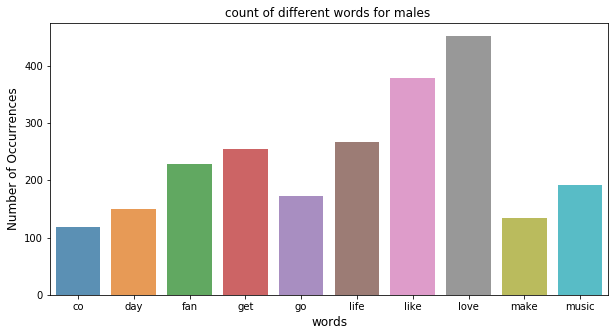

In [230]:
word_count  = mdf 
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('count of different words for males ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('words', fontsize=12)
plt.show()

In [231]:
df_female = df3[df3['gender'] == "female"]

In [232]:
# TOP 10 OCCURING WORDS IN FEMALES DESCRIPTION

In [233]:
df_female.clean_description.str.split(expand=True).stack().value_counts()[:10]

love      428
life      281
girl      183
like      177
lover     161
writer    132
time      130
ig        122
music     121
one       119
dtype: int64

In [234]:
df_female.correct_description.str.split(expand=True).stack().value_counts()[:10]

love     444
in       308
life     298
a        276
girl     228
like     181
lover    165
time     137
inst     134
one      133
dtype: int64

In [235]:
df_female.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10]

love      445
life      300
girl      236
like      183
lover     170
time      143
inst      134
one       133
music     132
writer    132
dtype: int64

In [236]:
# TOP 10 OCCURING WORDS IN FEMALE TWEET'S TEXT

In [237]:
df_female.clean_text.str.split(expand=True).stack().value_counts()[:10]

like      308
get       283
day       263
one       260
love      239
go        212
time      206
people    181
got       158
know      153
dtype: int64

In [238]:
df_female.correct_text.str.split(expand=True).stack().value_counts()[:10]

one       318
like      309
get       290
day       276
love      252
a         248
go        219
time      216
people    181
in        164
dtype: int64

In [239]:
df_female.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10]

one       319
like      309
get       290
day       279
love      252
time      225
go        219
people    181
got       159
know      156
dtype: int64

In [240]:
# FINDING THE TOP 10 OCCURING WORDS IN DESCRIPTION AND TWEET TEXT FOR MEN
fdf = df_female.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10].add(df_female.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10], fill_value=0)

fdf.sort_values(ascending = False)

love      697.0
like      492.0
one       452.0
time      368.0
life      300.0
get       290.0
day       279.0
girl      236.0
go        219.0
people    181.0
lover     170.0
got       159.0
know      156.0
inst      134.0
writer    132.0
music     132.0
dtype: float64

In [284]:
# FINDING THE TOP 10 OCCURING WORDS IN DESCRIPTION AND TWEET TEXT FOR MEN
fdf = df_female.clean_text.str.split(expand=True).stack().value_counts()[:10].add(df_female.clean_description.str.split(expand=True).stack().value_counts()[:10], fill_value=0)

fdf.sort_values(ascending = False)


    # love      600
    # life      482
# fan       432
    # music     344
# sport     334
    # writer    302
    # like      246
# tweet     240
# com       228
# man       222

love      667.0
like      485.0
one       379.0
time      336.0
get       283.0
life      281.0
day       263.0
go        212.0
girl      183.0
people    181.0
lover     161.0
got       158.0
know      153.0
writer    132.0
ig        122.0
music     121.0
dtype: float64

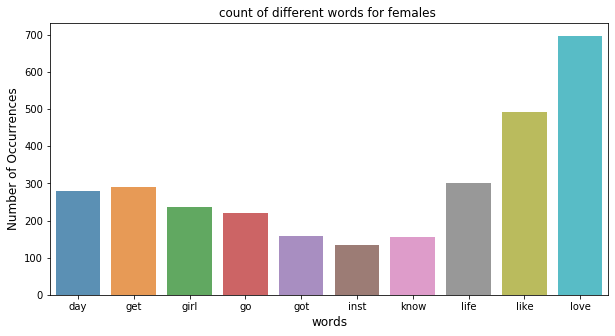

In [241]:
word_count  = fdf 
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('count of different words for females ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('words', fontsize=12)
plt.show()

In [242]:
# GETTING DATA FOR GENDER "BRAND"

In [243]:
# df_brand = df3[df3['gender'] == "brand"]

In [244]:
# TOP 10 OCCURING WORDS IN BRANDS DESCRIPTION

In [245]:
# df_brand.clean_description.str.split(expand=True).stack().value_counts()[:10]

In [246]:
# df_brand.correct_description.str.split(expand=True).stack().value_counts()[:10]

In [247]:
# df_brand.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10]

In [248]:
# TOP 10 OCCURING WORDS IN MENS BRANDS TWEET'S TEXT

In [249]:
# df_brand.clean_text.str.split(expand=True).stack().value_counts()[:10]

In [250]:
# df_brand.correct_text.str.split(expand=True).stack().value_counts()[:10]

In [251]:
# df_brand.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10]

In [252]:
# FINDING THE TOP 10 OCCURING WORDS IN DESCRIPTION AND TWEET TEXT FOR BRAND
# bdf = df_brand.clean_and_correct_text.str.split(expand=True).stack().value_counts()[:10].add(df_brand.clean_and_correct_description.str.split(expand=True).stack().value_counts()[:10], fill_value=0)

# bdf.sort_values(ascending = False)

In [253]:
# word_count  = bdf 
# word_count = word_count[:10,]
# plt.figure(figsize=(10,5))
# sns.barplot(word_count.index, word_count.values, alpha=0.8)
# plt.title('count of different words for brands')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('words', fontsize=12)
# plt.show()

In [254]:
# MOST OCCURING WORDS IN DESCRIPTION AMONG ALL 3 CLASSES 

In [255]:
freq_top_desc = pd.Series(' '.join(df3['clean_and_correct_description']).split()).value_counts()[:10]
freq_top_desc

love      751
life      566
fan       335
music     324
like      307
writer    283
girl      267
time      263
lover     258
inst      243
dtype: int64

In [256]:
# MOST OCCURING WORDS IN TWEET'S TEXT AMONG ALL 3 CLASSES

In [257]:
freq_top_text = pd.Series(' '.join(df3['clean_and_correct_text']).split()).value_counts()[:10]
freq_top_text

like      563
one       545
get       545
day       429
time      420
love      398
go        392
people    316
new       295
got       291
dtype: int64

In [258]:
# LEAST OCCURING WORDS IN DESCRIPTIONS AMONG ALL 3 CLASSES 
freq_bottom_desc = pd.Series(' '.join(df3['clean_and_correct_description']).split()).value_counts()[10:]
freq_bottom_desc

sport          239
one            235
world          220
god            217
live           211
              ... 
refusing         1
forthcoming      1
fanatically      1
gong             1
wherever         1
Length: 12200, dtype: int64

In [259]:
# LEAST OCCURING WORDS IN TWEET'S TEXT AMONG ALL 3 CLASSES
freq_bottom_text = pd.Series(' '.join(df3['clean_and_correct_text']).split()).value_counts()[10:]
freq_bottom_text

make        288
know        286
good        268
best        263
want        252
           ... 
harrier       1
instinct      1
pedal         1
cutback       1
inexpert      1
Length: 12483, dtype: int64

In [260]:
# LABEL ENCODING GENDER 

In [261]:
le = LabelEncoder()
df3['gender_label_encoded'] = le.fit_transform(df3['gender'])

In [262]:
df3.head()

,gender,gender:confidence,description,text,names,clean_names,context,clean_context,clean_description,clean_text,correct_description,correct_context,correct_text,clean_and_correct_description,clean_and_correct_context,clean_and_correct_text,gender_label_encoded
0,male,1.0,i sing my own rhythm,robbie e responds to critics after win against...,sheezy,sheezy,Robbie E Responds To Critics After Win Against...,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,robbie responds critic win eddie edward worldt...,sing rhythm,robbie responds critic win eddie edward worldt...,robbie responds critic win eddie edward worldt...,1
1,male,1.0,i m the author of novels filled with family dr...,it felt like they were my friends and i was li...,davd burnett,davd burnett,It felt like they were my friends and I was li...,felt like friend living story retired ian auth...,author novel filled family drama romance,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian auth...,felt like friend living story retired ian,author novel filled family drama romance,felt like friend living story retired ian auth...,felt like friend living story retired ian,1
3,male,1.0,mobile guy ers shazam google kleiner pe...,hi jordanspieth looking at the url do you...,douggarland,douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi jordanspieth looking url use ifttt typicall...,mobile guy er shazam google kleiner perkins ya...,hi jordanspieth looking url use ifttt typicall...,mobile guy or sham google cleaner perkins yaho...,i jordan piety looking urls use if tit typical...,i jordan piety looking urls use if tit typical...,mobile guy sham google cleaner perkins yahoo s...,jordan piety looking url use tit typically see...,jordan piety looking url use tit typically see...,1
4,female,1.0,ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with t...,wilford gemma,wilford gemma,Watching Neighbours on Sky+ catching up with t...,watching neighbour sky catching neighbs xxx xx...,ricky wilson best frontman kaiser chief best b...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching nights xxx xxx...,watching neighbour sky catching nights xxx xxx,ricky wilson best front man kaiser chief best ...,watching neighbour sky catching night xxx xxx ...,watching neighbour sky catching night xxx xxx,0
5,female,1.0,you don t know me,ive seen people on the train with lamps chair...,monroevicious,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamp chair tv etc know,know,ive seen people train lamp chair tv etc,know,live seen people train lamp chair to etc know,live seen people train lamp chair to etc,know,live seen people train lamp chair etc know,live seen people train lamp chair etc,0


In [263]:
# SINCE MODEL NEEDS NUMERICL DATA SO DOING VECTORIZATION OF WORDS TO FEED INTO MODEl IN THE FORM OF MATRIX

In [264]:
cv = CountVectorizer()
sparse_matrix_desc = cv.fit_transform(df3['clean_and_correct_description'])

In [265]:
sparse_matrix_context = cv.fit_transform(df3['clean_and_correct_context'])

In [266]:
sparse_matrix_desc.shape

(8766, 12208)

In [267]:

sparse_matrix_text = cv.fit_transform(df3['clean_and_correct_text'])

In [268]:
sparse_matrix_text.shape

(8766, 12491)

In [269]:

sparse_matrix_names = cv.fit_transform(df3['clean_names'])

In [270]:
sparse_matrix_names.shape

(8766, 10000)

In [285]:
df3['context_new'] =df3['clean_and_correct_description'] + " " + df3['clean_and_correct_text']

In [286]:
sparse_matrix_context_new = cv.fit_transform(df3['clean_names'])

In [271]:
# HORIZONTALLY STACKING THE MATRICES 

In [293]:
sparse_matrix = hstack((sparse_matrix_context,sparse_matrix_names))

In [294]:
#SPLITTING DATA INTO TRAIN AND TEST 

In [295]:
from sklearn.model_selection import train_test_split

max = 0
nv = MultinomialNB()
for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(sparse_matrix, df3['gender_label_encoded'],test_size = 0.1,random_state = i)#20
#     print(i)
    nv.fit(X_train, Y_train)
    y_pred = nv.predict(X_test)
    accuracy_score(Y_test, y_pred)
    if accuracy_score(Y_test, y_pred) > max:
        max = accuracy_score(Y_test, y_pred)
        index = i

print("max = ",max,"i= ",i)
# print('Accuracy of naive bayes classifier on test set is : {}'.format(accuracy_score(Y_test, y_pred)))
    
# X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 99

max =  0.7628278221208666 i=  999


In [290]:
# NAIVE BAYES

In [276]:
nv = MultinomialNB()
nv.fit(X_train, Y_train)
y_pred = nv.predict(X_test)
accuracy_score(Y_test, y_pred)
print('Accuracy of naive bayes classifier on test set is : {}'.format(accuracy_score(Y_test, y_pred)))

Accuracy of naive bayes classifier on test set is : 0.7274800456100342


In [277]:
# LOGISTIC REGRESSION

In [278]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(accuracy_score(Y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.7069555302166477


In [279]:
# SUPPORT VECTOR CLASSIFIER

In [280]:
svm = SVC()
svm.fit(X_train, Y_train)
y_pred = svm.predict(X_test)

print('Accuracy of support vector classifier on test set: {}'.format(accuracy_score(Y_test, y_pred)))

Accuracy of support vector classifier on test set: 0.7035347776510832


In [281]:
# EMSEMBLE MODELING

In [282]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('multinomial naive bayes', nv), ('logistic regression', logreg),('SVC',svm)], 
                            voting='hard', weights=[3,2,1]).fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)

print('The accuracy for Multinomial Naive Bayes and Logistic Regression and SVC is:',accuracy_score(Y_test,y_pred))

The accuracy for Multinomial Naive Bayes and Logistic Regression and SVC is: 0.7229190421892816
